In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import skew
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, classification_report


from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

### Uploading of data:

In [2]:
company_data = pd.read_csv('Data.csv')

### Showning the all columns and rows of the dataset:

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Top 5 and Last 5 rows of the dataset: 

In [4]:
company_data.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [5]:
company_data.tail()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
24995                  4             5390         Rented               19   
24996                  4             4490  Company Owned               57   
24997                  2             5403         Rented               31   
24998                  2            10562         Rented               25   
24999                  4             5664  Company Owned               21   

       flood_impacted  flood_proof  electric_supply  dist_from_hub  \
24995               0            0                1            142   
24996               0            0                1            130   
24997               1            0                1            147   
24998               0            0                1             60   
24999               0            1                1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
24995         34.0       2005.0                          22              1   
24996         28.0       2012.0                          10              0   
24997          NaN          NaN                          23              0   
24998         25.0          NaN                          18              0   
24999         39.0       2019.0                           4              0   

      approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
24995                            A                 2              30   
24996                            B                 4              18   
24997                           B+                 5              25   
24998                            A                 6              30   
24999                           B+                 2              11   

       product_wg_ton  
24995           32093  
24996           12114  
24997           27080  
24998           25093  
24999            5058

### checking of columns:

In [6]:
company_data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [7]:
company_data.shape

(25000, 24)

In [8]:
print('No of total Rows = ',company_data.shape[0],'\n\n''No of total Columns = ',company_data.shape[1])

No of total Rows =  25000 

No of total Columns =  24


### Information about data types: 

In [9]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### We can change the column names which have 'capital letter' to 'small letter' for our convenience.

In [10]:
company_data.columns = company_data.columns.str.replace('WH','wh').str.replace('Ware_house','wh').str.replace('ID','id').str.replace('L','l').str.replace('C','c')

* Renamed Columns:

In [11]:
company_data.columns

Index(['wh_id', 'wh_Manager_id', 'location_type', 'wh_capacity_size', 'zone',
       'wh_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [11]:
print('No of total Rows = ',company_data.shape[0],'\n\n''No of total Columns = ',company_data.shape[1])

No of total Rows =  25000 

No of total Columns =  24


### Information about the columns and data types:

In [12]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wh_id                         25000 non-null  object 
 1   wh_Manager_id                 25000 non-null  object 
 2   location_type                 25000 non-null  object 
 3   wh_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   wh_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Null Value Calculation: 

In [12]:
company_data.isnull().sum()

wh_id                               0
wh_Manager_id                       0
location_type                       0
wh_capacity_size                    0
zone                                0
wh_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [13]:
company_data.isnull().sum().sum()

13779

In [14]:
company_data.size

600000

In [15]:
print('Percentage of total missing data = ',round((company_data.isnull().sum().sum()/company_data.size)*100,2),'%')

Percentage of total missing data =  2.3 %


### Data Summary - With the Null Values: 

In [16]:
pd.options.display.float_format = '{:.3f}'.format
company_data.describe(percentiles=[.25,0.50,0.75,0.90])

num_refill_req_l3m  transport_issue_l1y  competitor_in_mkt  \
count           25000.000            25000.000          25000.000   
mean                4.089                0.774              3.104   
std                 2.607                1.199              1.142   
min                 0.000                0.000              0.000   
25%                 2.000                0.000              2.000   
50%                 4.000                0.000              3.000   
75%                 6.000                1.000              4.000   
90%                 8.000                3.000              4.000   
max                 8.000                5.000             12.000   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
count        25000.000        25000.000       25000.000    25000.000   
mean          4985.712           42.418           0.098        0.055   
std           1052.825           16.064           0.298        0.227   
min           1821.000           15.000           0.000        0.000   
25%           4313.000           29.000           0.000        0.000   
50%           4859.000           42.000           0.000        0.000   
75%           5500.000           56.000           0.000        0.000   
90%           6300.100           65.000           0.000        0.000   
max          11008.000           70.000           1.000        1.000   

       electric_supply  dist_from_hub  workers_num  wh_est_year  \
count        25000.000      25000.000    24010.000    13119.000   
mean             0.657        163.537       28.944     2009.383   
std              0.475         62.719        7.873        7.528   
min              0.000         55.000       10.000     1996.000   
25%              0.000        109.000       24.000     2003.000   
50%              1.000        164.000       28.000     2009.000   
75%              1.000        218.000       33.000     2016.000   
90%              1.000        250.000       39.000     2020.000   
max              1.000        271.000       98.000     2023.000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                   25000.000      25000.000         25000.000   
mean                       17.130          0.303             3.482   
std                         9.161          0.460             1.690   
min                         0.000          0.000             0.000   
25%                        10.000          0.000             2.000   
50%                        18.000          0.000             3.000   
75%                        24.000          1.000             5.000   
90%                        29.000          1.000             6.000   
max                        39.000          1.000             6.000   

       govt_check_l3m  product_wg_ton  
count       25000.000       25000.000  
mean           18.812       22102.633  
std             8.632       11607.755  
min             1.000        2065.000  
25%            11.000       13059.000  
50%            21.000       22101.000  
75%            26.000       30103.000  
90%            29.000       37147.000  
max            32.000       55151.000

### For few categorical and Numerical columns we need to know the data counts to understand whether the dataset is balanced or not and for further analysis too.

In [17]:
company_data['zone'].value_counts(ascending=True)

East       429
South     6362
West      7931
North    10278
Name: zone, dtype: int64

In [18]:
company_data['location_type'].value_counts()

Rural    22957
Urban     2043
Name: location_type, dtype: int64

In [19]:
company_data['wh_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: wh_capacity_size, dtype: int64

In [20]:
company_data['wh_regional_zone'].value_counts(ascending=True)

Zone 1    2054
Zone 3    2881
Zone 2    2963
Zone 4    4176
Zone 5    4587
Zone 6    8339
Name: wh_regional_zone, dtype: int64

In [21]:
company_data['num_refill_req_l3m'].value_counts(ascending=True)

2    1808
6    2804
4    2846
1    2856
7    2873
0    2912
5    2941
8    2970
3    2990
Name: num_refill_req_l3m, dtype: int64

In [22]:
company_data['transport_issue_l1y'].value_counts(ascending=True)

5      348
4      777
3     1818
2     2198
1     4644
0    15215
Name: transport_issue_l1y, dtype: int64

In [23]:
company_data['wh_owner_type'].value_counts(ascending=True)

Rented           11422
Company Owned    13578
Name: wh_owner_type, dtype: int64

In [24]:
company_data['flood_impacted'].value_counts()

0    22546
1     2454
Name: flood_impacted, dtype: int64

In [25]:
company_data['flood_proof'].value_counts()

0    23634
1     1366
Name: flood_proof, dtype: int64

In [26]:
company_data['electric_supply'].value_counts(ascending=True)

0     8578
1    16422
Name: electric_supply, dtype: int64

In [27]:
company_data['temp_reg_mach'].value_counts()

0    17418
1     7582
Name: temp_reg_mach, dtype: int64

In [28]:
company_data['approved_wh_govt_certificate'].value_counts(ascending=True)

A+    4191
A     4671
B     4812
B+    4917
C     5501
Name: approved_wh_govt_certificate, dtype: int64

In [29]:
company_data['wh_breakdown_l3m'].value_counts(ascending=True)

0     908
1    2036
5    3925
6    4012
4    4037
3    5006
2    5076
Name: wh_breakdown_l3m, dtype: int64

In [30]:
company_data['wh_est_year'].value_counts()

2000.000    551
2006.000    541
2002.000    533
2014.000    531
2007.000    528
2001.000    518
2004.000    515
2008.000    509
1998.000    507
2016.000    507
2019.000    507
2013.000    502
2015.000    502
2010.000    499
2018.000    498
2012.000    497
2020.000    496
2005.000    489
2017.000    488
2011.000    486
2021.000    485
2009.000    485
1999.000    482
2003.000    469
2022.000    332
1997.000    329
1996.000    191
2023.000    142
Name: wh_est_year, dtype: int64

### Dropping of Unnecessary columns:

* We can drop the "Ware House Id" and "Warehouse Manager Id" as this one will not help for our analysis of Optimum product weight and Demand-Supply analysis. 
* Also these two are unique values

In [31]:
company_data.drop(['wh_Manager_id','wh_id'],axis=1,inplace=True)

In [32]:
company_data.columns

Index(['location_type', 'wh_capacity_size', 'zone', 'wh_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [33]:
company_data.shape

(25000, 22)

#### Checking of Skewness: 

In [34]:
company_data.skew().sort_values(ascending=False)

flood_proof                   3.919
flood_impacted                2.701
transport_issue_l1y           1.611
workers_num                   1.060
competitor_in_mkt             0.978
retail_shop_num               0.908
temp_reg_mach                 0.856
product_wg_ton                0.332
storage_issue_reported_l3m    0.113
distributor_num               0.015
wh_est_year                   0.012
dist_from_hub                -0.006
wh_breakdown_l3m             -0.068
num_refill_req_l3m           -0.075
govt_check_l3m               -0.363
electric_supply              -0.661
dtype: float64

# Univariate Analysis:

In [35]:
def univariateAnalysis_numeric(column,nbins):
    
    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5))
    plt.grid(True)
    print("Distribution of - " + column)
    print("----------------------------------")
    
    sns.distplot(company_data[column], kde=True, color = 'b', ax=ax1);
    sns.boxplot(x = company_data[column], data = company_data, orient = 'v', ax = ax2)
    ax3.hist(company_data[column])
    
    
    ax1.tick_params(labelsize = 15)
    ax1.set_title('Distplot - of - '+ column, fontsize = 15)
    
    ax2.set_title('Boxplot - of - '+ column, fontsize = 15)
    ax2.tick_params(labelsize=15)
    
    ax3.set_title('Histogram - of - '+ column, fontsize = 15)
    ax3.tick_params(labelsize = 15)
    
    
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show();

Distribution of - num_refill_req_l3m
----------------------------------


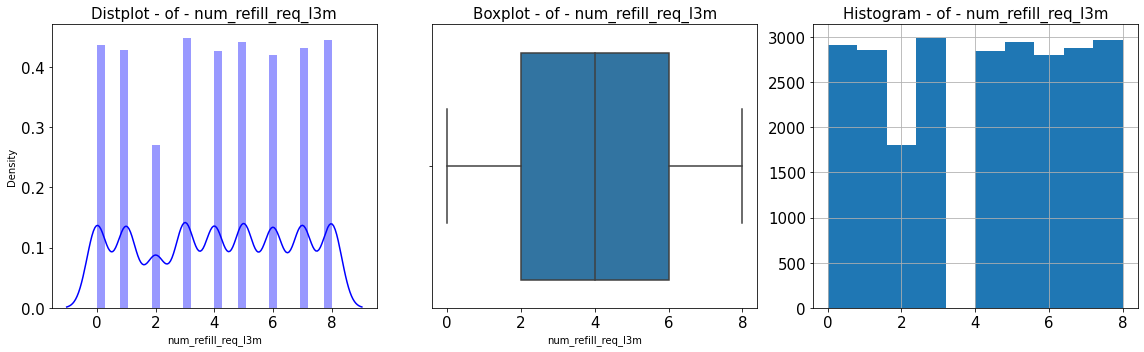

Distribution of - transport_issue_l1y
----------------------------------


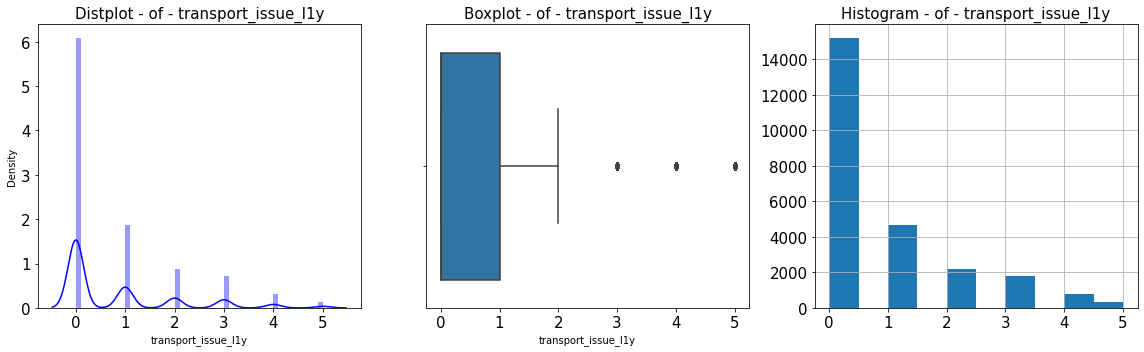

Distribution of - competitor_in_mkt
----------------------------------


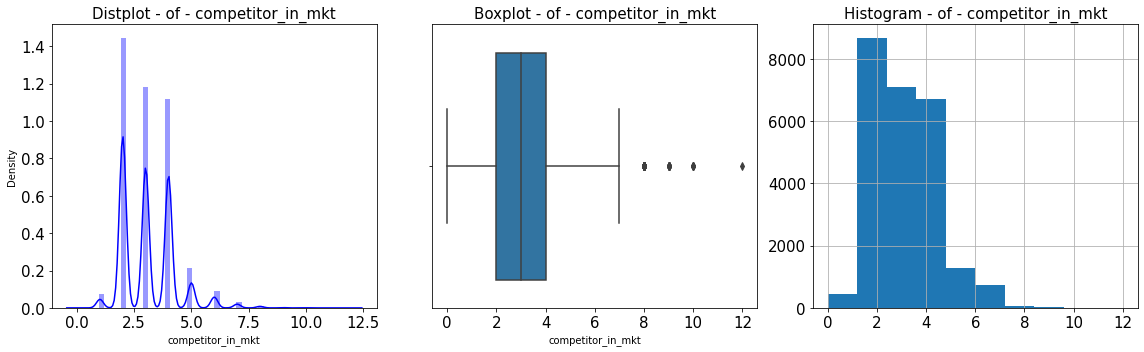

Distribution of - retail_shop_num
----------------------------------


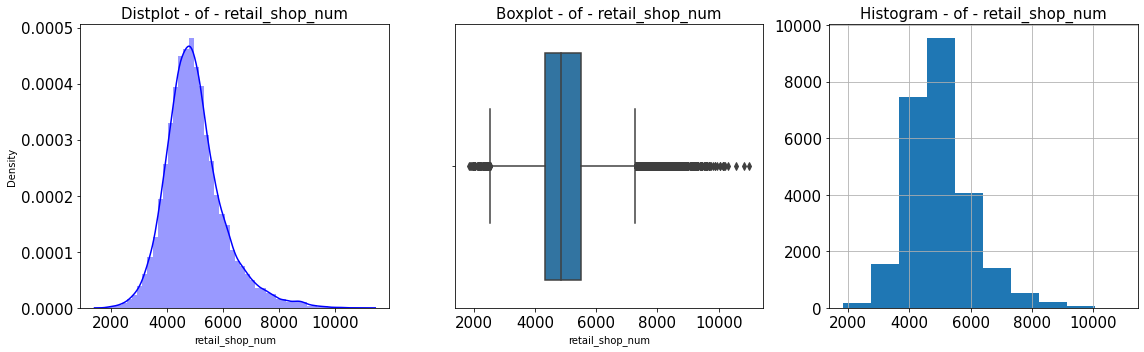

Distribution of - distributor_num
----------------------------------


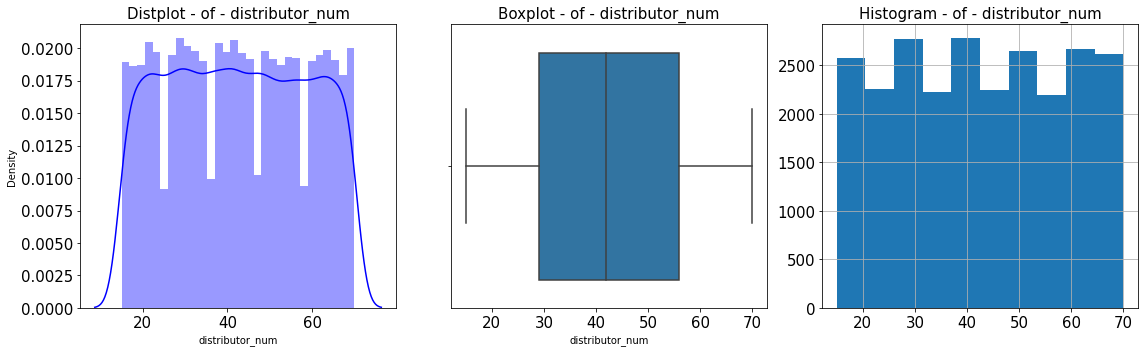

Distribution of - flood_impacted
----------------------------------


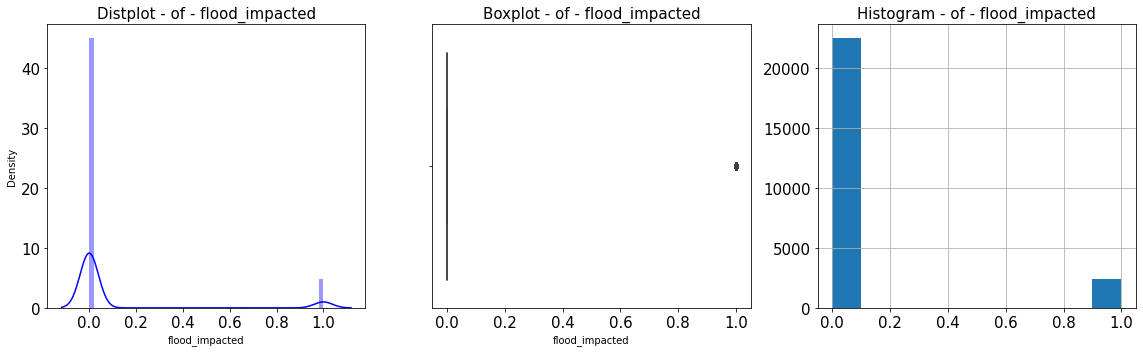

Distribution of - flood_proof
----------------------------------


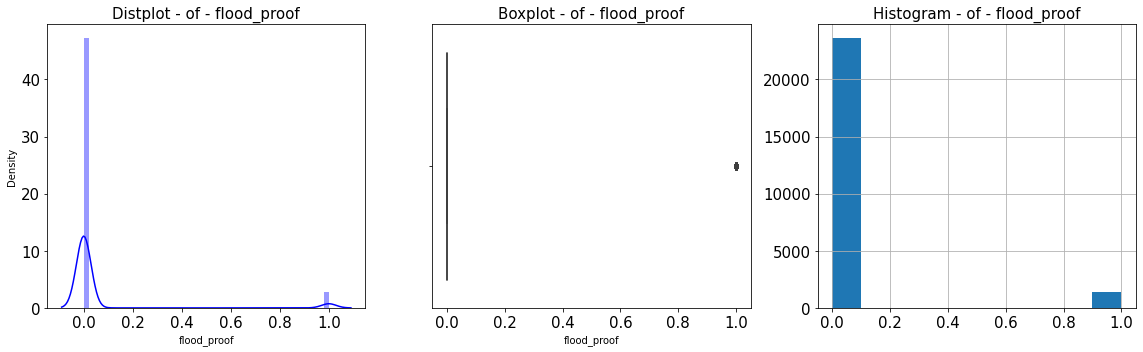

Distribution of - electric_supply
----------------------------------


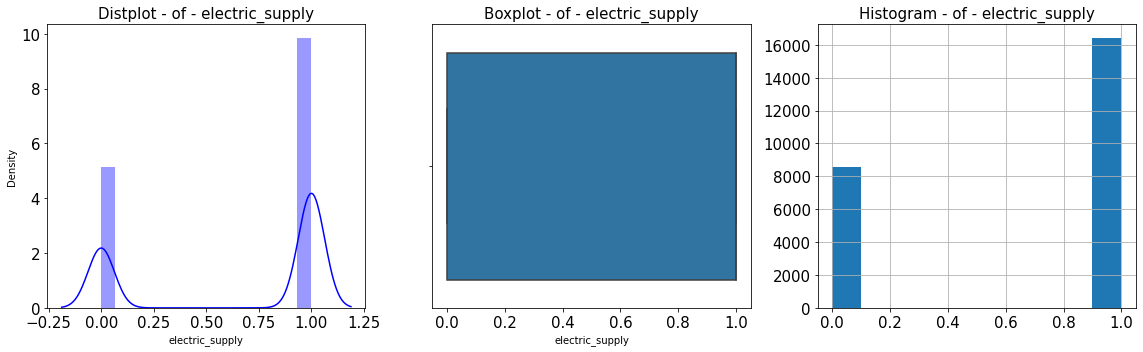

Distribution of - dist_from_hub
----------------------------------


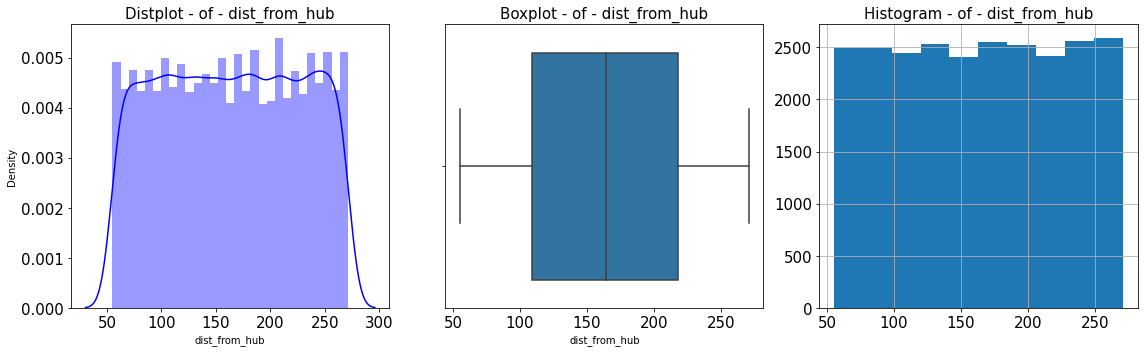

Distribution of - workers_num
----------------------------------


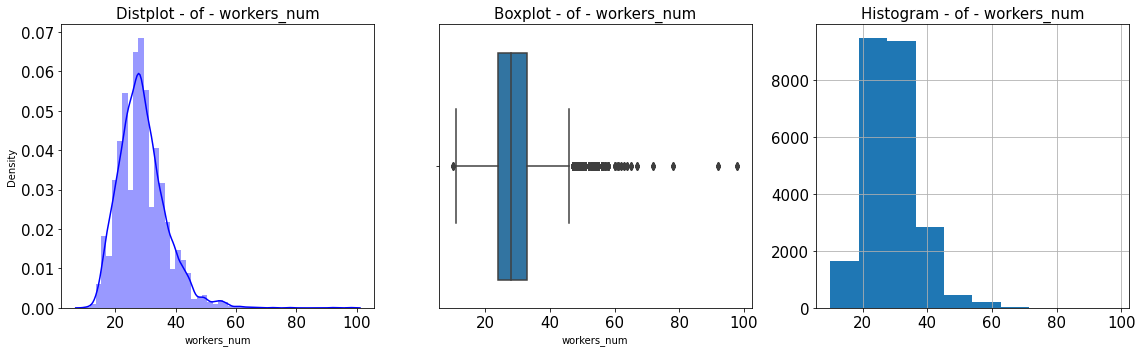

Distribution of - wh_est_year
----------------------------------


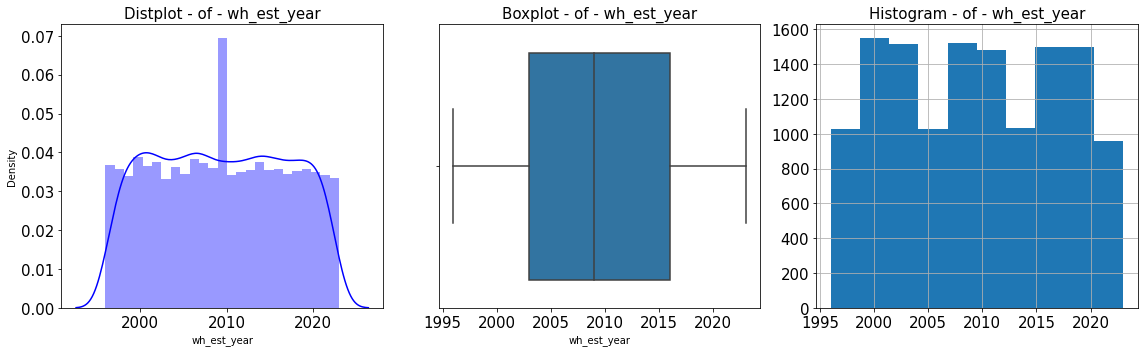

Distribution of - storage_issue_reported_l3m
----------------------------------


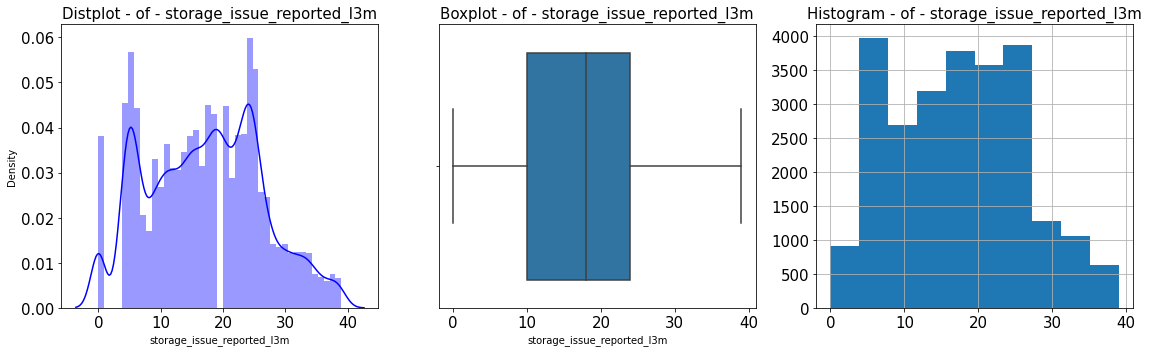

Distribution of - temp_reg_mach
----------------------------------


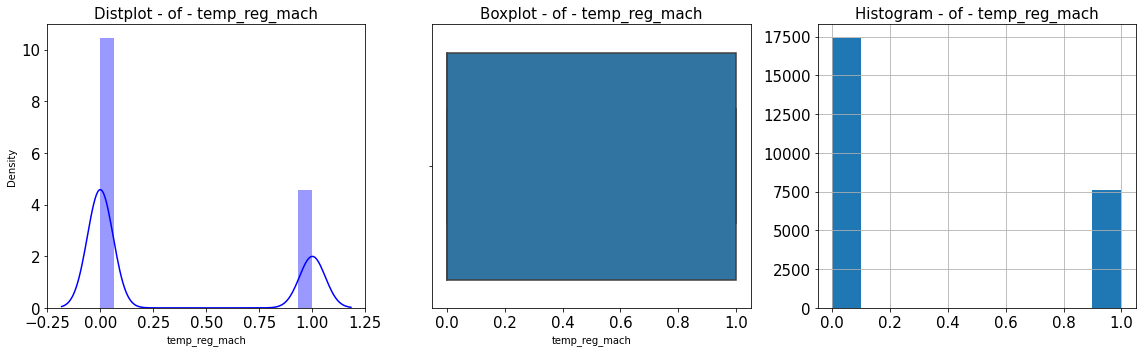

Distribution of - wh_breakdown_l3m
----------------------------------


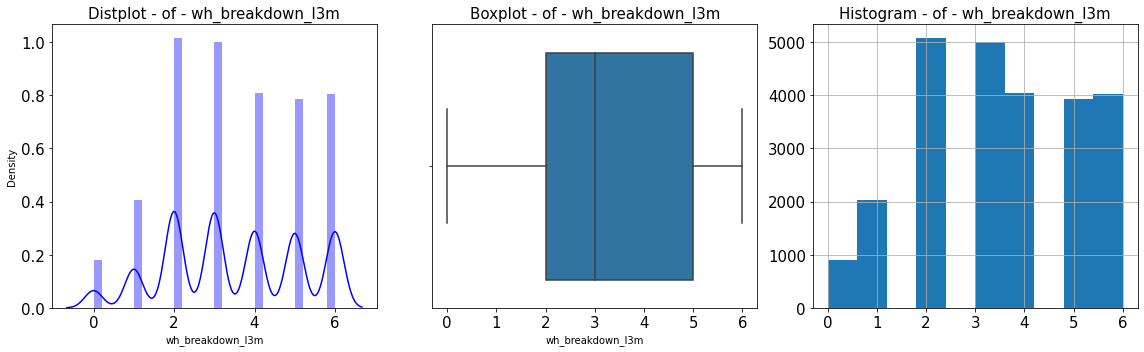

Distribution of - govt_check_l3m
----------------------------------


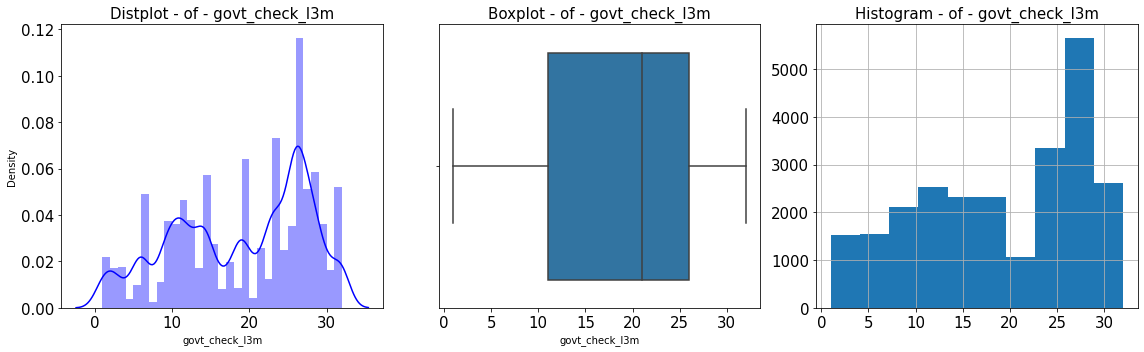

Distribution of - product_wg_ton
----------------------------------


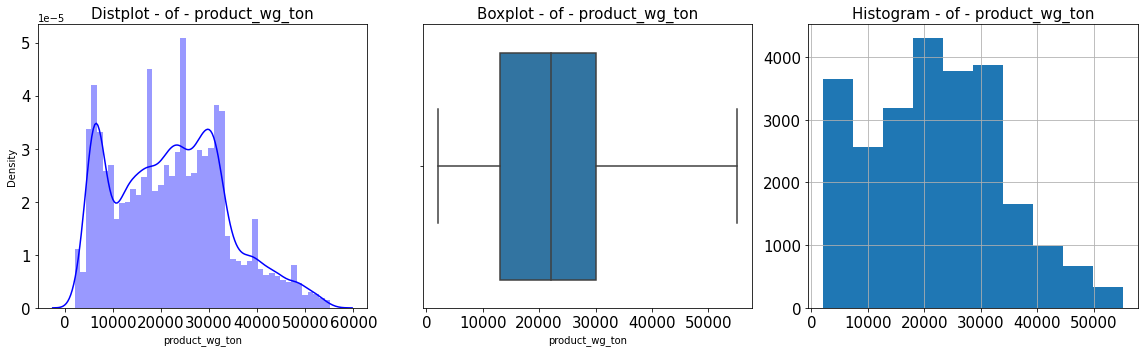

In [36]:
company_data_numeric = company_data.select_dtypes(include = ['float64', 'int64'])
df_numeric_cols = list(company_data_numeric.columns.values)
len(df_numeric_cols)
for x in df_numeric_cols:
    univariateAnalysis_numeric(x,30);

# Bi-Variate Analysis:

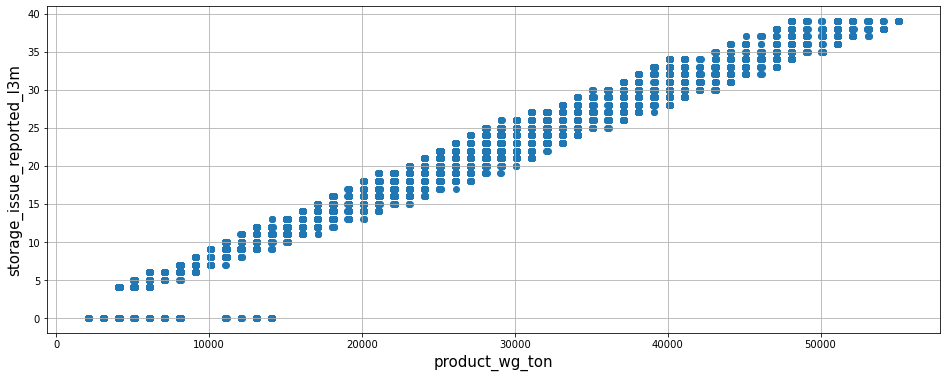

In [37]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='product_wg_ton',y ='storage_issue_reported_l3m', data = company_data);
plt.xlabel("product_wg_ton", fontsize=15)
plt.ylabel("storage_issue_reported_l3m", fontsize=15)
plt.show()

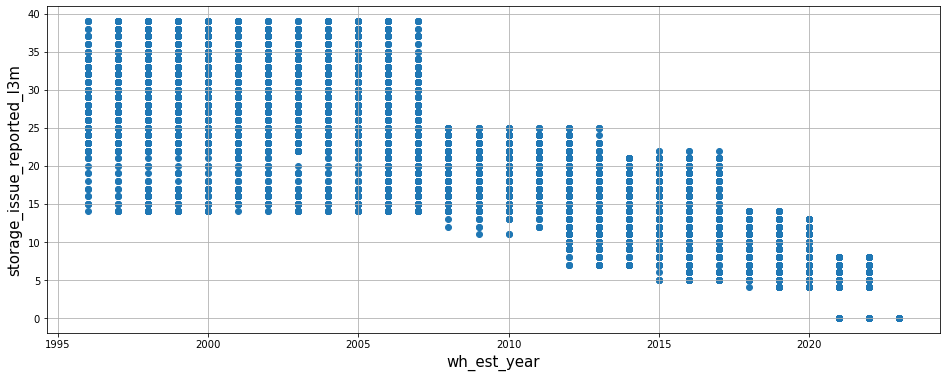

In [38]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='wh_est_year',y ='storage_issue_reported_l3m', data = company_data);
plt.xlabel("wh_est_year", fontsize=15)
plt.ylabel("storage_issue_reported_l3m", fontsize=15)
plt.show()

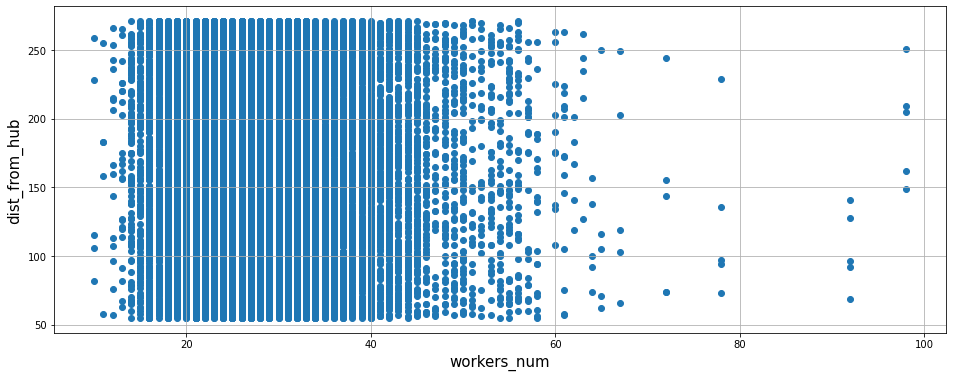

In [39]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='workers_num',y ='dist_from_hub', data = company_data);
plt.xlabel("workers_num", fontsize=15)
plt.ylabel("dist_from_hub", fontsize=15)
plt.show()

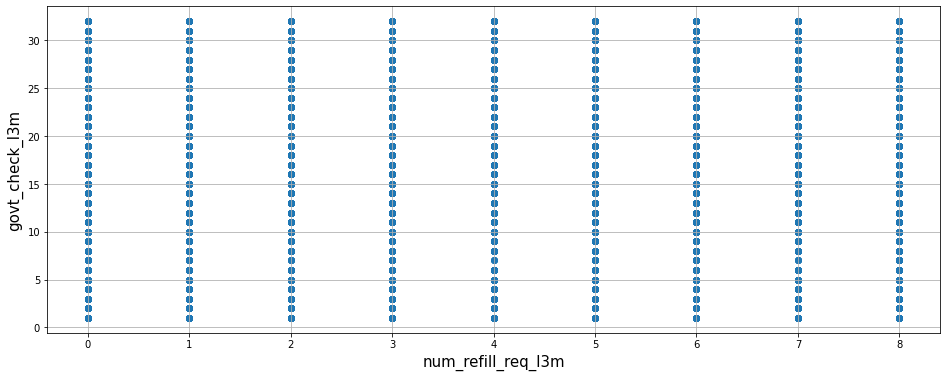

In [40]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='num_refill_req_l3m',y ='govt_check_l3m', data = company_data);
plt.xlabel("num_refill_req_l3m", fontsize=15)
plt.ylabel("govt_check_l3m", fontsize=15)
plt.show()

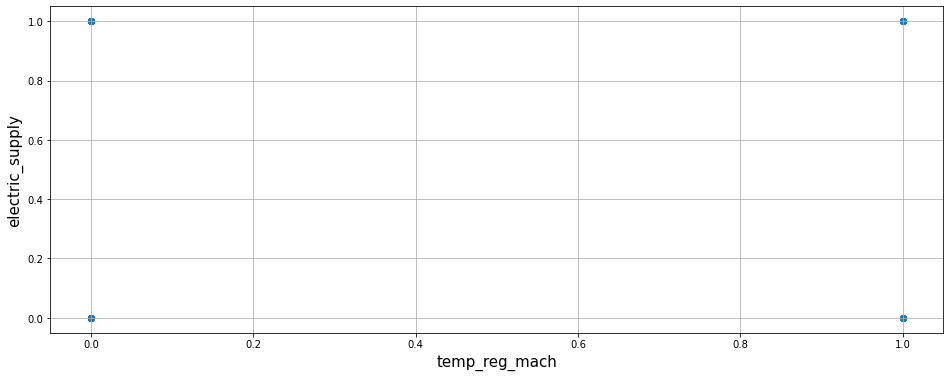

In [41]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='temp_reg_mach',y ='electric_supply', data = company_data);
plt.xlabel("temp_reg_mach", fontsize=15)
plt.ylabel("electric_supply", fontsize=15)
plt.show()

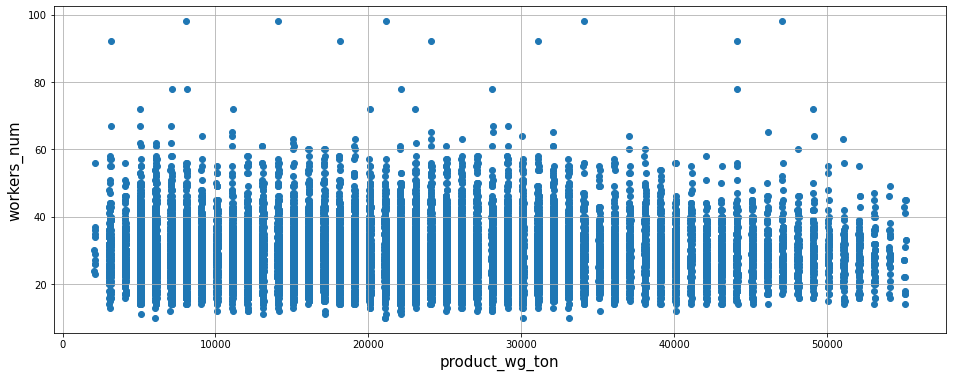

In [42]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='product_wg_ton',y ='workers_num', data = company_data);
plt.xlabel("product_wg_ton", fontsize=15)
plt.ylabel("workers_num", fontsize=15)
plt.show()

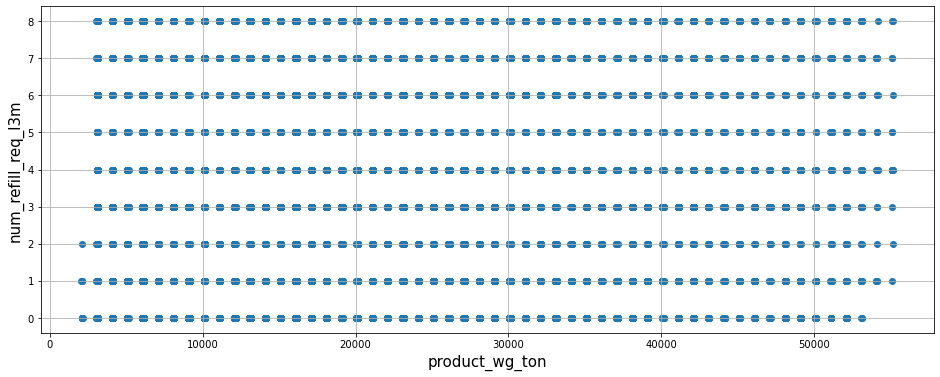

In [43]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(x ='product_wg_ton',y ='num_refill_req_l3m', data = company_data);
plt.xlabel("product_wg_ton", fontsize=15)
plt.ylabel("num_refill_req_l3m", fontsize=15)
plt.show()

## Analysis On Target variable

In [50]:
company_data['product_wg_ton'].describe()

count   25000.000
mean    22102.633
std     11607.755
min      2065.000
25%     13059.000
50%     22101.000
75%     30103.000
max     55151.000
Name: product_wg_ton, dtype: float64

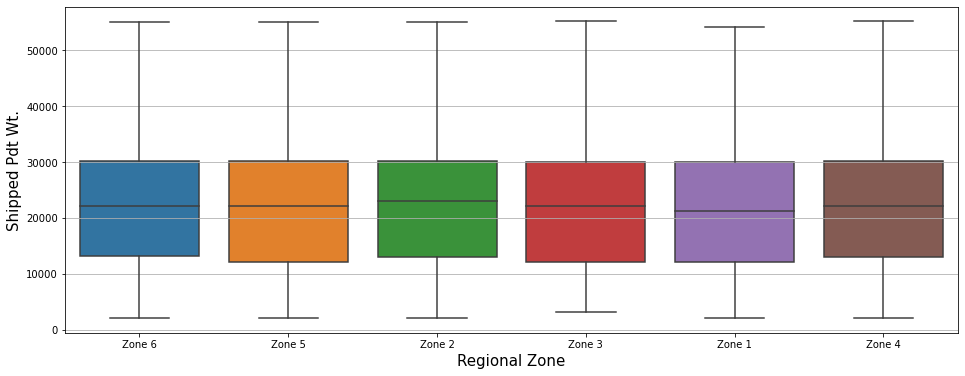

In [44]:
plt.figure(figsize=(16,6))
plt.grid(True)
sns.boxplot(y = company_data['product_wg_ton'], x= company_data['wh_regional_zone'], data = company_data, orient ='v')
plt.xlabel("Regional Zone", fontsize=15)
plt.ylabel("Shipped Pdt Wt.", fontsize=15)
plt.show()

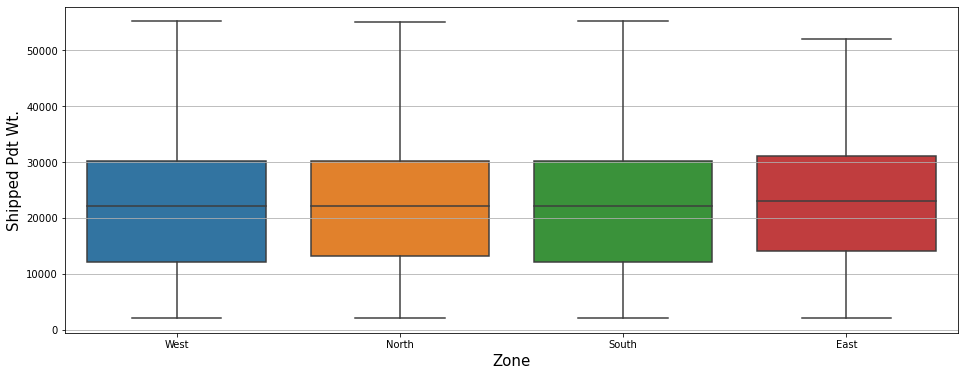

In [45]:
plt.figure(figsize=(16,6))
plt.grid(True)
sns.boxplot(y = company_data['product_wg_ton'], x= company_data['zone'], data = company_data, orient ='v')
plt.xlabel("Zone", fontsize=15)
plt.ylabel("Shipped Pdt Wt.", fontsize=15)
plt.show()

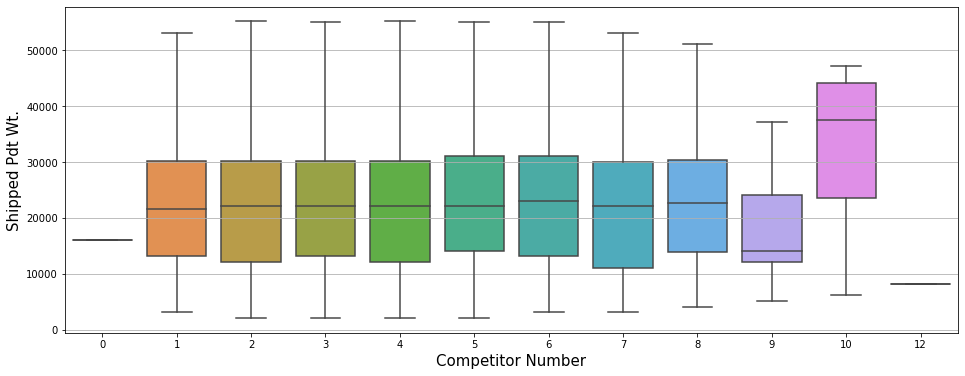

In [46]:
plt.figure(figsize=(16,6))
plt.grid(True)
sns.boxplot(y = company_data['product_wg_ton'], x= company_data['competitor_in_mkt'], data = company_data, orient ='v')
plt.xlabel("Competitor Number", fontsize=15)
plt.ylabel("Shipped Pdt Wt.", fontsize=15)
plt.show()

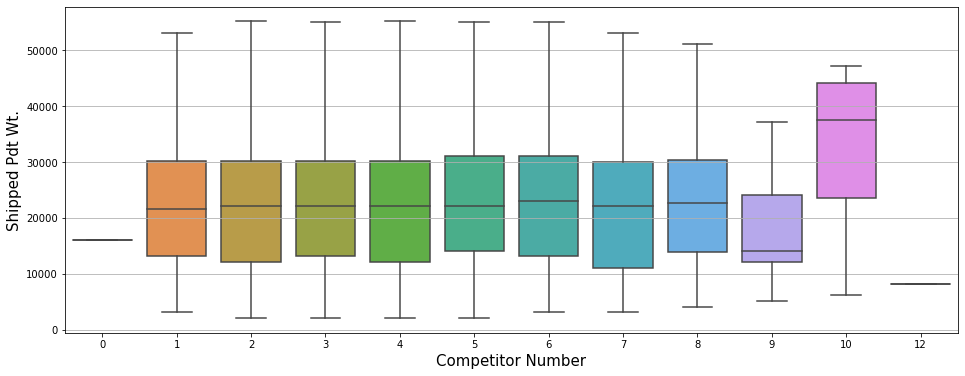

In [47]:
plt.figure(figsize=(16,6))
plt.grid(True)
sns.boxplot(y = company_data['product_wg_ton'], x= company_data['competitor_in_mkt'], data = company_data, orient ='v')
plt.xlabel("Competitor Number", fontsize=15)
plt.ylabel("Shipped Pdt Wt.", fontsize=15)
plt.show()

### Checking of Skewness

In [48]:
company_data.skew().sort_values(ascending=False)

flood_proof                   3.919
flood_impacted                2.701
transport_issue_l1y           1.611
workers_num                   1.060
competitor_in_mkt             0.978
retail_shop_num               0.908
temp_reg_mach                 0.856
product_wg_ton                0.332
storage_issue_reported_l3m    0.113
distributor_num               0.015
wh_est_year                   0.012
dist_from_hub                -0.006
wh_breakdown_l3m             -0.068
num_refill_req_l3m           -0.075
govt_check_l3m               -0.363
electric_supply              -0.661
dtype: float64

# Multivariate Analysis:

### Pairplot: 

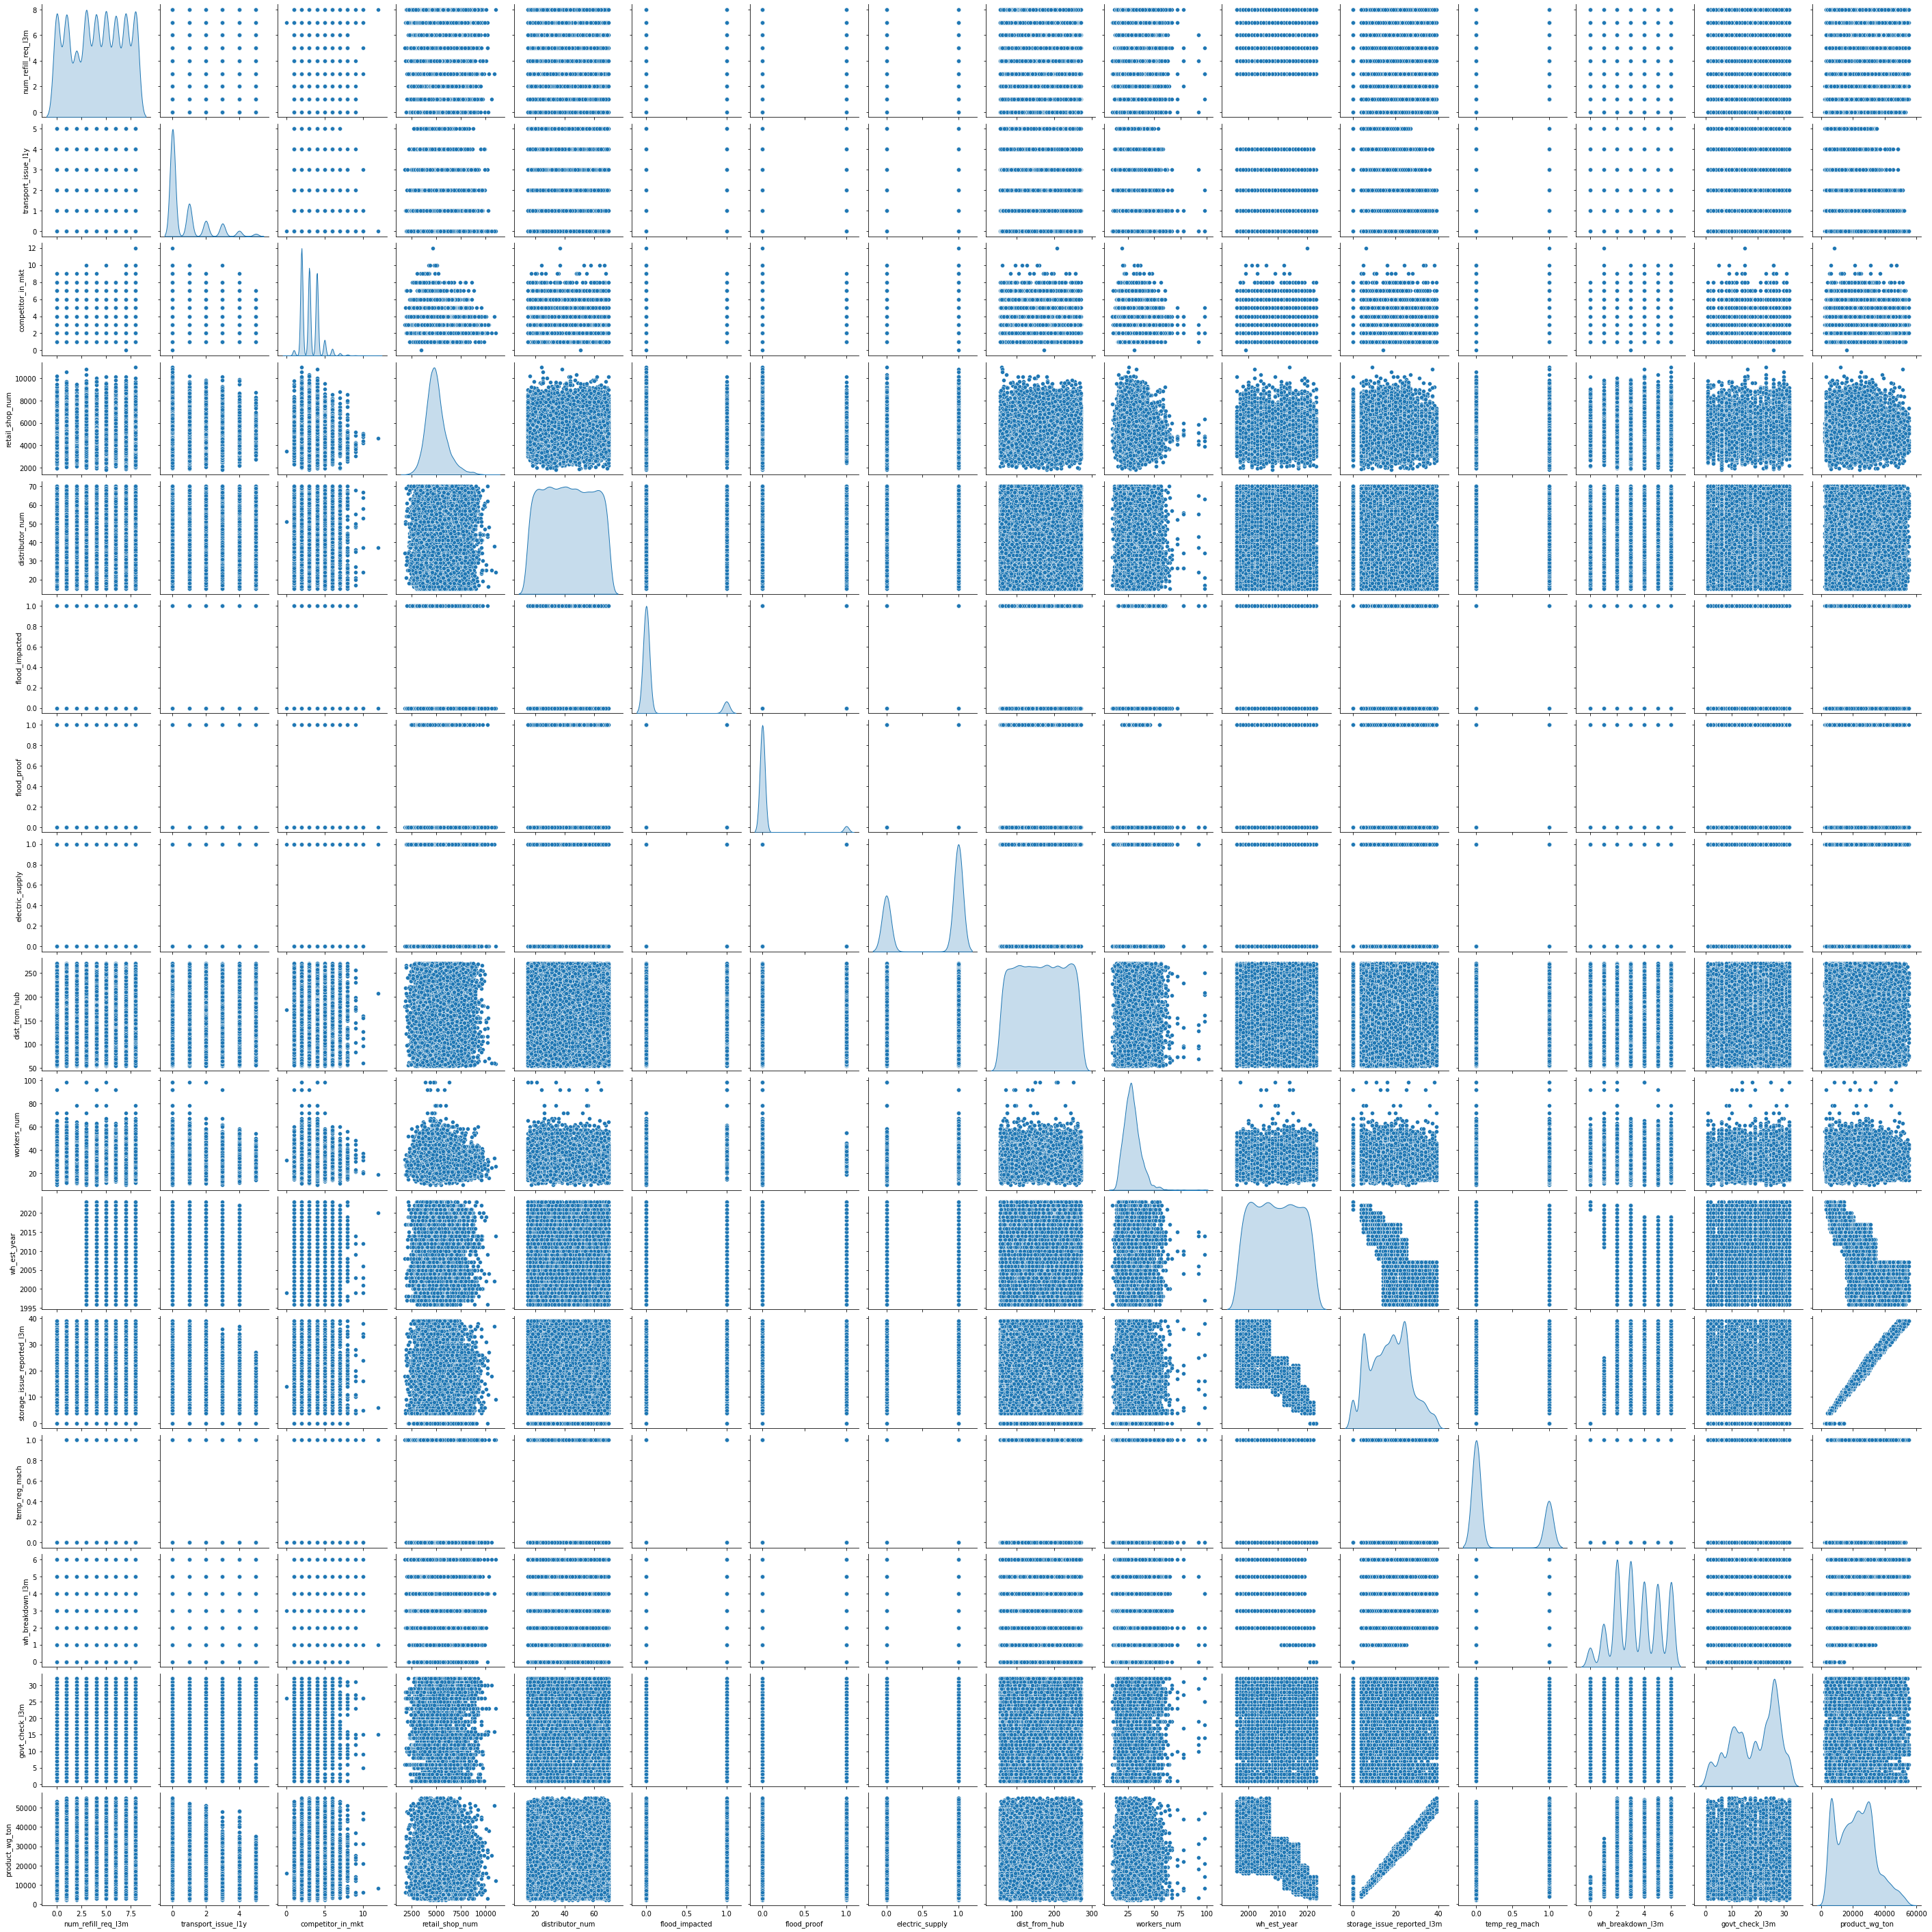

In [49]:
sns.pairplot(company_data,diag_kind='kde')

### Correlation of columns:

In [51]:
company_data.corr().T

num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                       1.000                0.019   
transport_issue_l1y                      0.019                1.000   
competitor_in_mkt                        0.003               -0.006   
retail_shop_num                         -0.001               -0.002   
distributor_num                          0.004                0.009   
flood_impacted                          -0.011               -0.010   
flood_proof                             -0.001                0.000   
electric_supply                         -0.008               -0.009   
dist_from_hub                            0.000                0.014   
workers_num                             -0.014               -0.009   
wh_est_year                              0.015               -0.013   
storage_issue_reported_l3m              -0.007               -0.144   
temp_reg_mach                            0.261                0.018   
wh_breakdown_l3m                         0.001                0.013   
govt_check_l3m                          -0.003                0.002   
product_wg_ton                           0.001               -0.174   

                            competitor_in_mkt  retail_shop_num  \
num_refill_req_l3m                      0.003           -0.001   
transport_issue_l1y                    -0.006           -0.002   
competitor_in_mkt                       1.000           -0.157   
retail_shop_num                        -0.157            1.000   
distributor_num                        -0.001           -0.000   
flood_impacted                          0.009           -0.004   
flood_proof                            -0.003            0.007   
electric_supply                         0.002           -0.009   
dist_from_hub                           0.008            0.000   
workers_num                             0.000           -0.005   
wh_est_year                            -0.011            0.006   
storage_issue_reported_l3m              0.010           -0.007   
temp_reg_mach                           0.010           -0.001   
wh_breakdown_l3m                        0.013           -0.008   
govt_check_l3m                         -0.043            0.046   
product_wg_ton                          0.009           -0.007   

                            distributor_num  flood_impacted  flood_proof  \
num_refill_req_l3m                    0.004          -0.011       -0.001   
transport_issue_l1y                   0.009          -0.010        0.000   
competitor_in_mkt                    -0.001           0.009       -0.003   
retail_shop_num                      -0.000          -0.004        0.007   
distributor_num                       1.000           0.005       -0.003   
flood_impacted                        0.005           1.000        0.107   
flood_proof                          -0.003           0.107        1.000   
electric_supply                       0.000           0.165        0.115   
dist_from_hub                        -0.012           0.001       -0.005   
workers_num                          -0.015           0.168        0.041   
wh_est_year                          -0.012          -0.001       -0.003   
storage_issue_reported_l3m            0.003          -0.003       -0.003   
temp_reg_mach                         0.003          -0.009        0.006   
wh_breakdown_l3m                      0.004          -0.002       -0.005   
govt_check_l3m                       -0.008           0.001       -0.004   
product_wg_ton                        0.005          -0.002       -0.000   

                            electric_supply  dist_from_hub  workers_num  \
num_refill_req_l3m                   -0.008          0.000       -0.014   
transport_issue_l1y                  -0.009          0.014       -0.009   
competitor_in_mkt                     0.002          0.008        0.000   
retail_shop_num                      -0.009          0.000       -0.005   
distributor_num              

In [52]:
c = company_data.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.003)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
product_wg_ton             storage_issue_reported_l3m        0.987
wh_est_year                storage_issue_reported_l3m        0.859
                           product_wg_ton                    0.829
wh_breakdown_l3m           wh_est_year                       0.399
                           storage_issue_reported_l3m        0.377
product_wg_ton             wh_breakdown_l3m                  0.343
electric_supply            workers_num                       0.340
temp_reg_mach              num_refill_req_l3m                0.261
product_wg_ton             transport_issue_l1y               0.174
workers_num                flood_impacted                    0.168
flood_impacted             electric_supply                   0.165
competitor_in_mkt          retail_shop_num                   0.157
storage_issue_reported_l3m transport_issue_l1y               0.144
flood_proof                electric_supply                   0.115
                           flood_impacted                    0.107
temp_reg_mach              product_wg_ton                    0.102
                           storage_issue_reported_l3m        0.067
                           wh_breakdown_l3m                  0.059
wh_est_year                temp_reg_mach                     0.048
retail_shop_num            govt_check_l3m                    0.046
competitor_in_mkt          govt_check_l3m                    0.043
flood_proof                workers_num                       0.041
dist_from_hub              workers_num                       0.019
num_refill_req_l3m         transport_issue_l1y               0.019
temp_reg_mach              transport_issue_l1y               0.018
workers_num                wh_breakdown_l3m                  0.018
num_refill_req_l3m         wh_est_year                       0.015
distributor_num            workers_num                       0.015
dist_from_hub              transport_issue_l1y               0.014
num_refill_req_l3m         workers_num                       0.014
wh_breakdown_l3m           govt_check_l3m                    0.013
                           transport_issue_l1y               0.013
transport_issue_l1y        wh_est_year                       0.013
competitor_in_mkt          wh_breakdown_l3m                  0.013
wh_est_year                distributor_num                   0.012
dist_from_hub              distributor_num                   0.012
competitor_in_mkt          wh_est_year                       0.011
num_refill_req_l3m         flood_impacted                    0.011
wh_breakdown_l3m           electric_supply                   0.010
flood_impacted             transport_issue_l1y               0.010
competitor_in_mkt          storage_issue_reported_l3m        0.010
temp_reg_mach              competitor_in_mkt                 0.010
competitor_in_mkt          flood_impacted                    0.009
transport_issue_l1y        electric_supply                   0.009
dist_from_hub              wh_est_year                       0.009
retail_shop_num            electric_supply                   0.009
transport_issue_l1y        workers_num                       0.009
                           distributor_num                   0.009
competitor_in_mkt          product_wg_ton                    0.009
storage_issue_reported_l3m workers_num                       0.009
temp_reg_mach              flood_impacted                    0.009
govt_check_l3m             product_wg_ton                    0.008
retail_shop_num            wh_breakdown_l3m                  0.008
competitor_in_mkt          dist_from_hub                     0.008
workers_num                product_wg_ton                    0.008
electric_supply            num_refill_req_l3m                0.008
distributor_num            govt_check_l3m                    0.008
govt_check_l3m             storage_issue_reported_l3m        0.008
electric_supply            temp_reg_mach                     0.008
flood_proof                retail_s

##  Anova Test: 

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
* F Score test
* p value

#### We can see that there are two factors due to whcih the Product weight has been affected - 
* A.Location Type
* B.Ware House Capacity Size

#### Now we will check whether there is any Location Type dependancy or not with the Shipped Product weight


### Normality test: Shapiro Wilk test
* There will be two hypothesis for check the Normality of the same. The hypothesis are as below - 

* 𝐻0: Product Weight follows a normal distribution
* 𝐻1: Product weight does notfollow a normal distribution

In [53]:
from scipy import stats
w, p_value = stats.shapiro(company_data['product_wg_ton'])
print("W = {}".format(w), "p_value = {}".format(p_value))

W = 0.9705008864402771 p_value = 0.0


* As test result we can see that the p value=0 which is smaller than 0.05, we can acccept the Null Hypothesis.
#### Shipped Product Weight follows a normal distribution

### Homogenity test: Levene test

* The two hypothesis are as below- 
* 𝐻0:𝜎1=𝜎2...𝜎11=𝜎12 against

* 𝐻𝑎: At least one variance is different from the rest.

In [54]:
statistic, p_value = stats.levene(
    company_data['product_wg_ton'][company_data['location_type']=="Rural"],
    company_data['product_wg_ton'][company_data['location_type']=="Urban"])

print("statistic = {}".format(statistic), "p_value = {}".format(p_value))

statistic = 53.05378639603106 p_value = 3.341419630253986e-13


* From test result we cans ee that the p value is less than 0.05 we do not reject the null hypothesis of homogenity

#### Both not full fill for test ANOVA.

## Imputing missing values:

In [55]:
company_data.isnull().sum()

location_type                       0
wh_capacity_size                    0
zone                                0
wh_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

* Here we will use KNN Imputer for Imputing the missing values

### Replacing the NaN values in the column 'workers_num' with the front value of a particular position :                  

In [57]:
company_data_copied = company_data.copy()

In [58]:
company_data_copied['workers_num'].fillna(method='ffill')

0       29.000
1       31.000
2       37.000
3       21.000
4       25.000
5       35.000
6       27.000
7       23.000
8       22.000
9       43.000
10      37.000
11      16.000
12      28.000
13      36.000
14      37.000
15      19.000
16      28.000
17      22.000
18      22.000
19      24.000
20      41.000
21      31.000
22      24.000
23      37.000
24      31.000
25      31.000
26      21.000
27      36.000
28      20.000
29      24.000
30      17.000
31      19.000
32      29.000
33      24.000
34      46.000
35      30.000
36      24.000
37      29.000
38      33.000
39      43.000
40      32.000
41      32.000
42      26.000
43      28.000
44      20.000
45      38.000
46      30.000
47      39.000
48      40.000
49      26.000
50      23.000
51      23.000
52      31.000
53      19.000
54      27.000
55      24.000
56      20.000
57      39.000
58      27.000
59      34.000
60      17.000
61      30.000
62      29.000
63      26.000
64      16.000
65      32.000
66      22

In [59]:
company_data_copied['workers_num'].describe()

count   24010.000
mean       28.944
std         7.873
min        10.000
25%        24.000
50%        28.000
75%        33.000
max        98.000
Name: workers_num, dtype: float64

### Replacing the NaN values in the column 'wh_est_year'  :                                

#### For this column if we would like to impute and we need to scale the data. So after scaling the data we will impute this attribute.

### Replacing the NaN values in the column 'approved_wh_govt_certificate' with the 'NA' value :

* As there are few NaN values that means the certificates are not available for those Ware Hosues. We are going to fill it with the vale 'NA' for further investigation.

In [61]:
company_data_copied['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [62]:
company_data_copied['approved_wh_govt_certificate'].fillna(value = 'NA',inplace = True)

In [63]:
company_data_copied['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
NA     908
Name: approved_wh_govt_certificate, dtype: int64

### There are two more categorical column which have 'categorical' values, so before imputing the same we need to encode the data. After Encoding the same we will scale the data.
### The two categorical columns are -
* 'workers_num'
* 'wh_est_year'

## Encoding of Categorical Columns: 

In [65]:
company_data_encoded = company_data_copied.copy()

In [66]:
from sklearn import preprocessing

In [67]:
label_encoder = preprocessing.LabelEncoder()

### Encoding for - 'location_type' column

In [68]:
company_data_encoded['location_type'].value_counts()

Rural    22957
Urban     2043
Name: location_type, dtype: int64

In [69]:
# Unique Value Before Encoding
company_data_encoded['location_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [70]:
company_data_encoded['location_type']= label_encoder.fit_transform(company_data_encoded['location_type'])

In [71]:
company_data_encoded['location_type'].unique()

array([1, 0])

In [72]:
company_data_encoded['location_type'].value_counts()

0    22957
1     2043
Name: location_type, dtype: int64

### Label Encoding for - WH Capacity Size

In [73]:
company_data_encoded['wh_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: wh_capacity_size, dtype: int64

In [74]:
company_data_encoded['wh_capacity_size'].unique()

array(['Small', 'Large', 'Mid'], dtype=object)

In [75]:
company_data_encoded.wh_capacity_size.replace(to_replace='Small', value=1, inplace=True)
company_data_encoded.wh_capacity_size.replace(to_replace='Mid', value=2, inplace=True)
company_data_encoded.wh_capacity_size.replace(to_replace='Large', value=3, inplace=True)

In [76]:
company_data_encoded['wh_capacity_size'].unique()

array([1, 3, 2], dtype=int64)

In [77]:
company_data_encoded['wh_capacity_size'].value_counts()

3    10169
2    10020
1     4811
Name: wh_capacity_size, dtype: int64

### Label Encoding for - 'Approved WH Govt. Certificates'

In [78]:
company_data_encoded['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
NA     908
Name: approved_wh_govt_certificate, dtype: int64

In [79]:
company_data_encoded['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+', 'NA'], dtype=object)

In [80]:
company_data_encoded.approved_wh_govt_certificate.replace(to_replace='NA', value=0, inplace=True)
company_data_encoded.approved_wh_govt_certificate.replace(to_replace='C', value=1, inplace=True)
company_data_encoded.approved_wh_govt_certificate.replace(to_replace='B', value=2, inplace=True)
company_data_encoded.approved_wh_govt_certificate.replace(to_replace='B+', value=3, inplace=True)
company_data_encoded.approved_wh_govt_certificate.replace(to_replace='A', value=4, inplace=True)
company_data_encoded.approved_wh_govt_certificate.replace(to_replace ='A+', value=5, inplace=True)

In [81]:
company_data_encoded['approved_wh_govt_certificate'].unique()

array([4, 5, 1, 2, 3, 0], dtype=int64)

In [82]:
company_data_encoded['approved_wh_govt_certificate'].value_counts()

1    5501
3    4917
2    4812
4    4671
5    4191
0     908
Name: approved_wh_govt_certificate, dtype: int64

### Label Encoding for Regional Zone

In [83]:
company_data_encoded['wh_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: wh_regional_zone, dtype: int64

In [84]:
company_data_encoded['wh_regional_zone'].unique()

array(['Zone 6', 'Zone 5', 'Zone 2', 'Zone 3', 'Zone 1', 'Zone 4'],
      dtype=object)

In [85]:
company_data_encoded.wh_regional_zone.replace(to_replace='Zone 1', value=1, inplace=True)
company_data_encoded.wh_regional_zone.replace(to_replace='Zone 2', value=2, inplace=True)
company_data_encoded.wh_regional_zone.replace(to_replace='Zone 3', value=3, inplace=True)
company_data_encoded.wh_regional_zone.replace(to_replace='Zone 4', value=4, inplace=True)
company_data_encoded.wh_regional_zone.replace(to_replace='Zone 5', value=5, inplace=True)
company_data_encoded.wh_regional_zone.replace(to_replace ='Zone 6', value=6, inplace=True)

In [86]:
company_data_encoded['wh_regional_zone'].unique()

array([6, 5, 2, 3, 1, 4], dtype=int64)

In [87]:
company_data_encoded['wh_regional_zone'].value_counts()

6    8339
5    4587
4    4176
2    2963
3    2881
1    2054
Name: wh_regional_zone, dtype: int64

### Encoding for - 'Zone'

In [88]:
company_data_encoded['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [89]:
company_data_encoded['zone'].unique()

array(['West', 'North', 'South', 'East'], dtype=object)

In [90]:
company_data_encoded['zone']= label_encoder.fit_transform(company_data_encoded['zone'])

In [91]:
company_data_encoded['zone'].unique()

array([3, 1, 2, 0])

In [92]:
company_data_encoded['zone'].value_counts()

1    10278
3     7931
2     6362
0      429
Name: zone, dtype: int64

### Label Encoding for - 'WH Owner Type'

In [93]:
company_data_encoded['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [94]:
company_data_encoded['wh_owner_type'].unique()

array(['Rented', 'Company Owned'], dtype=object)

In [95]:
company_data_encoded['wh_owner_type']= label_encoder.fit_transform(company_data_encoded['wh_owner_type'])

In [96]:
company_data_encoded['wh_owner_type'].unique()

array([1, 0])

In [97]:
company_data_encoded['wh_owner_type'].value_counts()

0    13578
1    11422
Name: wh_owner_type, dtype: int64

## Now we can separate and scale the Discrete and Continuous type data for modelling

In [98]:
company_data_standard = company_data_encoded.copy()

In [99]:
company_data_continuous = company_data_standard['product_wg_ton']
company_data_discrete = company_data_standard[['location_type','wh_capacity_size','zone','wh_regional_zone',
                   'num_refill_req_l3m','transport_issue_l1y','competitor_in_mkt',
                   'wh_owner_type','distributor_num','flood_impacted','flood_proof'
                   ,'electric_supply','wh_est_year','storage_issue_reported_l3m',
                   'temp_reg_mach','approved_wh_govt_certificate','wh_breakdown_l3m',
                   'govt_check_l3m','workers_num']]

### Now we will scale the continuous data

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
company_data_continuous2 = company_data_standard[['dist_from_hub','retail_shop_num']]

In [102]:
scaler = StandardScaler()
scaled_continuous =  pd.DataFrame(scaler.fit_transform(company_data_continuous2),columns=company_data_continuous2.columns)

In [103]:
company_data_scaled = pd.concat([scaled_continuous,company_data_discrete,company_data_continuous],axis = 1)

In [104]:
company_data_scaled.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
0         -1.157           -0.318              1                 1     3   
1          0.741            1.170              0                 3     1   
2         -0.040           -0.646              0                 2     2   
3         -0.965            0.963              0                 2     1   
4         -0.822           -0.233              0                 3     1   

   wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                 6                   3                    1   
1                 5                   0                    0   
2                 2                   1                    0   
3                 3                   7                    4   
4                 5                   3                    1   

   competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
0                  2              1               24               0   
1                  4              0               47               0   
2                  4              0               64               0   
3                  2              1               50               0   
4                  2              0               42               1   

   flood_proof  electric_supply  wh_est_year  storage_issue_reported_l3m  \
0            1                1          NaN                          13   
1            0                1          NaN                           4   
2            0                0          NaN                          17   
3            0                0          NaN                          17   
4            0                1     2009.000                          18   

   temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0              0                             4                 5   
1              0                             4                 3   
2              0                             4                 6   
3              1                             5                 3   
4              0                             1                 6   

   govt_check_l3m  workers_num  product_wg_ton  
0              15       29.000           17115  
1              17       31.000            5074  
2              22       37.000           23137  
3              27       21.000           22115  
4              24       25.000           24071

### Now all the data has been scaled, 
## Imputing the value for : 'Ware House Estd Year'

In [105]:
# Before Imputed
company_data_copied['wh_est_year'].mode()

0   2000.000
dtype: float64

In [106]:
from sklearn.impute import KNNImputer

In [107]:
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')

In [108]:
company_data_imputed = pd.DataFrame(imputer.fit_transform(company_data_scaled), columns = company_data_scaled.columns)

In [109]:
# After Imputed
company_data_imputed['wh_est_year'].mode()

0   2002.000
dtype: float64

In [110]:
company_data_imputed['wh_est_year'].unique()

array([2010.6, 2020.4, 2009.8, 2010.8, 2009. , 2010. , 2009.4, 2013. ,
       2020.2, 1999. , 2017. , 2022. , 2008. , 2018.4, 2020.6, 2014.8,
       2013.8, 2001. , 2005. , 2016. , 1997. , 2003. , 2015.4, 2006. ,
       2016.2, 2021.6, 2019. , 2015. , 2012. , 2021.2, 1998. , 2021. ,
       2004. , 2002.8, 2000. , 2007. , 2018.2, 2011. , 2014. , 2003.8,
       1999.6, 2010.4, 2017.2, 2006.6, 2000.2, 2012.6, 2005.4, 2019.4,
       2012.2, 1996. , 2012.4, 2001.6, 2012.8, 2013.4, 2005.2, 2006.2,
       2001.4, 2020. , 2016.6, 2018.8, 2014.6, 2023. , 2002. , 2007.2,
       2003.4, 2011.2, 2008.2, 2019.8, 2006.8, 2016.4, 1998.8, 2001.2,
       2018. , 2011.8, 2000.8, 2001.8, 2021.8, 2011.6, 2014.4, 2008.8,
       2009.6, 2020.8, 2005.6, 2002.4, 2009.2, 2007.8, 2008.6, 2004.2,
       2017.8, 2002.6, 2008.4, 2011.4, 2007.6, 2007.4, 2004.6, 2019.6,
       2013.6, 2015.6, 2016.8, 2017.6, 2003.2, 2015.8, 2015.2, 2017.4,
       2018.6, 2019.2, 2005.8, 2021.4, 2010.2, 2002.2, 2014.2, 2006.4,
      

### Checking of Null value - after imputation

In [85]:
company_data_imputed.isnull().sum()

dist_from_hub                   0
retail_shop_num                 0
location_type                   0
wh_capacity_size                0
zone                            0
wh_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
competitor_in_mkt               0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
workers_num                     0
product_wg_ton                  0
dtype: int64

* We can see that there is no Null value.

# Checking of outliers at a go into the dataset

In [111]:
def check_outliers(data):
    outranged_data = data.loc[:,data.columns != 'class']
    Q1 = outranged_data.quantile(0.25)
    Q3 = outranged_data.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    
    # checking for outliers, True represents outlier
    outranged_data_counts = ((outranged_data < (Q1 - 1.5 * IQR)) |(outranged_data > (Q3 + 1.5 * IQR)))
    
    
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in outranged_data_counts:
        if(1 in outranged_data_counts[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, outranged_data_counts[col].value_counts().iloc[1]))
            count += 1
    print("\nNo of attributes with outliers are :", count)
    
check_outliers(company_data)

No. of outliers in competitor_in_mkt: 96
No. of outliers in flood_impacted: 2454
No. of outliers in flood_proof: 1366
No. of outliers in retail_shop_num: 948
No. of outliers in transport_issue_l1y: 2943
No. of outliers in workers_num: 607

No of attributes with outliers are : 6


### We can see that there are 6 columns are here where the Outliers represent. The same can be verified from the Univariate Analysis - Boxplot. 
### We will tratment these outliers rather dropping the same for better modelling

## Treatment of Outliers:

In [112]:
cols = ['competitor_in_mkt','flood_impacted', 'flood_proof', 'retail_shop_num', 'transport_issue_l1y', 'workers_num']

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in company_data[cols].columns:
    lr,ur=remove_outlier(company_data[column])
    company_data[column]=np.where(company_data[column]>ur,ur,company_data[column])
    company_data[column]=np.where(company_data[column]<lr,lr,company_data[column])

### Verifying The presence of Outliers: 

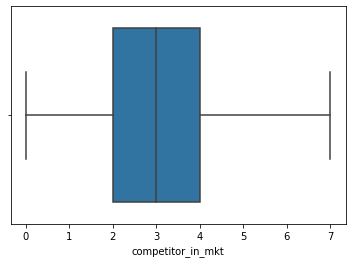

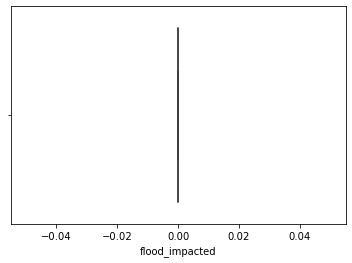

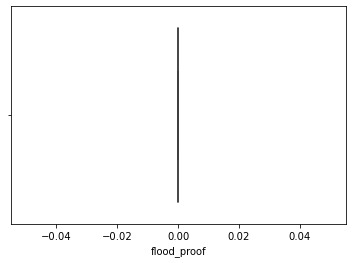

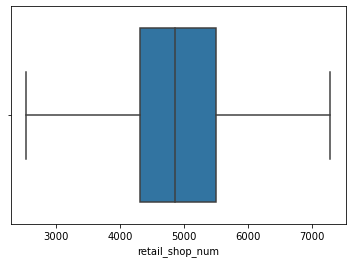

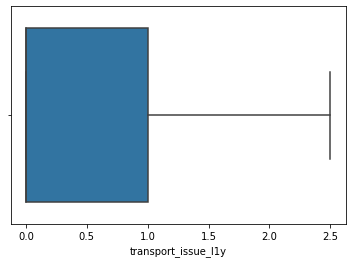

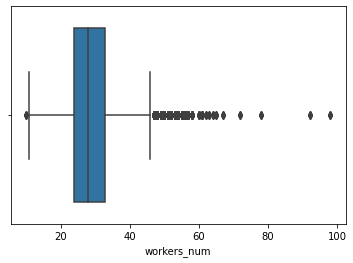

In [113]:
#cols = company_data_numeric

for i in cols:
    sns.boxplot(company_data[i], whis=1.5)
    plt.show()

### Now Further, we will check the correlation as the corr() fn here does not show the actual correlation between all the attributes. We will check the  Feature Engineering purpose - PCA.
* If the correlation is high that can impact the feature engineering later. Hence we need to check this test and it's value

# PCA - Feature Engineering

PCA is a process of independent variables. It's a unsupervised learning techniuqe where dependent variable is not required.

In [114]:
company_data_pca = company_data_imputed.copy()

In [123]:
company_data_pca.drop('product_wg_ton',axis = 1,inplace = True)

In [124]:
from scipy.stats import zscore
company_data_scaled=company_data_pca.apply(zscore)
company_data_scaled.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size   zone  \
0         -1.157           -0.318          3.352            -1.633  1.277   
1          0.741            1.170         -0.298             1.056 -0.987   
2         -0.040           -0.646         -0.298            -0.288  0.145   
3         -0.965            0.963         -0.298            -0.288 -0.987   
4         -0.822           -0.233         -0.298             1.056 -0.987   

   wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0             1.048              -0.418                0.189   
1             0.448              -1.569               -0.645   
2            -1.350              -1.185               -0.645   
3            -0.750               1.117                2.690   
4             0.448              -0.418                0.189   

   competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
0             -0.967          1.090           -1.147          -0.330   
1              0.785         -0.917            0.285          -0.330   
2              0.785         -0.917            1.343          -0.330   
3             -0.967          1.090            0.472          -0.330   
4             -0.967         -0.917           -0.026           3.031   

   flood_proof  electric_supply  wh_est_year  storage_issue_reported_l3m  \
0        4.160            0.723        0.043                      -0.451   
1       -0.240            0.723        1.404                      -1.433   
2       -0.240           -1.384       -0.068                      -0.014   
3       -0.240           -1.384        0.071                      -0.014   
4       -0.240            0.723       -0.179                       0.095   

   temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0         -0.660                         0.820             0.898   
1         -0.660                         0.820            -0.285   
2         -0.660                         0.820             1.490   
3          1.516                         1.493            -0.285   
4         -0.660                        -1.198             1.490   

   govt_check_l3m  workers_num  
0          -0.442        0.009  
1          -0.210        0.267  
2           0.369        1.042  
3           0.949       -1.024  
4           0.601       -0.508

#### Checking of scaled data - Heatmap

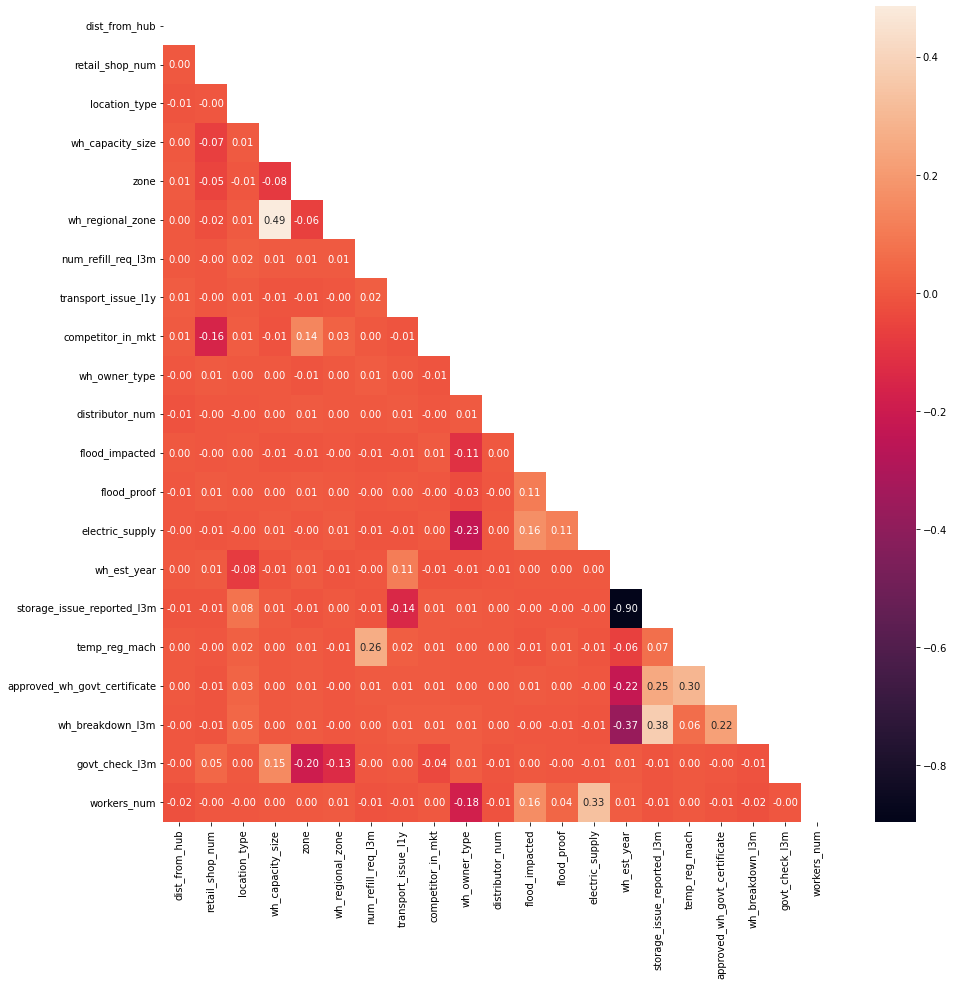

In [125]:
plt.figure(figsize = (15,15))
sns.heatmap(company_data_scaled.corr(), annot=True,fmt='.2f', mask=np.triu(company_data_scaled.corr()+1));

In [122]:
!pip install factor_analyzer

### Bartletts Test of Sphericity

* H0: Correlations are not significant
* H1: There are significant correlations
    
* If the p value < 0.05 then we will reject the H0 or the Null Hypothesis

In [126]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(company_data_scaled)
p_value

0.0

* Here as we have received p value as 0 < 0.05, so we are rejecting the Null Hypothesis. 
#### We can conclude that - There are significant correlations between the attributes

#### Checking of adquacy of sample size: 

* PCA need lot of data for that we test sample adeuacy. We will check the KMO value here for this adequecy.
* If the kmo value ranges above 0.7 then the adequacy will be treated as good.
* Else if the kmo value ranges below 0.5 then its not acceptable.

In [127]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [128]:
kmo_all,kmo_model=calculate_kmo(company_data_scaled)
kmo_model

0.5651998781107

* As the value does not go below than 0.5 we can proceed with the same.

### Applying PCA - all features included

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(n_components=21, random_state=123)
pca_transformed = pca.fit_transform(company_data_scaled)

### Eigen Vectors: 

In [131]:
pca.components_

array([[-4.28598428e-03, -1.39038629e-02,  9.50745550e-02,
         1.02912856e-02,  3.64566572e-03,  7.33063185e-03,
         2.97948186e-02, -1.05059535e-01,  1.93527744e-02,
         1.83431967e-02,  6.07438952e-03, -8.13920606e-03,
        -6.51712785e-03, -1.63938998e-02, -5.88030594e-01,
         5.94598014e-01,  1.51646909e-01,  3.13623043e-01,
         3.95171811e-01, -1.19245415e-02, -2.32304435e-02],
       [-1.75735157e-02, -3.17298543e-02,  2.05488905e-04,
         2.60336647e-02,  1.15392857e-02,  3.43837791e-02,
        -4.09571790e-02, -3.83376392e-02,  2.44625083e-02,
        -4.32064768e-01, -1.36170379e-02,  3.87596501e-01,
         2.18362139e-01,  5.70509648e-01, -2.62598555e-02,
         2.89598742e-02, -2.03223173e-02,  3.97930250e-03,
        -3.28158578e-03, -2.69748439e-02,  5.29141098e-01],
       [-4.36078427e-03,  7.65016692e-02, -1.86268355e-02,
        -6.99184995e-01,  2.36760480e-01, -6.56815429e-01,
        -7.93267279e-03,  1.17435314e-02,  3.22408580e

### Checking Eigen values :

In [132]:
pca.explained_variance_

array([2.32599759, 1.6413134 , 1.51704363, 1.34605695, 1.32394158,
       1.06089248, 1.02715838, 1.01360805, 1.00609064, 0.99586514,
       0.9786929 , 0.90821218, 0.87029313, 0.86127714, 0.82897622,
       0.79483923, 0.72147108, 0.65233617, 0.59116092, 0.43255912,
       0.10305409])

* Here 21 eigen values have been returned for 21 features.

In [133]:
pca.explained_variance_ratio_

array([0.11075736, 0.07815465, 0.07223728, 0.06409539, 0.06304232,
       0.05051667, 0.04891035, 0.04826512, 0.04790716, 0.04742025,
       0.04660256, 0.04324647, 0.04144087, 0.04101156, 0.03947348,
       0.03784797, 0.03435439, 0.03106238, 0.02814939, 0.02059723,
       0.00490714])

1st PC covers 11.08%, 2nd PC covers 7.82%, 3rd PC covers 7.22% and so on.

### Creating a dataframe with the Coefficients 

In [134]:
df_extracted = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13',
                                               'PC14','PC15','PC16','PC17','PC18','PC19',
                                               'PC20','PC21'],
                                    index = company_data_scaled.columns)

In [135]:
df_extracted

PC1    PC2    PC3    PC4    PC5    PC6    PC7  \
dist_from_hub                -0.004 -0.018 -0.004  0.031 -0.013  0.046  0.335   
retail_shop_num              -0.014 -0.032  0.077 -0.247  0.324 -0.549  0.029   
location_type                 0.095  0.000 -0.019  0.020  0.020  0.084  0.226   
wh_capacity_size              0.010  0.026 -0.699  0.033 -0.012  0.049 -0.007   
zone                          0.004  0.012  0.237  0.329 -0.410 -0.186 -0.014   
wh_regional_zone              0.007  0.034 -0.657  0.139 -0.172 -0.266  0.033   
num_refill_req_l3m            0.030 -0.041 -0.008  0.441  0.325 -0.053 -0.311   
transport_issue_l1y          -0.105 -0.038  0.012  0.154  0.128  0.050  0.746   
competitor_in_mkt             0.019  0.024  0.032  0.308 -0.389  0.456 -0.026   
wh_owner_type                 0.018 -0.432 -0.027 -0.018 -0.011 -0.017  0.036   
distributor_num               0.006 -0.014  0.002  0.023 -0.008 -0.113  0.117   
flood_impacted               -0.008  0.388  0.026 -0.008  0.037  0.015  0.107   
flood_proof                  -0.007  0.218  0.007  0.015  0.039 -0.112  0.180   
electric_supply              -0.016  0.571  0.010  0.003  0.041 -0.000 -0.010   
wh_est_year                  -0.588 -0.026  0.001  0.150  0.088  0.012  0.051   
storage_issue_reported_l3m    0.595  0.029  0.002 -0.150 -0.086 -0.013 -0.071   
temp_reg_mach                 0.152 -0.020  0.016  0.536  0.422 -0.006 -0.110   
approved_wh_govt_certificate  0.314  0.004  0.017  0.278  0.228  0.020  0.177   
wh_breakdown_l3m              0.395 -0.003  0.016 -0.013 -0.021  0.004  0.253   
govt_check_l3m               -0.012 -0.027 -0.117 -0.291  0.414  0.584 -0.047   
workers_num                  -0.023  0.529  0.015  0.001  0.040  0.015 -0.066   

                                PC8    PC9   PC10   PC11   PC12   PC13   PC14  \
dist_from_hub                -0.606  0.271 -0.326  0.571 -0.025 -0.011 -0.058   
retail_shop_num              -0.082  0.024  0.070  0.054 -0.120 -0.099  0.644   
location_type                 0.212  0.062  0.765  0.472 -0.256 -0.039 -0.073   
wh_capacity_size              0.005  0.001 -0.027 -0.006 -0.026 -0.072  0.134   
zone                         -0.021  0.026  0.013  0.007 -0.060 -0.167  0.371   
wh_regional_zone             -0.031 -0.004  0.029 -0.021 -0.017  0.042  0.032   
num_refill_req_l3m            0.027  0.073  0.095  0.254  0.562  0.103  0.063   
transport_issue_l1y           0.010 -0.233  0.103 -0.235  0.403  0.027  0.094   
competitor_in_mkt             0.064  0.062 -0.029  0.023 -0.044 -0.060  0.474   
wh_owner_type                 0.181  0.254 -0.046 -0.060 -0.025  0.303  0.100   
distributor_num               0.579 -0.426 -0.468  0.478 -0.057 -0.056 -0.012   
flood_impacted                0.180  0.266 -0.096  0.020 -0.107  0.778  0.143   
flood_proof                   0.393  0.695 -0.134 -0.104  0.114 -0.422 -0.120   
electric_supply              -0.042 -0.082  0.005  0.021  0.057 -0.169 -0.016   
wh_est_year                   0.005 -0.007  0.001 -0.051 -0.185 -0.007 -0.018   
storage_issue_reported_l3m   -0.008  0.014 -0.009  0.046  0.145  0.001  0.011   
temp_reg_mach                -0.024  0.012 -0.045 -0.028 -0.188 -0.030 -0.044   
approved_wh_govt_certificate -0.047 -0.052 -0.133 -0.241 -0.542 -0.050 -0.080   
wh_breakdown_l3m             -0.010 -0.079 -0.019 -0.136  0.139  0.035  0.076   
govt_check_l3m                0.062  0.036 -0.091  0.037 -0.012 -0.164  0.344   
workers_num                  -0.106 -0.200  0.074 -0.010 -0.001  0.034  0.068   

                               PC15   PC16   PC17   PC18   PC19   PC20   PC21  
dist_from_hub                 0.072  0.006 -0.012  0.031  0.001 -0.004 -0.002  
retail_shop_num              -0.072  0.237 -0.002 -0.016 -0.004 -0.092  0.001  
location_type                 0.018 -0.031 -0.040 -0.006 -0.003  0.003 -0.001  
wh_capacity_size             -0.005 -0.251  0.009 -0.011  0.002 -0.647  0.000  
zone                          0.047 -0.666  0.074 -0.017  0.001  0

### Scree Plot:

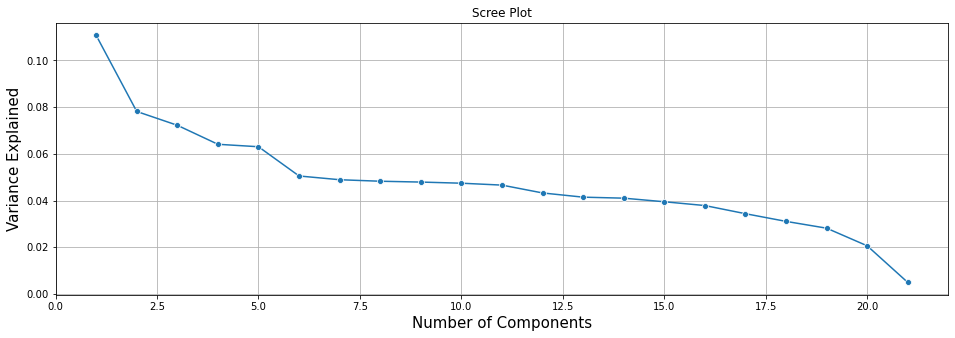

In [136]:
plt.figure(figsize=(16,5))
plt.grid(True)
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,22),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=12)
plt.show();

### Checking Cut off data point:

* We will check where upto which PC around 85% data has been covered as PC 1 almost covers 15% around data.
* The cut off point will be the point where the data covers 80-85% data. The rest can be dropped off or ignored. 

In [137]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11075736, 0.18891201, 0.2611493 , 0.32524468, 0.388287  ,
       0.43880367, 0.48771402, 0.53597913, 0.5838863 , 0.63130655,
       0.67790911, 0.72115558, 0.76259645, 0.80360801, 0.84308149,
       0.88092946, 0.91528385, 0.94634624, 0.97449563, 0.99509286,
       1.        ])

* Here we can see that at 15th PC the 84.30 ~ around 85% data has been covered. 16th data will cover around 88.09% data. 
* We can take upto 15th PC here. The rest part will be dropped then.

In [138]:
company_data_finalselection = df_extracted[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13',
                                               'PC14','PC15']]

In [139]:
company_data_finalselection

PC1    PC2    PC3    PC4    PC5    PC6    PC7  \
dist_from_hub                -0.004 -0.018 -0.004  0.031 -0.013  0.046  0.335   
retail_shop_num              -0.014 -0.032  0.077 -0.247  0.324 -0.549  0.029   
location_type                 0.095  0.000 -0.019  0.020  0.020  0.084  0.226   
wh_capacity_size              0.010  0.026 -0.699  0.033 -0.012  0.049 -0.007   
zone                          0.004  0.012  0.237  0.329 -0.410 -0.186 -0.014   
wh_regional_zone              0.007  0.034 -0.657  0.139 -0.172 -0.266  0.033   
num_refill_req_l3m            0.030 -0.041 -0.008  0.441  0.325 -0.053 -0.311   
transport_issue_l1y          -0.105 -0.038  0.012  0.154  0.128  0.050  0.746   
competitor_in_mkt             0.019  0.024  0.032  0.308 -0.389  0.456 -0.026   
wh_owner_type                 0.018 -0.432 -0.027 -0.018 -0.011 -0.017  0.036   
distributor_num               0.006 -0.014  0.002  0.023 -0.008 -0.113  0.117   
flood_impacted               -0.008  0.388  0.026 -0.008  0.037  0.015  0.107   
flood_proof                  -0.007  0.218  0.007  0.015  0.039 -0.112  0.180   
electric_supply              -0.016  0.571  0.010  0.003  0.041 -0.000 -0.010   
wh_est_year                  -0.588 -0.026  0.001  0.150  0.088  0.012  0.051   
storage_issue_reported_l3m    0.595  0.029  0.002 -0.150 -0.086 -0.013 -0.071   
temp_reg_mach                 0.152 -0.020  0.016  0.536  0.422 -0.006 -0.110   
approved_wh_govt_certificate  0.314  0.004  0.017  0.278  0.228  0.020  0.177   
wh_breakdown_l3m              0.395 -0.003  0.016 -0.013 -0.021  0.004  0.253   
govt_check_l3m               -0.012 -0.027 -0.117 -0.291  0.414  0.584 -0.047   
workers_num                  -0.023  0.529  0.015  0.001  0.040  0.015 -0.066   

                                PC8    PC9   PC10   PC11   PC12   PC13   PC14  \
dist_from_hub                -0.606  0.271 -0.326  0.571 -0.025 -0.011 -0.058   
retail_shop_num              -0.082  0.024  0.070  0.054 -0.120 -0.099  0.644   
location_type                 0.212  0.062  0.765  0.472 -0.256 -0.039 -0.073   
wh_capacity_size              0.005  0.001 -0.027 -0.006 -0.026 -0.072  0.134   
zone                         -0.021  0.026  0.013  0.007 -0.060 -0.167  0.371   
wh_regional_zone             -0.031 -0.004  0.029 -0.021 -0.017  0.042  0.032   
num_refill_req_l3m            0.027  0.073  0.095  0.254  0.562  0.103  0.063   
transport_issue_l1y           0.010 -0.233  0.103 -0.235  0.403  0.027  0.094   
competitor_in_mkt             0.064  0.062 -0.029  0.023 -0.044 -0.060  0.474   
wh_owner_type                 0.181  0.254 -0.046 -0.060 -0.025  0.303  0.100   
distributor_num               0.579 -0.426 -0.468  0.478 -0.057 -0.056 -0.012   
flood_impacted                0.180  0.266 -0.096  0.020 -0.107  0.778  0.143   
flood_proof                   0.393  0.695 -0.134 -0.104  0.114 -0.422 -0.120   
electric_supply              -0.042 -0.082  0.005  0.021  0.057 -0.169 -0.016   
wh_est_year                   0.005 -0.007  0.001 -0.051 -0.185 -0.007 -0.018   
storage_issue_reported_l3m   -0.008  0.014 -0.009  0.046  0.145  0.001  0.011   
temp_reg_mach                -0.024  0.012 -0.045 -0.028 -0.188 -0.030 -0.044   
approved_wh_govt_certificate -0.047 -0.052 -0.133 -0.241 -0.542 -0.050 -0.080   
wh_breakdown_l3m             -0.010 -0.079 -0.019 -0.136  0.139  0.035  0.076   
govt_check_l3m                0.062  0.036 -0.091  0.037 -0.012 -0.164  0.344   
workers_num                  -0.106 -0.200  0.074 -0.010 -0.001  0.034  0.068   

                               PC15  
dist_from_hub                 0.072  
retail_shop_num              -0.072  
location_type                 0.018  
wh_capacity_size             -0.005  
zone                          0.047  
wh_regional_zone             -0.015  
num_refill_req_l3m           -0.025  
transport_issue_l1y          -0.002  
competitor_in_mkt            -0.068  
wh_owner_type                 0.760  
distributor_num               0.028  
flood_impa

### Checking of Original Scaled features:

In [140]:
company_data_scaled.iloc[0]

dist_from_hub                  -1.157
retail_shop_num                -0.318
location_type                   3.352
wh_capacity_size               -1.633
zone                            1.277
wh_regional_zone                1.048
num_refill_req_l3m             -0.418
transport_issue_l1y             0.189
competitor_in_mkt              -0.967
wh_owner_type                   1.090
distributor_num                -1.147
flood_impacted                 -0.330
flood_proof                     4.160
electric_supply                 0.723
wh_est_year                     0.043
storage_issue_reported_l3m     -0.451
temp_reg_mach                  -0.660
approved_wh_govt_certificate    0.820
wh_breakdown_l3m                0.898
govt_check_l3m                 -0.442
workers_num                     0.009
Name: 0, dtype: float64

### Obtaining scores by performing dot products = Loading * features 

In [141]:
for i in company_data_finalselection.columns:
    pc_score = np.dot(company_data_finalselection[i], company_data_scaled.iloc[0])
    print(round(pc_score,4  ), end = ' ')

0.4731 0.779 0.7133 0.2531 -0.5137 -1.1908 1.7931 2.3222 3.1438 2.93 -0.6494 -0.6332 -1.7768 -1.1196 1.1979 

In [142]:
pca = PCA(n_components=15, random_state=123)
company_final = pca.fit_transform(company_data_scaled)

In [143]:
company_final_df = pd.DataFrame(company_final, columns = company_data_finalselection.columns)
company_final_df.head()

PC1    PC2    PC3    PC4    PC5    PC6   PC7    PC8    PC9   PC10   PC11  \
0  0.473  0.779  0.713  0.253 -0.514 -1.191 1.793  2.322  3.144  2.930 -0.649   
1 -1.660  0.800 -1.097 -0.660 -0.120 -0.169 0.447 -0.825 -0.519 -0.699  0.029   
2  0.783  0.024  1.109 -0.594 -0.824  1.176 0.289  0.454 -1.236 -1.083  0.012   
3  0.280 -2.272  0.403  0.851  3.190 -0.085 1.398  0.918 -0.748 -0.100 -1.175   
4  0.165  1.697 -1.277 -1.587  0.272  0.188 0.431  0.780  0.011 -0.131 -0.527   

    PC12   PC13   PC14   PC15  
0 -0.633 -1.777 -1.120  1.198  
1 -2.002 -0.801  0.457 -0.361  
2 -1.019 -0.439 -0.011 -0.387  
3  0.535  0.388  0.287 -0.091  
4  0.766  2.248  0.015 -1.582

# Introducing New column - to calculate Ware House Age

* Subtracting from the current year i.e. 2023 the established year of the ware house we will get the age of the ware house

In [144]:
company_data_imputed['age_of_warehouse'] =  2023 - company_data_imputed['wh_est_year']

In [145]:
company_data_imputed.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
0         -1.157           -0.318          1.000             1.000 3.000   
1          0.741            1.170          0.000             3.000 1.000   
2         -0.040           -0.646          0.000             2.000 2.000   
3         -0.965            0.963          0.000             2.000 1.000   
4         -0.822           -0.233          0.000             3.000 1.000   

   wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0             6.000               3.000                1.000   
1             5.000               0.000                0.000   
2             2.000               1.000                0.000   
3             3.000               7.000                4.000   
4             5.000               3.000                1.000   

   competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
0              2.000          1.000           24.000           0.000   
1              4.000          0.000           47.000           0.000   
2              4.000          0.000           64.000           0.000   
3              2.000          1.000           50.000           0.000   
4              2.000          0.000           42.000           1.000   

   flood_proof  electric_supply  wh_est_year  storage_issue_reported_l3m  \
0        1.000            1.000     2010.600                      13.000   
1        0.000            1.000     2020.400                       4.000   
2        0.000            0.000     2009.800                      17.000   
3        0.000            0.000     2010.800                      17.000   
4        0.000            1.000     2009.000                      18.000   

   temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0          0.000                         4.000             5.000   
1          0.000                         4.000             3.000   
2          0.000                         4.000             6.000   
3          1.000                         5.000             3.000   
4          0.000                         1.000             6.000   

   govt_check_l3m  workers_num  product_wg_ton  age_of_warehouse  
0          15.000       29.000       17115.000            12.400  
1          17.000       31.000        5074.000             2.600  
2          22.000       37.000       23137.000            13.200  
3          27.000       21.000       22115.000            12.200  
4          24.000       25.000       24071.000            14.000

In [146]:
company_data_imputed.skew()

dist_from_hub                  -0.006
retail_shop_num                 0.908
location_type                   3.054
wh_capacity_size               -0.368
zone                            0.103
wh_regional_zone               -0.549
num_refill_req_l3m             -0.075
transport_issue_l1y             1.611
competitor_in_mkt               0.978
wh_owner_type                   0.173
distributor_num                 0.015
flood_impacted                  2.701
flood_proof                     3.919
electric_supply                -0.661
wh_est_year                    -0.066
storage_issue_reported_l3m      0.113
temp_reg_mach                   0.856
approved_wh_govt_certificate    0.018
wh_breakdown_l3m               -0.068
govt_check_l3m                 -0.363
workers_num                     1.075
product_wg_ton                  0.332
age_of_warehouse                0.066
dtype: float64

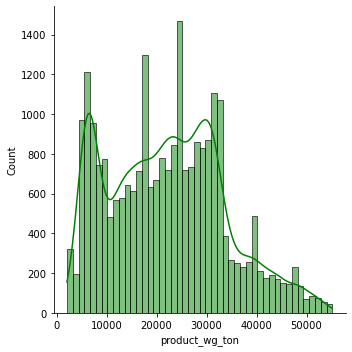

In [147]:
sns.displot(company_data_imputed['product_wg_ton'],kde = True, color='g')
plt.show();

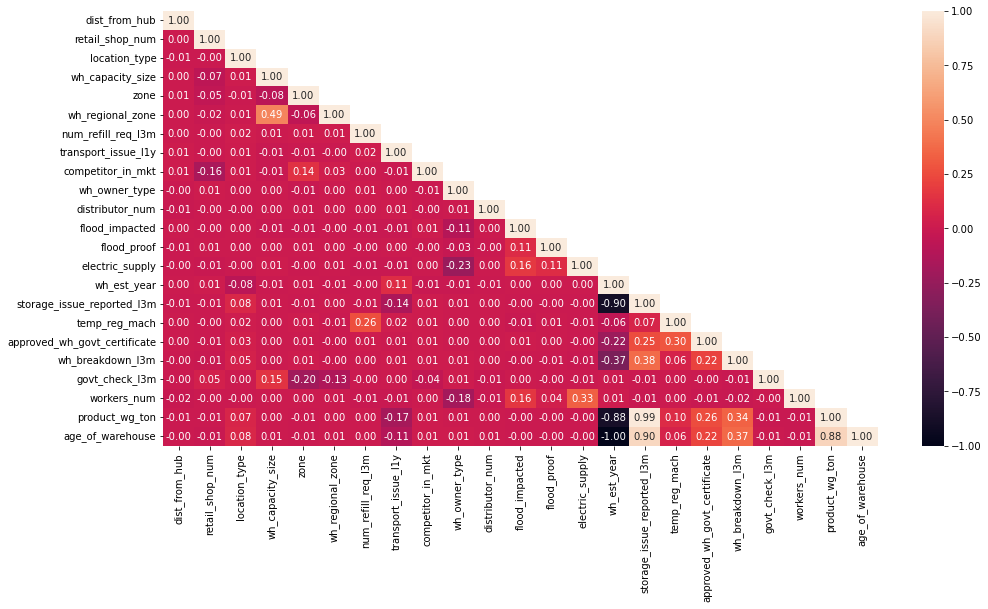

In [148]:
corr = company_data_imputed.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, fmt = '.2f', mask=np.triu(company_data_imputed.corr(),+1))
plt.show();

#### Checking Correlation with Imputed Data

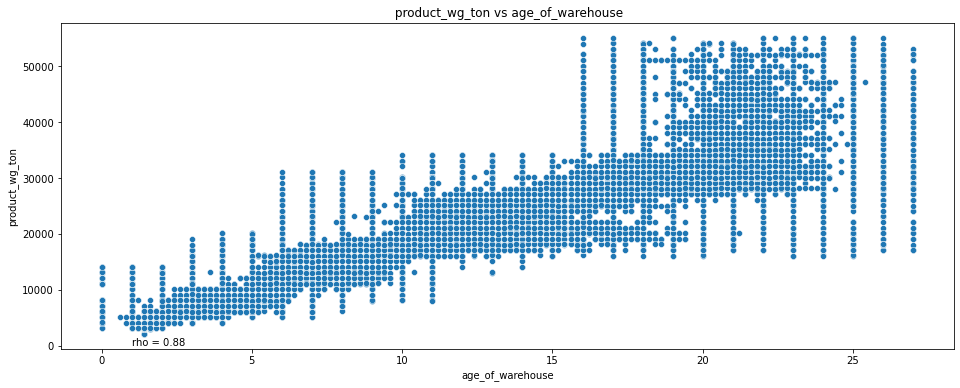

In [149]:
# product_wg_ton vs age_of_warehouse

plt.figure(figsize=(16,6))
c = sns.scatterplot(company_data_imputed['age_of_warehouse'], company_data_imputed['product_wg_ton'])
r = np.round(pearsonr(company_data_imputed['age_of_warehouse'], company_data_imputed['product_wg_ton'])[0],2)
c.text(x = 1,y = 1,s = "rho = "+str(r))
plt.title(" product_wg_ton vs age_of_warehouse", fontsize=12)
plt.show();

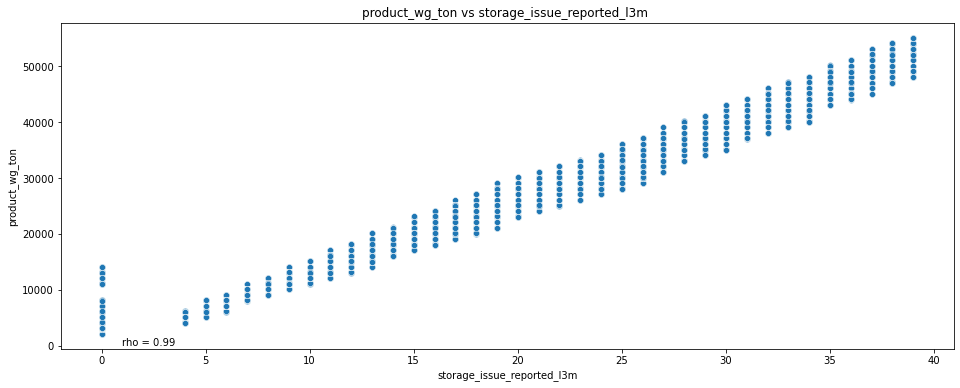

In [150]:
# product_wg_ton vs storage_issue_reported_l3m 

plt.figure(figsize=(16,6))
c = sns.scatterplot(company_data_imputed['storage_issue_reported_l3m'], company_data_imputed['product_wg_ton'])
r = np.round(pearsonr(company_data_imputed['storage_issue_reported_l3m'], company_data_imputed['product_wg_ton'])[0],2)
c.text(x = 1,y = 2,s = "rho = "+str(r))
plt.title("product_wg_ton vs storage_issue_reported_l3m ",fontsize=12)
plt.show()

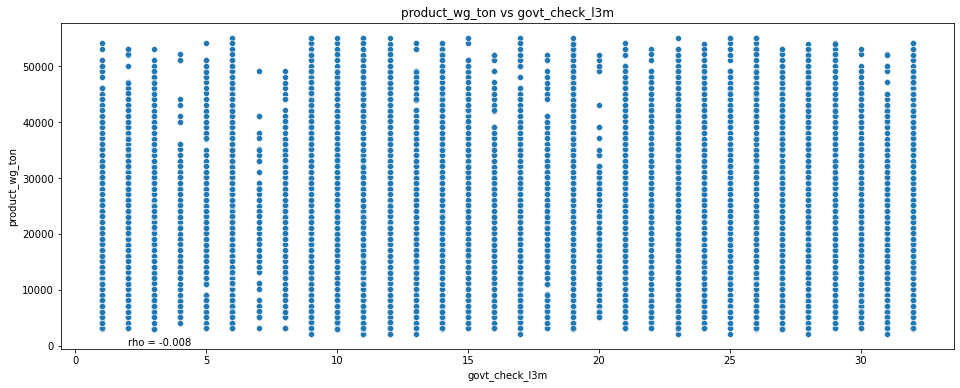

In [151]:
# product_wg_ton vs govt_check_l3m

plt.figure(figsize=(16,6))
c = sns.scatterplot(company_data_imputed['govt_check_l3m'], company_data_imputed['product_wg_ton'])
r = np.round(pearsonr(company_data_imputed['govt_check_l3m'], company_data_imputed['product_wg_ton'])[0],3)
c.text(x = 2,y = 1,s = "rho = "+str(r))
plt.title('product_wg_ton vs govt_check_l3m',fontsize=12)
plt.show()

## Building Different models on imputed final selected data:

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
company_data_model = company_data_imputed.copy()

In [154]:
company_data_model.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
0         -1.157           -0.318          1.000             1.000 3.000   
1          0.741            1.170          0.000             3.000 1.000   
2         -0.040           -0.646          0.000             2.000 2.000   
3         -0.965            0.963          0.000             2.000 1.000   
4         -0.822           -0.233          0.000             3.000 1.000   

   wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0             6.000               3.000                1.000   
1             5.000               0.000                0.000   
2             2.000               1.000                0.000   
3             3.000               7.000                4.000   
4             5.000               3.000                1.000   

   competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
0              2.000          1.000           24.000           0.000   
1              4.000          0.000           47.000           0.000   
2              4.000          0.000           64.000           0.000   
3              2.000          1.000           50.000           0.000   
4              2.000          0.000           42.000           1.000   

   flood_proof  electric_supply  wh_est_year  storage_issue_reported_l3m  \
0        1.000            1.000     2010.600                      13.000   
1        0.000            1.000     2020.400                       4.000   
2        0.000            0.000     2009.800                      17.000   
3        0.000            0.000     2010.800                      17.000   
4        0.000            1.000     2009.000                      18.000   

   temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0          0.000                         4.000             5.000   
1          0.000                         4.000             3.000   
2          0.000                         4.000             6.000   
3          1.000                         5.000             3.000   
4          0.000                         1.000             6.000   

   govt_check_l3m  workers_num  product_wg_ton  age_of_warehouse  
0          15.000       29.000       17115.000            12.400  
1          17.000       31.000        5074.000             2.600  
2          22.000       37.000       23137.000            13.200  
3          27.000       21.000       22115.000            12.200  
4          24.000       25.000       24071.000            14.000

* dist_from_hub & retail_shop_num - must be a whole number

In [155]:
company_data_model_1=company_data_model[['dist_from_hub','retail_shop_num']]
company_data_model_1.head()

dist_from_hub  retail_shop_num
0         -1.157           -0.318
1          0.741            1.170
2         -0.040           -0.646
3         -0.965            0.963
4         -0.822           -0.233

In [156]:
company_data_model_2=company_data_model.drop(['dist_from_hub','retail_shop_num'],axis = 1)

In [157]:
company_data_model_3=company_data[['dist_from_hub','retail_shop_num']]
company_data_model_3.head()

dist_from_hub  retail_shop_num
0             91         4651.000
1            210         6217.000
2            161         4306.000
3            103         6000.000
4            112         4740.000

In [158]:
company_data_model_3.shape

(25000, 2)

#### Obtaining actual data for modelling 

In [159]:
model_data = pd.DataFrame(pd.concat([company_data_model_3,company_data_model_2],axis = 1))

In [160]:
model_data.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
0             91         4651.000          1.000             1.000 3.000   
1            210         6217.000          0.000             3.000 1.000   
2            161         4306.000          0.000             2.000 2.000   
3            103         6000.000          0.000             2.000 1.000   
4            112         4740.000          0.000             3.000 1.000   

   wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0             6.000               3.000                1.000   
1             5.000               0.000                0.000   
2             2.000               1.000                0.000   
3             3.000               7.000                4.000   
4             5.000               3.000                1.000   

   competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
0              2.000          1.000           24.000           0.000   
1              4.000          0.000           47.000           0.000   
2              4.000          0.000           64.000           0.000   
3              2.000          1.000           50.000           0.000   
4              2.000          0.000           42.000           1.000   

   flood_proof  electric_supply  wh_est_year  storage_issue_reported_l3m  \
0        1.000            1.000     2010.600                      13.000   
1        0.000            1.000     2020.400                       4.000   
2        0.000            0.000     2009.800                      17.000   
3        0.000            0.000     2010.800                      17.000   
4        0.000            1.000     2009.000                      18.000   

   temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
0          0.000                         4.000             5.000   
1          0.000                         4.000             3.000   
2          0.000                         4.000             6.000   
3          1.000                         5.000             3.000   
4          0.000                         1.000             6.000   

   govt_check_l3m  workers_num  product_wg_ton  age_of_warehouse  
0          15.000       29.000       17115.000            12.400  
1          17.000       31.000        5074.000             2.600  
2          22.000       37.000       23137.000            13.200  
3          27.000       21.000       22115.000            12.200  
4          24.000       25.000       24071.000            14.000

## Splitting data into Traing and Testing

* Splitting predictor variables into = X

In [161]:
X = model_data.drop(['product_wg_ton','wh_est_year'], axis = 1)

In [162]:
X.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
0             91         4651.000          1.000             1.000 3.000   
1            210         6217.000          0.000             3.000 1.000   
2            161         4306.000          0.000             2.000 2.000   
3            103         6000.000          0.000             2.000 1.000   
4            112         4740.000          0.000             3.000 1.000   

   wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0             6.000               3.000                1.000   
1             5.000               0.000                0.000   
2             2.000               1.000                0.000   
3             3.000               7.000                4.000   
4             5.000               3.000                1.000   

   competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
0              2.000          1.000           24.000           0.000   
1              4.000          0.000           47.000           0.000   
2              4.000          0.000           64.000           0.000   
3              2.000          1.000           50.000           0.000   
4              2.000          0.000           42.000           1.000   

   flood_proof  electric_supply  storage_issue_reported_l3m  temp_reg_mach  \
0        1.000            1.000                      13.000          0.000   
1        0.000            1.000                       4.000          0.000   
2        0.000            0.000                      17.000          0.000   
3        0.000            0.000                      17.000          1.000   
4        0.000            1.000                      18.000          0.000   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                         4.000             5.000          15.000   
1                         4.000             3.000          17.000   
2                         4.000             6.000          22.000   
3                         5.000             3.000          27.000   
4                         1.000             6.000          24.000   

   workers_num  age_of_warehouse  
0       29.000            12.400  
1       31.000             2.600  
2       37.000            13.200  
3       21.000            12.200  
4       25.000            14.000

In [163]:
print('The shape of the predictor variables is = ',X.shape)

The shape of the predictor variables is =  (25000, 21)


#### Splitting target variable into = y

In [166]:
y = model_data[['product_wg_ton']]

In [167]:
y.head()

product_wg_ton
0       17115.000
1        5074.000
2       23137.000
3       22115.000
4       24071.000

In [168]:
print('The shape of the target variables is = ',y.shape)

The shape of the target variables is =  (25000, 1)


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [170]:
X_train.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
4289             127         5031.000          0.000             3.000 3.000   
19621            248         7280.500          0.000             1.000 3.000   
14965             63         5625.000          0.000             2.000 3.000   
12321            260         4240.000          0.000             1.000 2.000   
6269             144         7280.500          1.000             2.000 3.000   

       wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
4289              5.000               0.000                2.000   
19621             1.000               6.000                2.000   
14965             4.000               6.000                0.000   
12321             6.000               6.000                1.000   
6269              4.000               4.000                4.000   

       competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
4289               4.000          1.000           43.000           0.000   
19621              3.000          1.000           59.000           0.000   
14965              4.000          1.000           39.000           0.000   
12321              3.000          0.000           54.000           0.000   
6269               3.000          0.000           23.000           0.000   

       flood_proof  electric_supply  storage_issue_reported_l3m  \
4289         0.000            1.000                      20.000   
19621        0.000            1.000                      15.000   
14965        0.000            1.000                      31.000   
12321        0.000            1.000                      28.000   
6269         0.000            1.000                      23.000   

       temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
4289           0.000                         2.000             5.000   
19621          1.000                         5.000             3.000   
14965          0.000                         2.000             2.000   
12321          0.000                         2.000             2.000   
6269           0.000                         3.000             6.000   

       govt_check_l3m  workers_num  age_of_warehouse  
4289           14.000       32.000            13.200  
19621          30.000       28.000             9.400  
14965          11.000       26.800            23.000  
12321           2.000       31.000            17.000  
6269           26.000       36.000            26.000

In [171]:
X_test.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
21492            149         2896.000          0.000             3.000 1.000   
9488             140         4896.000          0.000             3.000 3.000   
16933            257         4406.000          0.000             2.000 2.000   
12604            130         5592.000          0.000             2.000 3.000   
8222             216         4225.000          0.000             3.000 1.000   

       wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
21492             6.000               5.000                0.000   
9488              5.000               1.000                1.000   
16933             3.000               5.000                0.000   
12604             3.000               6.000                3.000   
8222              5.000               7.000                0.000   

       competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
21492              2.000          1.000           28.000           0.000   
9488               4.000          1.000           23.000           0.000   
16933              3.000          0.000           58.000           0.000   
12604              3.000          0.000           51.000           0.000   
8222               3.000          0.000           35.000           0.000   

       flood_proof  electric_supply  storage_issue_reported_l3m  \
21492        0.000            1.000                      23.000   
9488         0.000            0.000                       5.000   
16933        0.000            1.000                       6.000   
12604        0.000            1.000                      18.000   
8222         0.000            1.000                      24.000   

       temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
21492          1.000                         1.000             5.000   
9488           0.000                         2.000             1.000   
16933          1.000                         5.000             3.000   
12604          1.000                         1.000             4.000   
8222           1.000                         3.000             6.000   

       govt_check_l3m  workers_num  age_of_warehouse  
21492          23.000       34.000            16.000  
9488           25.000       32.000             1.600  
16933          19.000       27.000             6.200  
12604          19.000       25.000            15.000  
8222           14.000       26.000            17.000

#### Scaling the Train and test data

In [172]:
scaler=StandardScaler() 

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [173]:
print('The shape of the Train set is = ',X_train_scaled.shape)

The shape of the Train set is =  (17500, 21)


In [174]:
print('The shape of the Test set is = ',X_test_scaled.shape)

The shape of the Test set is =  (7500, 21)


# Linear Regression Model:

### Checking the distribution of the X train attributes

Distribution of - dist_from_hub
----------------------------------


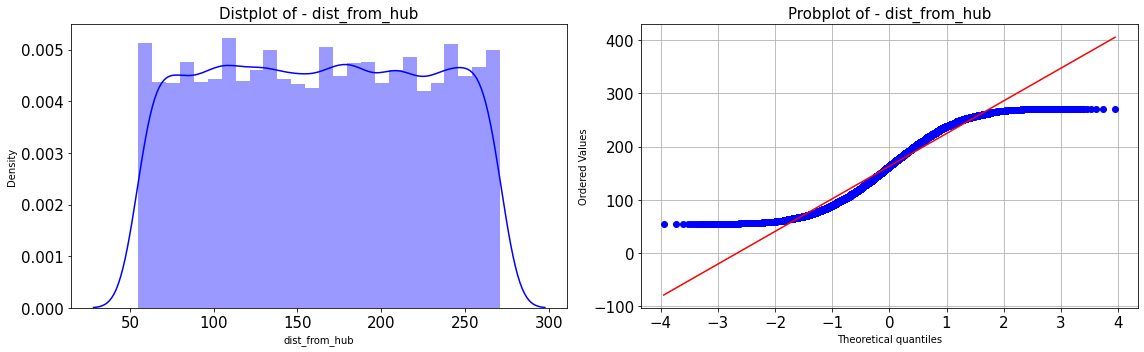

Distribution of - retail_shop_num
----------------------------------


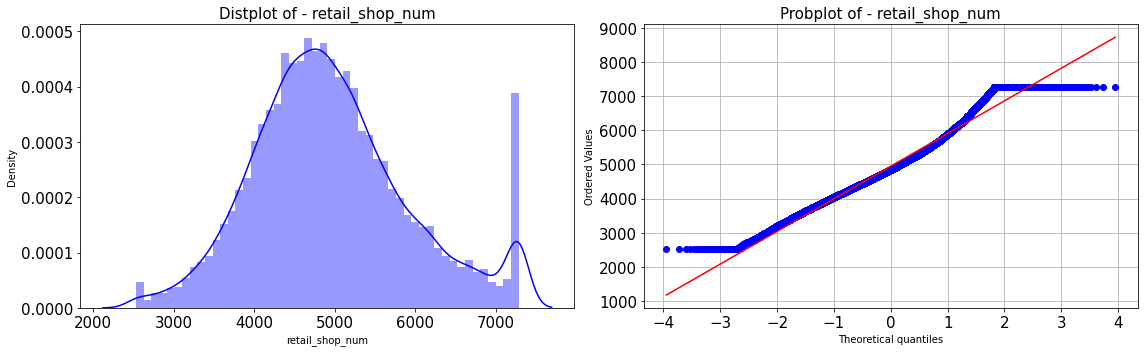

Distribution of - location_type
----------------------------------


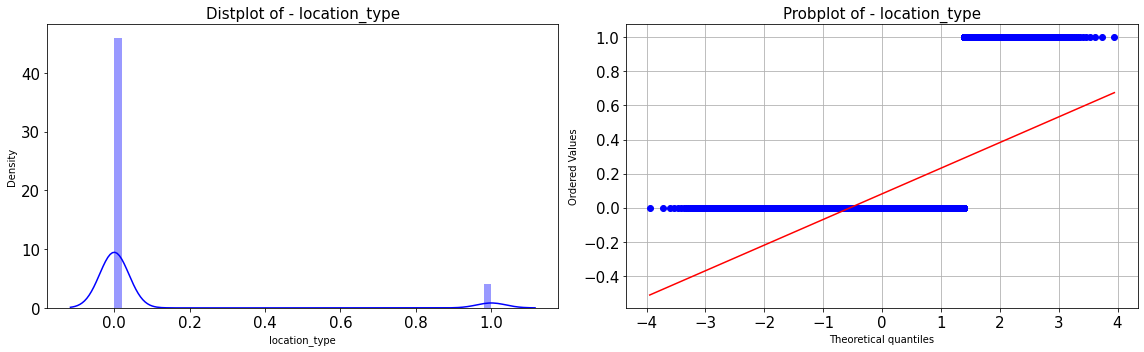

Distribution of - wh_capacity_size
----------------------------------


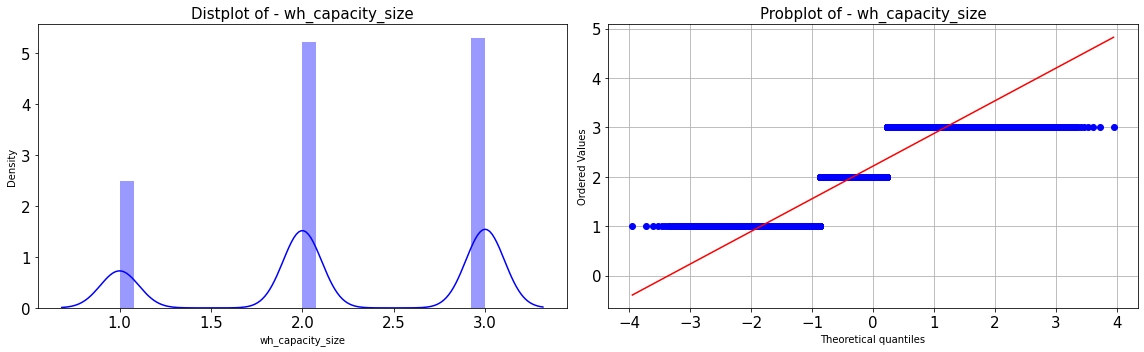

Distribution of - zone
----------------------------------


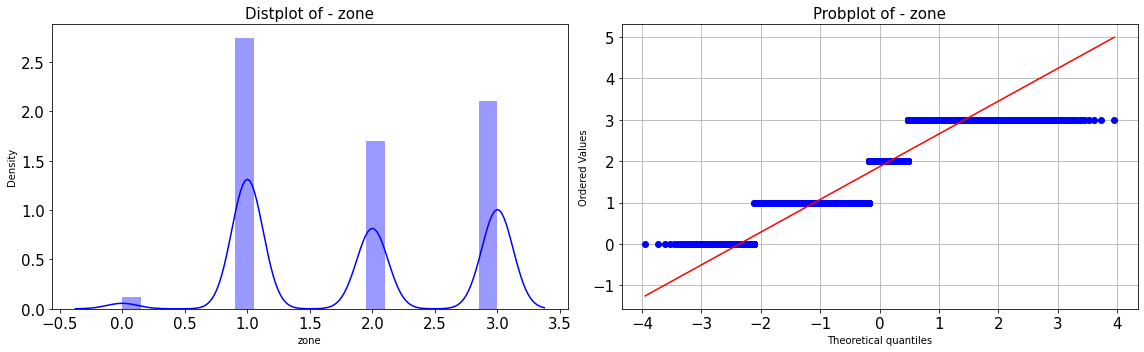

Distribution of - wh_regional_zone
----------------------------------


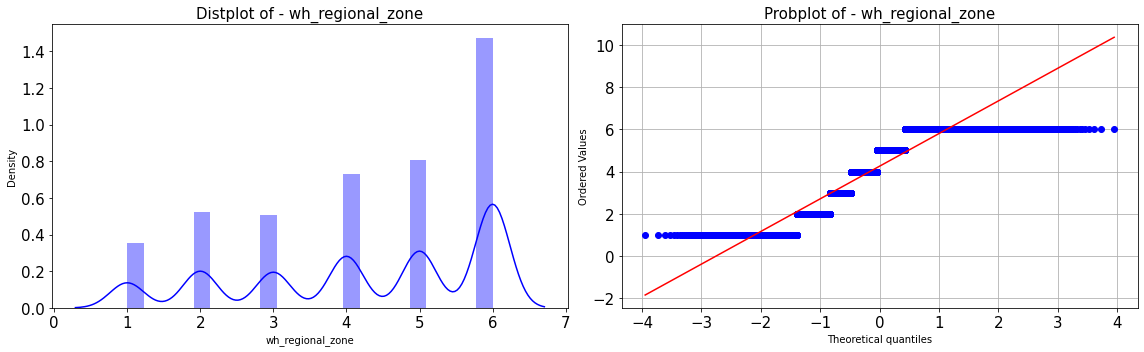

Distribution of - num_refill_req_l3m
----------------------------------


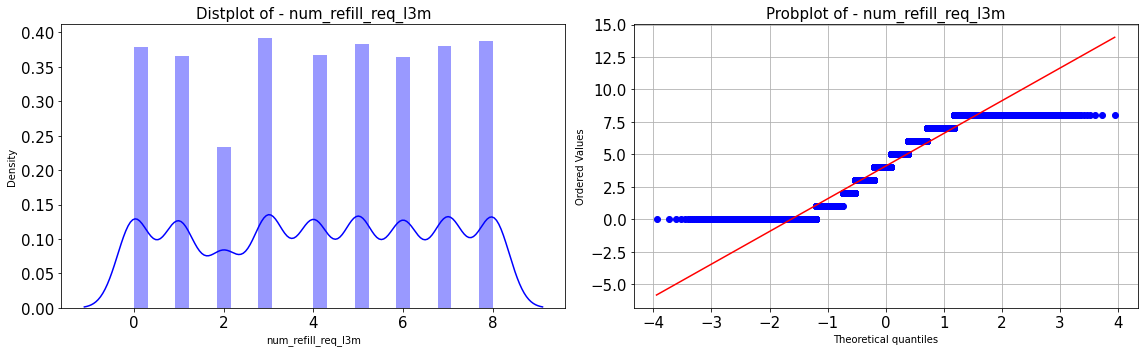

Distribution of - transport_issue_l1y
----------------------------------


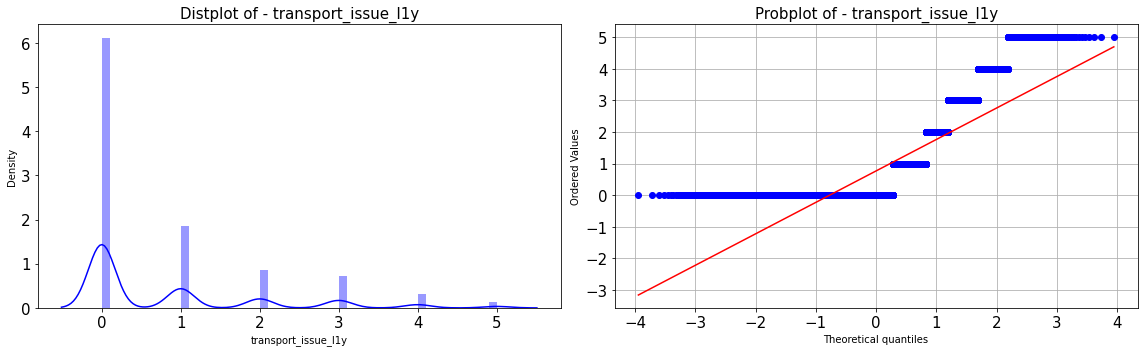

Distribution of - competitor_in_mkt
----------------------------------


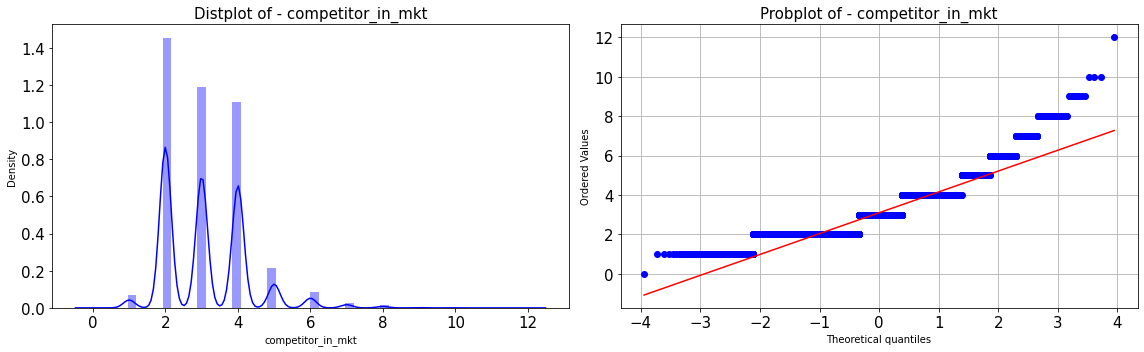

Distribution of - wh_owner_type
----------------------------------


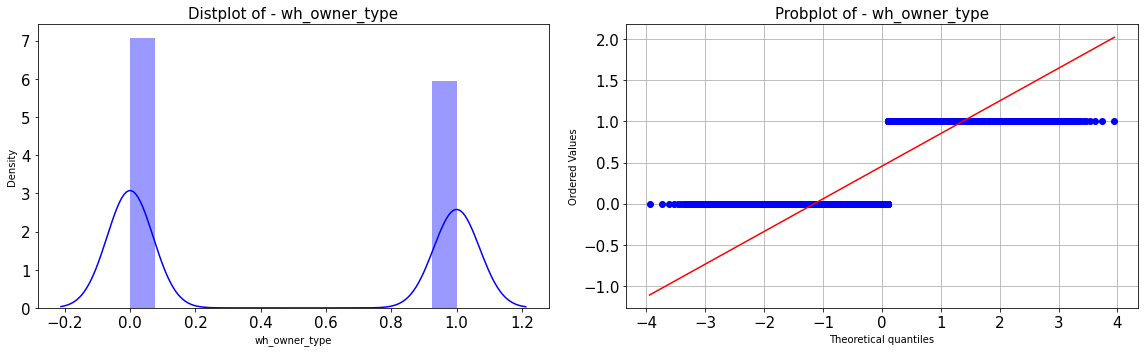

Distribution of - distributor_num
----------------------------------


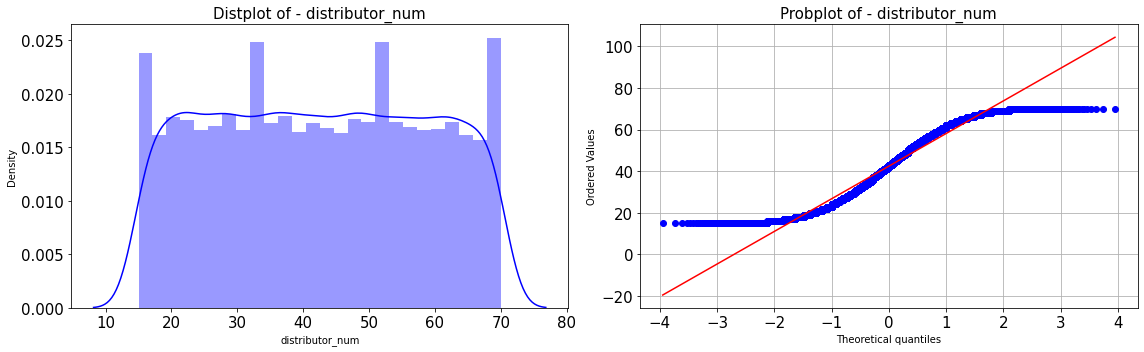

Distribution of - flood_impacted
----------------------------------


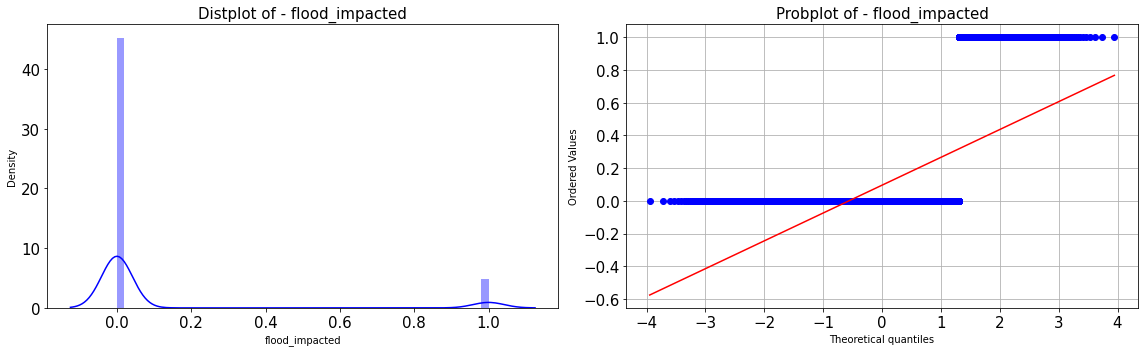

Distribution of - flood_proof
----------------------------------


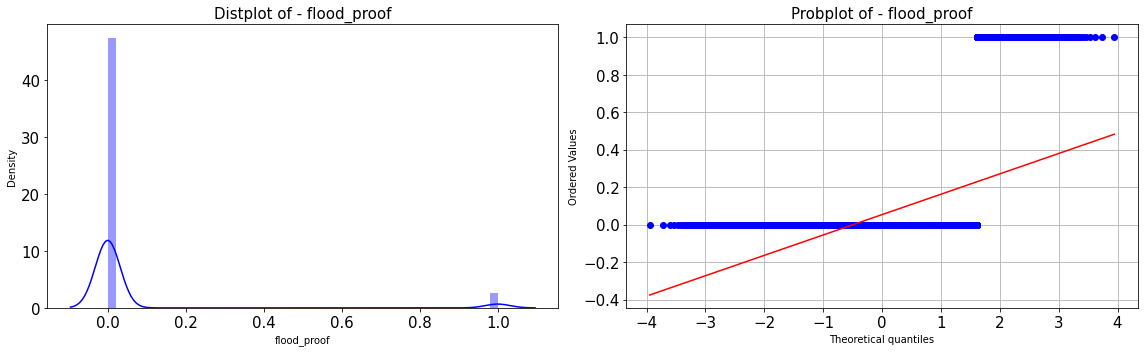

Distribution of - electric_supply
----------------------------------


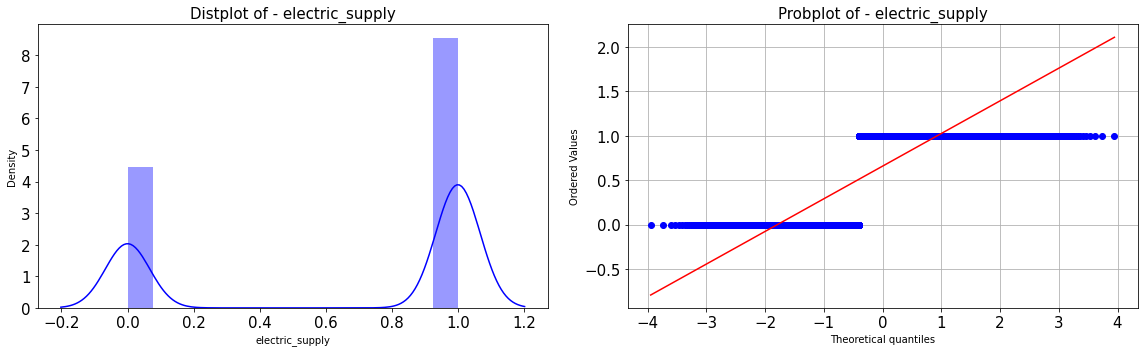

Distribution of - storage_issue_reported_l3m
----------------------------------


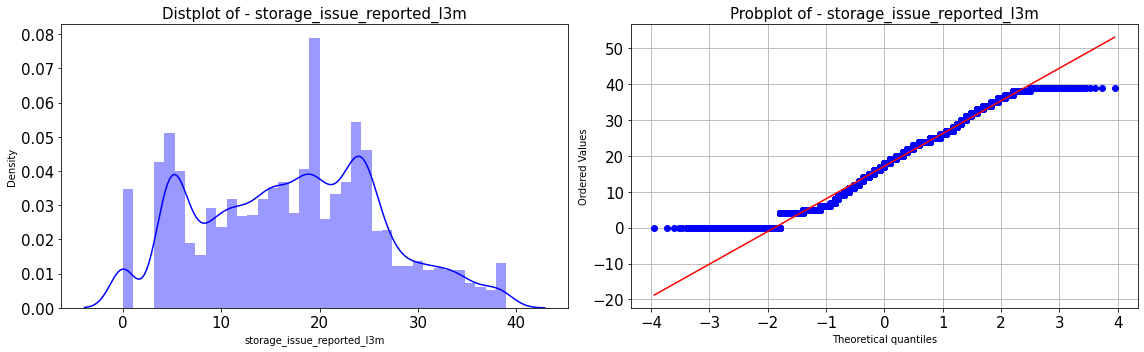

Distribution of - temp_reg_mach
----------------------------------


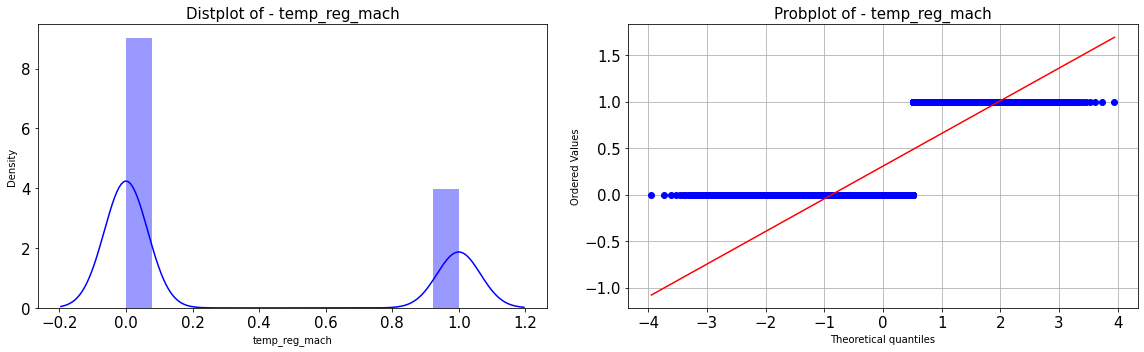

Distribution of - approved_wh_govt_certificate
----------------------------------


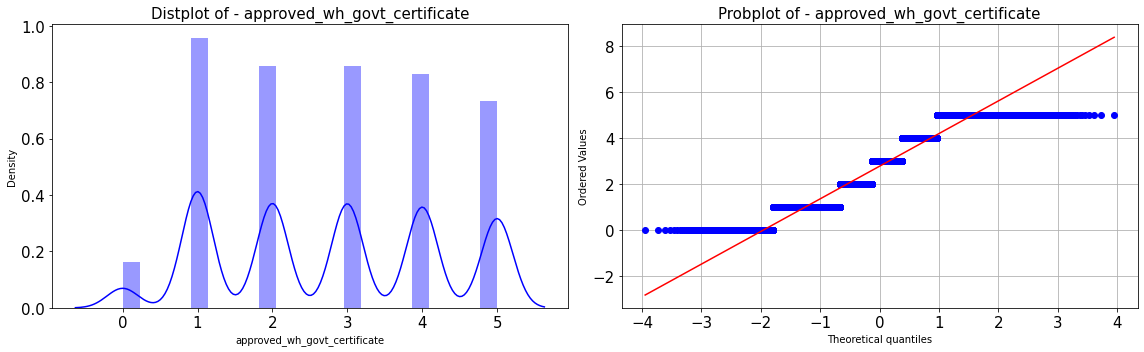

Distribution of - wh_breakdown_l3m
----------------------------------


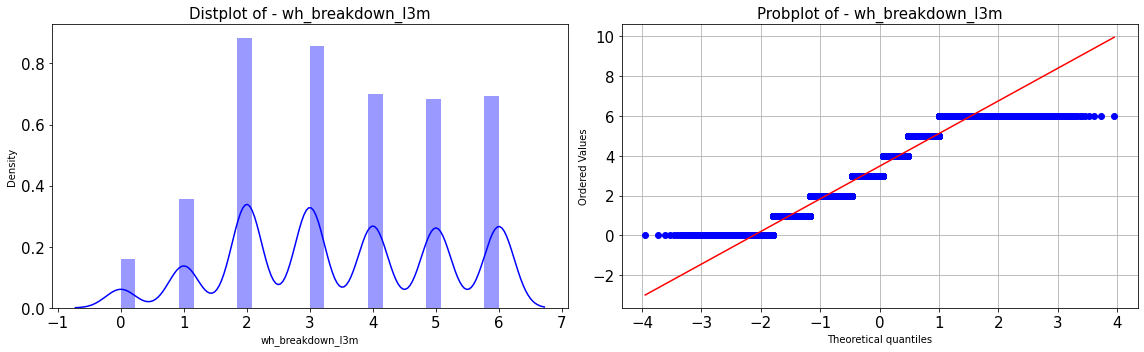

Distribution of - govt_check_l3m
----------------------------------


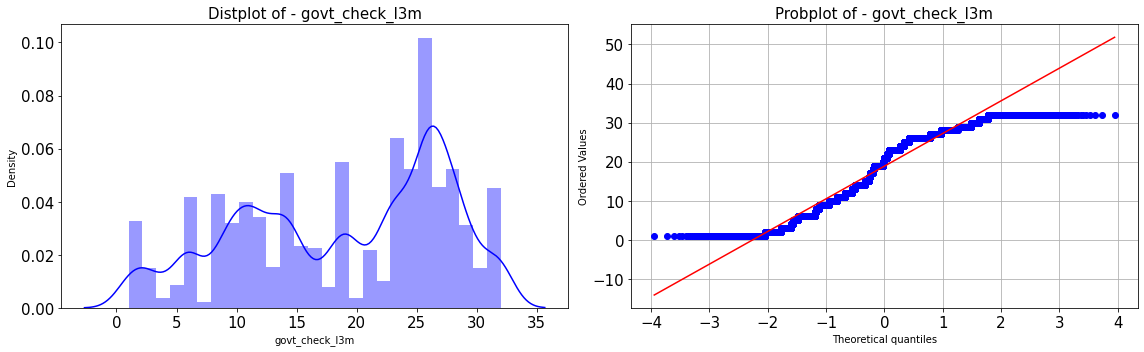

Distribution of - workers_num
----------------------------------


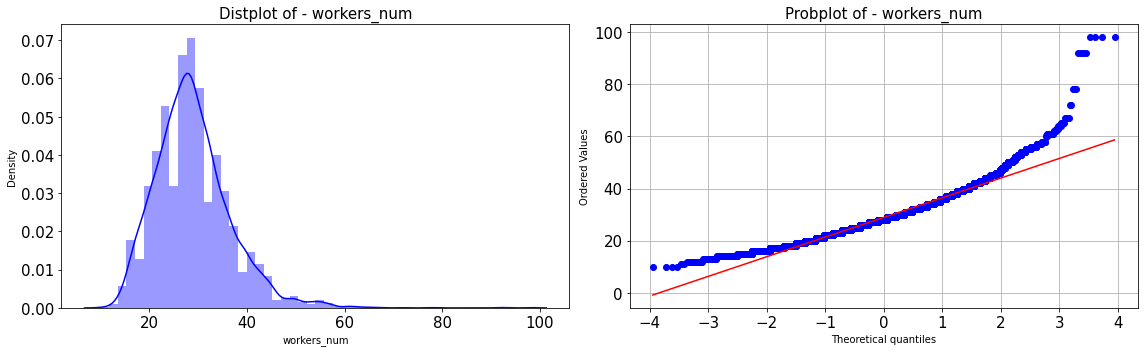

Distribution of - age_of_warehouse
----------------------------------


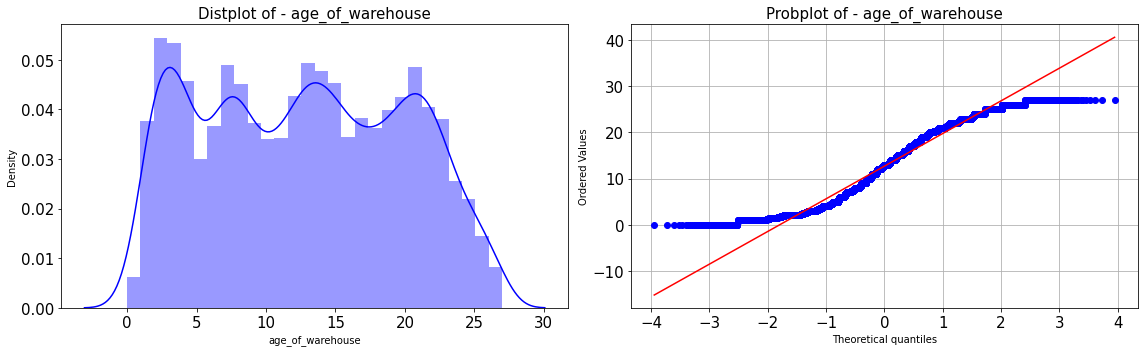

In [175]:
for column in X_train.columns:
    
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
    plt.grid(True)
    print("Distribution of - " + column)
    print("----------------------------------")
    
    sns.distplot(X_train[column], color = 'b', ax=ax1)
    stats.probplot(X_train[column], dist="norm", plot=plt)
       
    
    ax1.tick_params(labelsize = 15)
    ax1.set_title('Distplot of - '+ column, fontsize = 15)
    
    ax2.set_title('Probplot of - '+ column, fontsize = 15)
    ax2.tick_params(labelsize=15)
    
 
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show();

### Building Multiple Linear Regression Model:

In [176]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

### Coefficients of independent variables:

In [177]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is = {}".format(col_name, linear_regression_model.coef_[0][idx]))

The coefficient for dist_from_hub is = 0.29968704433091437
The coefficient for retail_shop_num is = -0.014589731119215799
The coefficient for location_type is = -99.70066170396284
The coefficient for wh_capacity_size is = -9.123765373706807
The coefficient for zone is = -2.805325136914699
The coefficient for wh_regional_zone is = -6.929659155977936
The coefficient for num_refill_req_l3m is = -3.407597033114197
The coefficient for transport_issue_l1y is = -305.0690797764993
The coefficient for competitor_in_mkt is = -6.982334793933542
The coefficient for wh_owner_type is = 12.820321857123394
The coefficient for distributor_num is = 1.2347887434873364
The coefficient for flood_impacted is = 23.25314985907966
The coefficient for flood_proof is = 55.90645968039911
The coefficient for electric_supply is = 10.746313290548791
The coefficient for storage_issue_reported_l3m is = 1277.793836387952
The coefficient for temp_reg_mach is = 932.9546401274367
The coefficient for approved_wh_govt_certi

0.299 * dist_from_hub - 0.0146*retail_shop_num - 99.7*location_type - 9.123*wh_capacity_size - 2.805*zone - 6.929*wh_regional_zone - 3.408*num_refill_req_l3m  - 305.07*transport_issue_l1y - 6.982*competitor_in_mkt + 12.82*wh_owner_type + 1.234*distributor_num + 23.253*flood_impacted  + 55.907*flood_proof + 10.746*electric_supply + 1277.79*storage_issue_reported_l3m + 932.954*temp_reg_mach + 16.516*approved_wh_govt_certificate - 232.745*wh_breakdown_l3m - 0.209*govt_check_l3m - 0.555*workers_num -29.509*age_of_warehouse 

### Calculation of Intercept value:

In [178]:
intercept = linear_regression_model.intercept_[0]
print("The intercept for Multilinear Regression Model is = {}".format(intercept))

The intercept for Multilinear Regression Model is = 1384.1118806878949


In [179]:
# R square on training data

print("R square for Multilinear model - training data = ",linear_regression_model.score(X_train, y_train))

R square for Multilinear model - training data =  0.9767573855687954


In [180]:
# R square on test data

print("R square for Multilinear model - test data = ",linear_regression_model.score(X_test, y_test))

R square for Multilinear model - test data =  0.9778998031409085


In [181]:
# Adj. R square on training data

LR_Adj_r2_training = 1 - (1 - linear_regression_model.score(X_train, y_train)) * (len(model_data)-1) / (len(model_data)-X.shape[1] - 1)
print("Adj_r2 square for Multilinear Regressor model - training data =",LR_Adj_r2_training)

Adj_r2 square for Multilinear Regressor model - training data = 0.9767378445766001


In [182]:
# Adj. R square on test data

LR_Adj_r2_test = 1 - (1- linear_regression_model.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data) - X.shape[1] - 1)
print("Adj_r2 square for Multilinear Regressor model - test data =",LR_Adj_r2_test)

Adj_r2 square for Multilinear Regressor model - test data = 0.9778812226246926


In [183]:
#RMSE on Training data

predicted_train=linear_regression_model.fit(X_train, y_train).predict(X_train)
print("RMSE for Multilinear Regressor model - training data =",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

RMSE for Multilinear Regressor model - training data = 1775.3178209002838


In [184]:
#RMSE on Testing data

predicted_test=linear_regression_model.fit(X_test, y_test).predict(X_test)
print("RMSE for Multilinear Regressor model - test data =",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

RMSE for Multilinear Regressor model - test data = 1708.87749075039


In [185]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
    return mape

In [186]:
#Predictions on Training data

LR_Train_predict = linear_regression_model.predict(X_train)
LR_train_MAPE= MAPE(y_train,LR_Train_predict)
print("MAPE for Multilinear Regressor Model - training data =: ",LR_train_MAPE)

MAPE for Multilinear Regressor Model - training data =:  product_wg_ton   9.065
dtype: float64


In [187]:
#Predictions on Testing data

LR_Test_predict = linear_regression_model.predict(X_test)
LR_test_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE for Multilinear Regressor Model -  test data =: ",LR_test_MAPE)

MAPE for Multilinear Regressor Model -  test data =:  product_wg_ton   8.818
dtype: float64


- Multilinear model R square on test data ===================== 0.9767573855687954
- Multilinear Regressor model Adj_r2 square on training data ====== 0.9767378445766001

- Multilinear model R square on test data====================== 0.9778998031409085
- Multilinear Regressor model Adj_r2 square on test data========== 0.9778812226246926

- Multilinear model RMSE on training data ===================== 1775.3178209002838
- Multilinear model RMSE on test data ========================= 1708.87749075039

- Linear Regression Model MAPE for training data set:==========  product_wg_ton   9.065
- Linear Regression Model MAPE for test data set:==============  product_wg_ton   8.818

# Linear Regression - Stats Model using OLS:

In [188]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

dist_from_hub  retail_shop_num  location_type  wh_capacity_size  zone  \
4289             127         5031.000          0.000             3.000 3.000   
19621            248         7280.500          0.000             1.000 3.000   
14965             63         5625.000          0.000             2.000 3.000   
12321            260         4240.000          0.000             1.000 2.000   
6269             144         7280.500          1.000             2.000 3.000   

       wh_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
4289              5.000               0.000                2.000   
19621             1.000               6.000                2.000   
14965             4.000               6.000                0.000   
12321             6.000               6.000                1.000   
6269              4.000               4.000                4.000   

       competitor_in_mkt  wh_owner_type  distributor_num  flood_impacted  \
4289               4.000          1.000           43.000           0.000   
19621              3.000          1.000           59.000           0.000   
14965              4.000          1.000           39.000           0.000   
12321              3.000          0.000           54.000           0.000   
6269               3.000          0.000           23.000           0.000   

       flood_proof  electric_supply  storage_issue_reported_l3m  \
4289         0.000            1.000                      20.000   
19621        0.000            1.000                      15.000   
14965        0.000            1.000                      31.000   
12321        0.000            1.000                      28.000   
6269         0.000            1.000                      23.000   

       temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
4289           0.000                         2.000             5.000   
19621          1.000                         5.000             3.000   
14965          0.000                         2.000             2.000   
12321          0.000                         2.000             2.000   
6269           0.000                         3.000             6.000   

       govt_check_l3m  workers_num  age_of_warehouse  product_wg_ton  
4289           14.000       32.000            13.200       23086.000  
19621          30.000       28.000             9.400       19108.000  
14965          11.000       26.800            23.000       38125.000  
12321           2.000       31.000            17.000       33123.000  
6269           26.000       36.000            26.000       26089.000

In [189]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'product_wg_ton ~ dist_from_hub+retail_shop_num+location_type+wh_capacity_size+zone+wh_regional_zone+num_refill_req_l3m+transport_issue_l1y+competitor_in_mkt+wh_owner_type+distributor_num+flood_impacted+flood_proof+electric_supply+storage_issue_reported_l3m+temp_reg_mach+approved_wh_govt_certificate+wh_breakdown_l3m+govt_check_l3m+workers_num+age_of_warehouse', data = train_data).fit()
lm1.params

Intercept                      1384.112
dist_from_hub                     0.300
retail_shop_num                  -0.015
location_type                   -99.701
wh_capacity_size                 -9.124
zone                             -2.805
wh_regional_zone                 -6.930
num_refill_req_l3m               -3.408
transport_issue_l1y            -305.069
competitor_in_mkt                -6.982
wh_owner_type                    12.820
distributor_num                   1.235
flood_impacted                   23.253
flood_proof                      55.906
electric_supply                  10.746
storage_issue_reported_l3m     1277.794
temp_reg_mach                   932.955
approved_wh_govt_certificate     16.515
wh_breakdown_l3m               -232.745
govt_check_l3m                   -0.210
workers_num                      -0.555
age_of_warehouse                -29.509
dtype: float64

In [190]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.498e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:58:26   Log-Likelihood:            -1.5576e+05
No. Observations:               17500   AIC:                         3.116e+05
Df Residuals:                   17478   BIC:                         3.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

* The columns with higher p value than 0.05 will have multicollinearity.
* We can see the columns like - govt_check_l3m = 0.912, workers_num = 0.767, electric_supply = 0.721, zone = 0.779, wh_capacity_size = 0.677
wh_regional_zone = 0.616, flood_impacted= 0.638, wh_owner_type =0.599, competitor_in_mkt = 0.578, flood_proof = 0.410, retail_shop_num = 0.285,
approved_wh_govt_certificate = 0.249, dist_from_hub = 0.148, distributor_num = 0.135 have multicollinearity. 

In [191]:
y_pred1_train = lm1.fittedvalues

In [192]:
y_pred1_test = lm1.predict(X_test)

#### RMSE on Train set for Stat model 1: 

In [193]:
print('RMSE on Training Set for stat Model 1 =',mean_squared_error(y_true = y_train, y_pred=y_pred1_train, squared=False))

RMSE on Training Set for stat Model 1 = 1775.3178209002836


#### RMSE on Test set for Stat model 1: 

In [194]:
print('RMSE on Multilinear model Test Set for stat Model 1 =',np.sqrt(metrics.mean_squared_error(y_test, y_pred1_test)))

RMSE on Multilinear model Test Set for stat Model 1 = 1712.54083547521


#### Plotting of - Predicted y & Actual y :

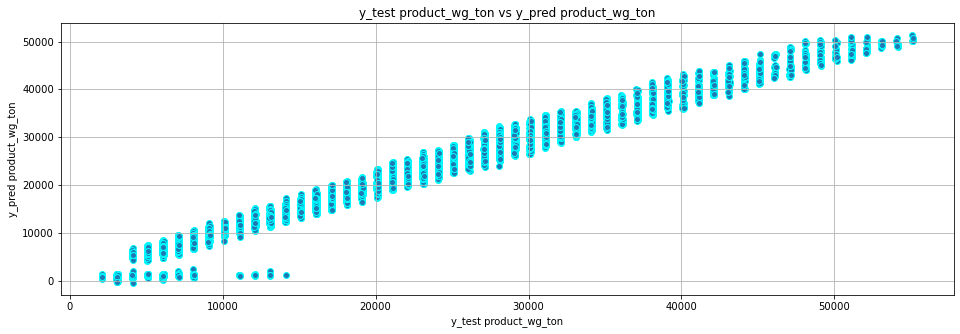

In [195]:
y_pred = linear_regression_model.predict(X_test)

plt.figure(figsize=(16,5))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'], y_pred,edgecolors = 'cyan')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.title('y_test product_wg_ton vs y_pred product_wg_ton')
plt.show();

# Linear Regression Model Tuning :-

### Checking Multicollinearity: VIF 

In [196]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [197]:
vif_cal(X)

dist_from_hub  VIF =  1.0
retail_shop_num  VIF =  1.04
location_type  VIF =  1.01
wh_capacity_size  VIF =  1.4
zone  VIF =  1.07
wh_regional_zone  VIF =  1.4
num_refill_req_l3m  VIF =  1.08
transport_issue_l1y  VIF =  1.03
competitor_in_mkt  VIF =  1.05
wh_owner_type  VIF =  1.07
distributor_num  VIF =  1.0
flood_impacted  VIF =  1.05
flood_proof  VIF =  1.02
electric_supply  VIF =  1.19
storage_issue_reported_l3m  VIF =  5.24
temp_reg_mach  VIF =  1.18
approved_wh_govt_certificate  VIF =  1.19
wh_breakdown_l3m  VIF =  1.2
govt_check_l3m  VIF =  1.13
workers_num  VIF =  1.15
age_of_warehouse  VIF =  5.11


### If the VIF value is higher than the 5, then it is considered that the attribute is highly correlated or substancially correlated with the other predictor variables. And that particular variable needs to be removed to build a correlation free good model.

* Here we can see the age_of_warehouse & storage_issue_reported_l3m having VIF values 5.11 and 5.24 respectively.
* Lets remove the age_of_warehouse 1st and lets check the VIF value again

In [198]:
vif_cal(input_data=X.drop('age_of_warehouse',axis=1))

dist_from_hub  VIF =  1.0
retail_shop_num  VIF =  1.04
location_type  VIF =  1.01
wh_capacity_size  VIF =  1.4
zone  VIF =  1.07
wh_regional_zone  VIF =  1.4
num_refill_req_l3m  VIF =  1.08
transport_issue_l1y  VIF =  1.03
competitor_in_mkt  VIF =  1.05
wh_owner_type  VIF =  1.07
distributor_num  VIF =  1.0
flood_impacted  VIF =  1.05
flood_proof  VIF =  1.02
electric_supply  VIF =  1.19
storage_issue_reported_l3m  VIF =  1.25
temp_reg_mach  VIF =  1.18
approved_wh_govt_certificate  VIF =  1.19
wh_breakdown_l3m  VIF =  1.19
govt_check_l3m  VIF =  1.13
workers_num  VIF =  1.15


* Now we have got a satisfactory VIF for all the attributes.

* The maximum VIF value present is 1.4 for wh_capacity_size & wh_regional_zone attributes, But this is accepatable VIF values. 
* Now the multicollinearity issue has been removed 

### Checking Linear Regression Model - with Statsmodel Library - removing the age_of_warehouse

In [199]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'product_wg_ton ~ dist_from_hub+retail_shop_num+location_type+wh_capacity_size+zone+wh_regional_zone+num_refill_req_l3m+transport_issue_l1y+competitor_in_mkt+wh_owner_type+distributor_num+flood_impacted+flood_proof+electric_supply+storage_issue_reported_l3m+temp_reg_mach+approved_wh_govt_certificate+wh_breakdown_l3m+govt_check_l3m+workers_num', data = train_data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.662e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:59:08   Log-Likelihood:            -1.5579e+05
No. Observations:               17500   AIC:                         3.116e+05
Df Residuals:                   17479   BIC:                         3.118e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

* Here we can see that - p value for some of the attributes are relatively high than the alpha value i.e. 0.05. That represents that there are still multicollinearity.
* We can remove the numeric attributes which have higher value than 0.05, but for if the attribute is categorical in nature we can not remove the same.

* Building Linear model - Eliminating  the varaibles like - dist_from_hub, retail_shop_num,Competitor_in_mkt,workers_num

In [200]:
import statsmodels.formula.api as smf
lm3 = smf.ols(formula= 'product_wg_ton ~ location_type+wh_capacity_size+zone+wh_regional_zone+num_refill_req_l3m+transport_issue_l1y+wh_owner_type+distributor_num+flood_impacted+flood_proof+electric_supply+storage_issue_reported_l3m+temp_reg_mach+approved_wh_govt_certificate+wh_breakdown_l3m+govt_check_l3m', data = train_data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.578e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:59:13   Log-Likelihood:            -1.5579e+05
No. Observations:               17500   AIC:                         3.116e+05
Df Residuals:                   17483   BIC:                         3.117e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [201]:
coefficients_3 = lm3.params
print(coefficients_3) 

Intercept                      1325.140
location_type                  -108.510
wh_capacity_size                 -6.061
zone                             -3.095
wh_regional_zone                 -8.378
num_refill_req_l3m               -3.718
transport_issue_l1y            -307.855
wh_owner_type                    12.965
distributor_num                   1.174
flood_impacted                   24.123
flood_proof                      59.092
electric_supply                   7.483
storage_issue_reported_l3m     1257.230
temp_reg_mach                   931.555
approved_wh_govt_certificate     17.877
wh_breakdown_l3m               -237.480
govt_check_l3m                   -0.333
dtype: float64


So We can have the final Linear Regression Model as - 

Product_wg_ton = [1325.140 - (108.510 * ocation_type) - (6.061 * WH_capacity_size) - (3.0952 * zone) - (8.378 * WH_regional_zone) - (3.718 * num_refill_req_l3m) - (307.855 * transport_issue_l1y) + (12.965 * wh_owner_type) + (1.174 * distributor_num) + (24.123 * flood_impacted) + (59.092 * flood_proof) + (7.483 * electric_supply) + (1257.23 * storage_issue_reported_l3m) + (931.555 * temp_reg_mach) + (17.877 * approved_wh_govt_certificate) - (237.48 * wh_breakdown_l3m) - (0.333 * govt_check_l3m)] 

### Extraction of Residuals:

In [202]:
LM_df = pd.DataFrame()
LM_df['prediction'] = lm3.fittedvalues.copy()
LM_df['observed'] = train_data['product_wg_ton'].values.copy()
LM_df['residual'] = LM_df['observed']- LM_df['prediction']
LM_df.head()

prediction  observed  residual
4289    24699.304 23086.000 -1613.304
19621   19910.083 19108.000  -802.083
14965   39845.425 38125.000 -1720.425
12321   35765.919 33123.000 -2642.919
6269    27486.300 26089.000 -1397.300

# Linear Model - Shrinkage Method

* Lasso and Ridge regression model will be built.

In [203]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Ridge Regression Model :--

In [204]:
R=Ridge(alpha=100, random_state= 1)

In [205]:
R.fit(X_train,y_train)

Ridge(alpha=100, random_state=1)

In [173]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is = {}".format(col_name, R.coef_[0][idx]))

The coefficient for dist_from_hub is = 0.2994657631999966
The coefficient for retail_shop_num is = -0.014450699063754395
The coefficient for location_type is = -92.04191785609865
The coefficient for wh_capacity_size is = -8.982185168495521
The coefficient for zone is = -2.613311291565028
The coefficient for wh_regional_zone is = -6.989178713406168
The coefficient for num_refill_req_l3m is = -2.1179429771210554
The coefficient for transport_issue_l1y is = -303.9460525157259
The coefficient for competitor_in_mkt is = -6.904296960807398
The coefficient for wh_owner_type is = 12.39424303331559
The coefficient for distributor_num is = 1.2361255556576145
The coefficient for flood_impacted is = 21.83524252475961
The coefficient for flood_proof is = 50.66421719355806
The coefficient for electric_supply is = 10.644978653400555
The coefficient for storage_issue_reported_l3m is = 1277.3281618676087
The coefficient for temp_reg_mach is = 904.0509723545235
The coefficient for approved_wh_govt_certi

In [174]:
y_pred1_ridge_regression=R.predict(X_test)

In [175]:
print("R square for Ridge regression - training data = ",R.score(X_train,y_train))

R square for Ridge regression - training data =  0.9767561986724254


In [176]:
print("R square for Ridge Regression - test data = ",R.score(X_test,y_test))

R square for Ridge Regression - test data =  0.9778967367511464


In [177]:
Adj_r2_ridge_training = 1 - (1-R.score(X_train, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Adj_r2 square for Ridge Regression - training data = ",Adj_r2_ridge_training)

Adj_r2 square for Ridge Regression - training data =  0.976736656682359


In [178]:
Adj_r2_ridge_test = 1 - (1-R.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Adj_r2 square for Ridge Regression - test data =",Adj_r2_ridge_test)

Adj_r2 square for Ridge Regression - test data = 0.9778781536568945


In [179]:
predicted_train_ridge_regression = R.fit(X_train, y_train).predict(X_train)
print("RMSE for Ridge Regression - training data =",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_ridge_regression)))

RMSE for Ridge Regression - training data = 1775.3631490922587


In [180]:
predicted_test_ridge_regression=R.fit(X_test, y_test).predict(X_test)
print("RMSE for Ridge Regression -  test data =",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_ridge_regression)))

RMSE for Ridge Regression -  test data = 1709.1453603182356


In [181]:
Ridge_regression_Train_predict = R.predict(X_train)
Ridge_regression_train_MAPE= MAPE(y_train,Ridge_regression_Train_predict)
print("MAPE for Ridge Regression - training data = ",Ridge_regression_train_MAPE)

MAPE for Ridge Regression - training data =  product_wg_ton   9.046
dtype: float64


In [182]:
Ridge_regression_Test_predict = R.predict(X_test)
Ridge_regression_test_MAPE= MAPE(y_test,Ridge_regression_Test_predict)
print(" MAPE for for Ridge Regression - test data = ",Ridge_regression_test_MAPE)

 MAPE for for Ridge Regression - test data =  product_wg_ton   8.801
dtype: float64


- Ridge Regression model R square on train data ===================== 0.9767561986724254
- Ridge Regression model model R square on test data====================== 0.9778998031409085

- Ridge Regression model model Adj_r2 square on training data ====== 0.9778967367511464
- Ridge Regression model Regressor model Adj_r2 square on test data========== 0.9778781536568945

- Ridge Regression model RMSE on training data ===================== 1775.3631490922587
- Ridge Regression model RMSE on test data ========================= 1709.1453603182356

- Ridge Regression model MAPE for training data set:==========  product_wg_ton   9.046
- Ridge Regression modell MAPE for test data set:==============  product_wg_ton   8.801

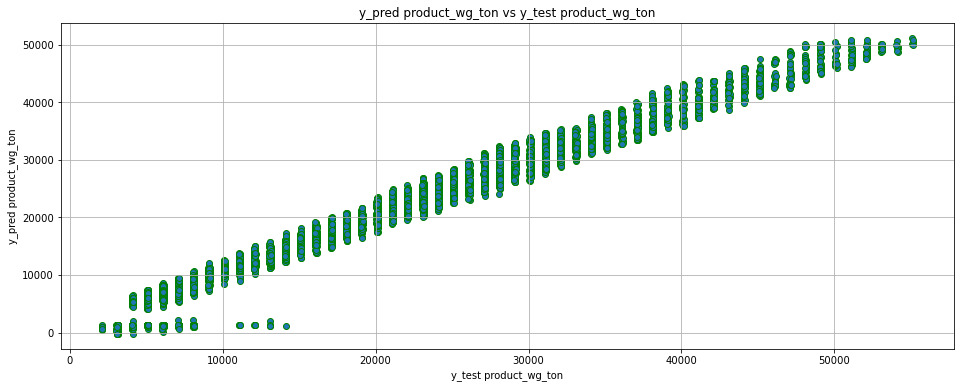

In [183]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'],y_pred1_ridge_regression ,edgecolors = 'g')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.title('y_pred product_wg_ton vs y_test product_wg_ton')
plt.show();

# Lasso Regression Model:- 

In [208]:
from sklearn.linear_model import Lasso

In [193]:
lasso_model = Lasso(alpha=10)

In [194]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=10)

In [195]:
y_pred1_lasso_model = lasso_model.predict(X_test)

In [196]:
print ("Lasso model:", (lasso_model.coef_))
lasso_model_coefficient = pd.DataFrame(lasso_model.coef_)

Lasso model: [ 2.99479087e-01 -1.20219443e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.50904908e+00 -0.00000000e+00 -2.98611680e+02
 -0.00000000e+00  0.00000000e+00  1.19263007e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.27663798e+03  8.78923325e+02
  1.57801562e+01 -2.28763537e+02 -4.53334671e-02 -6.93846802e-02
 -2.83102613e+01]


In [197]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is = {}  ".format(col_name, lasso_model_coefficient[0][idx]))

The coefficient for dist_from_hub is = 0.299479087272803  
The coefficient for retail_shop_num is = -0.012021944314432624  
The coefficient for location_type is = -0.0  
The coefficient for wh_capacity_size is = -0.0  
The coefficient for zone is = -0.0  
The coefficient for wh_regional_zone is = -5.5090490758042785  
The coefficient for num_refill_req_l3m is = -0.0  
The coefficient for transport_issue_l1y is = -298.6116796925558  
The coefficient for competitor_in_mkt is = -0.0  
The coefficient for wh_owner_type is = 0.0  
The coefficient for distributor_num is = 1.192630067059252  
The coefficient for flood_impacted is = 0.0  
The coefficient for flood_proof is = 0.0  
The coefficient for electric_supply is = 0.0  
The coefficient for storage_issue_reported_l3m is = 1276.6379769923776  
The coefficient for temp_reg_mach is = 878.9233245570537  
The coefficient for approved_wh_govt_certificate is = 15.780156213195783  
The coefficient for wh_breakdown_l3m is = -228.76353724751112  


In [198]:
print("Lasso Regression model R square on training data",lasso_model.score(X_train,y_train))

Lasso Regression model R square on training data 0.9767436326277193


In [199]:
print("Lasso Regression model R square on test data",lasso_model.score(X_test,y_test))

Lasso Regression model R square on test data 0.9778851140099056


In [200]:
Adj_r2_lasso_model_training = 1 - (1-lasso_model.score(X_train, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Lasso Regression model Adj_r2 square on training data",Adj_r2_lasso_model_training)

Lasso Regression model Adj_r2 square on training data 0.9767240800728784


In [201]:
Adj_r2_lasso_model_test = 1 - (1-lasso_model.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Lasso model Adj_r2 square on test data",Adj_r2_lasso_model_test)

Lasso model Adj_r2 square on test data 0.9778665211439519


In [202]:
predicted_train_lasso_model = lasso_model.fit(X_train, y_train).predict(X_train)
print("Lasso Regression model RMSE on training data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_lasso_model)))

Lasso Regression model RMSE on training data 1775.8429819301284


In [203]:
predicted_test_lasso_model = lasso_model.fit(X_test, y_test).predict(X_test)
print("Lasso Regression model RMSE on test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_lasso_model)))

Lasso Regression model RMSE on test data 1710.1584746328326


In [204]:
#Predictions on Training data
lasso_model_Train_predict = lasso_model.predict(X_train) 
lasso_model_Train_predict=lasso_model_Train_predict.reshape(17500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
lasso_model_train_MAPE= MAPE(y_train,lasso_model_Train_predict)
print("Lasso Regression model MAPE for training data set: ",lasso_model_train_MAPE)

Decision Tree Regressor model MAPE for training data set:  product_wg_ton   9.037
dtype: float64


In [205]:
#Predictions on Training data
lasso_model_Test_predict = lasso_model.predict(X_test) 
lasso_model_Test_predict=lasso_model_Test_predict.reshape(7500,1)
# Using MAPE error metrics to check for the error rate and accuracy level
lasso_model_test_MAPE= MAPE(y_test,lasso_model_Test_predict)
print("Lasso Regression model MAPE for training data set: ",lasso_model_test_MAPE)

Decision Tree Regressor model MAPE for training data set:  product_wg_ton   8.805
dtype: float64


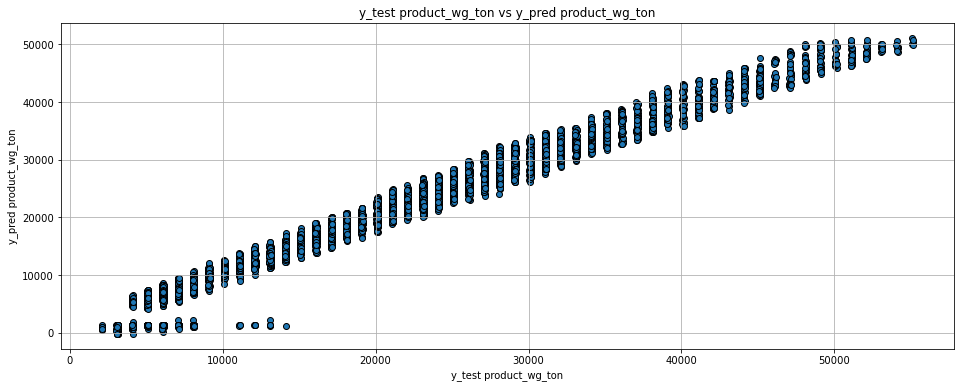

In [206]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'],y_pred1_lasso_model ,edgecolors = 'black')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.title('y_test product_wg_ton vs y_pred product_wg_ton')
plt.show()

In [207]:
dataframe_lasso_model = pd.DataFrame()
dataframe_lasso_model['prediction'] = y_pred1_lasso_model
dataframe_lasso_model['observed'] = y_test['product_wg_ton'].values.copy()
dataframe_lasso_model['res'] = dataframe_lasso_model['observed']- dataframe_lasso_model['prediction']
dataframe_lasso_model.head(10)


prediction  observed       res
0   29970.703 32073.000  2102.297
1    7125.041  5072.000 -2053.041
2    9133.109  8056.000 -1077.109
3   22955.414 23070.000   114.586
4   31040.736 28086.000 -2954.736
5   28879.880 29142.000   262.120
6    7380.080  7127.000  -253.080
7   30813.884 31115.000   301.116
8   15961.118 17096.000  1134.882
9   16540.444 15062.000 -1478.444

# Non Linear Regression Model

## Decission Tree Model:

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
Decs_Tree_Reg = DecisionTreeRegressor(random_state = 0)

In [211]:
Decs_Tree_Reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [212]:
y_predict_decs_tree_reg = Decs_Tree_Reg.predict(X_test)

In [213]:
print("Decision Tree Regressor model R square on training data",Decs_Tree_Reg.score(X_train, y_train))

Decision Tree Regressor model R square on training data 1.0


In [214]:
print("Decision Tree Regressor model R square on test data",Decs_Tree_Reg.score(X_test, y_test))

Decision Tree Regressor model R square on test data 0.9886702601973757


In [215]:
Adj_r2_training_decs_tree = 1 - (1 - Decs_Tree_Reg.score(X_train, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Decision Tree Regressor model Adj_r2 square on training data",Adj_r2_training_decs_tree)

Decision Tree Regressor model Adj_r2 square on training data 1.0


In [216]:
Adj_r2_test_decs_tree = 1 - (1-Decs_Tree_Reg.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Decision Tree Regressor model Adj_r2 square on test data",Adj_r2_test_decs_tree)

Decision Tree Regressor model Adj_r2 square on test data 0.9886607348336214


In [217]:
predicted_train_decs_tree = Decs_Tree_Reg.predict(X_train)
print("Decision Tree Regressor model RMSE on training data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_decs_tree)))

Decision Tree Regressor model RMSE on training data 0.0


In [218]:
predicted_test_decs_tree = Decs_Tree_Reg.predict(X_test)
print("Decicsion Tree Regressor model RMSE on test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_decs_tree)))

Decicsion Tree Regressor model RMSE on test data 1226.1760607677838


In [219]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [220]:
Decs_Tree_Reg_Train_predict = Decs_Tree_Reg.predict(X_train) 
Decs_Tree_Reg_Train_predict = Decs_Tree_Reg_Train_predict.reshape(17500,1)
Decs_Tree_Reg_train_MAPE= MAPE(y_train,Decs_Tree_Reg_Train_predict)
print("Decision Tree Regressor model MAPE for training data set: ",Decs_Tree_Reg_train_MAPE)

Decision Tree Regressor model MAPE for training data set:  product_wg_ton   0.000
dtype: float64


In [221]:
#Predictions on Testing data
Decs_Tree_Test_predict = Decs_Tree_Reg.predict(X_test) 
Decs_Tree_Test_predict=Decs_Tree_Test_predict.reshape(7500,1)
Decs_Tree_test_MAPE= MAPE(y_test,Decs_Tree_Test_predict)
print("Decision Tree Regressor model MAPE for training data set: ",Decs_Tree_test_MAPE)

Decision Tree Regressor model MAPE for training data set:  product_wg_ton   4.743
dtype: float64


In [224]:
dataframe_Decs_Tree_Reg = pd.DataFrame()
dataframe_Decs_Tree_Reg['prediction'] = y_predict_decs_tree_reg
dataframe_Decs_Tree_Reg['observed'] = y_test['product_wg_ton'].values.copy()
dataframe_Decs_Tree_Reg['res'] = dataframe_Decs_Tree_Reg['observed']- dataframe_Decs_Tree_Reg['prediction']
dataframe_Decs_Tree_Reg.head()

prediction  observed       res
0   32116.000 32073.000   -43.000
1    6150.000  5072.000 -1078.000
2    8085.000  8056.000   -29.000
3   24150.000 23070.000 -1080.000
4   29140.000 28086.000 -1054.000

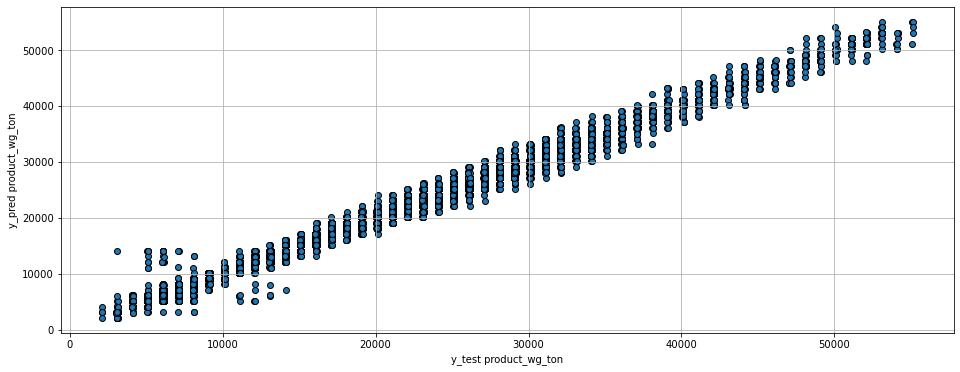

In [223]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'], y_predict_decs_tree_reg,edgecolors = 'black')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.show()

## We can use the scaled Training and Testing data for better accuracy of the Decission Tree Regressor Model. 

# Decision Tree Regressor model - with Scaled Train & Test data

In [227]:
Decs_Tree_Reg_sc = DecisionTreeRegressor(random_state = 0)

In [229]:
Decs_Tree_Reg_sc.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=0)

In [230]:
y_predict_decs_tree_reg_sc = Decs_Tree_Reg_sc.predict(X_test_scaled)

In [231]:
print("Decicsion Tree Regressor model R square on training scaled data",Decs_Tree_Reg_sc.score(X_train_scaled, y_train))

Decicsion Tree Regressor model R square on training scaled data 1.0


In [232]:
print("Decicsion Tree Regressor model R square on test scaled data",Decs_Tree_Reg_sc.score(X_test_scaled, y_test))

Decicsion Tree Regressor model R square on test scaled data 0.988510402190295


In [233]:
Adj_r2_training_decs_tree_sc = 1 - (1-Decs_Tree_Reg_sc.score(X_train_scaled, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Decicsion Tree Regressor model Adj_r2 square on training scaled data",Adj_r2_training_decs_tree_sc)

Decicsion Tree Regressor model Adj_r2 square on training scaled data 1.0


In [235]:
Adj_r2_test_decs_tree_sc = 1 - (1-Decs_Tree_Reg_sc.score(X_test_scaled, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Decicsion Tree Regressor model Adj_r2 square on test scaled data",Adj_r2_test_decs_tree_sc)

Decicsion Tree Regressor model Adj_r2 square on test scaled data 0.9885007424275436


In [236]:
predicted_train_decs_tree_sc=Decs_Tree_Reg_sc.predict(X_train_scaled)
print("Decicsion Tree Regressor model RMSE on training scaled data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_decs_tree_sc)))

Decicsion Tree Regressor model RMSE on training scaled data 0.0


In [237]:
predicted_test_decs_tree_sc=Decs_Tree_Reg_sc.predict(X_test_scaled)
print("Decicsion Tree Regressor model RMSE on test scaled data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_decs_tree_sc)))

Decicsion Tree Regressor model RMSE on test scaled data 1234.7961826957517


In [239]:
#Predictions on Testing data
Decs_Tree_Reg_Train_predict_sc = Decs_Tree_Reg_sc.predict(X_train_scaled) 
Decs_Tree_Reg_Train_predict_sc = Decs_Tree_Reg_Train_predict_sc.reshape(17500,1)

Decs_Tree_Reg_Train_MAPE_sc= MAPE(y_train,Decs_Tree_Reg_Train_predict_sc)
print("Decision Tree Regressor model MAPE for training scaled data set: ",Decs_Tree_Reg_Train_MAPE_sc)

Decision Tree Regressor model MAPE for training scaled data set:  product_wg_ton   0.000
dtype: float64


In [240]:
#Predictions on Testing data
Decs_Tree_Reg_Test_predict_sc = Decs_Tree_Reg_sc.predict(X_test_scaled) 
Decs_Tree_Reg_Test_predict_sc = Decs_Tree_Reg_Test_predict_sc.reshape(7500,1)

Decs_Tree_Reg_Test_MAPE_sc= MAPE(y_test,Decs_Tree_Reg_Test_predict_sc)
print("Decision Tree Regressor model MAPE for testing scaled data set: ",Decs_Tree_Reg_Test_MAPE_sc)

Decision Tree Regressor model MAPE for testing scaled data set:  product_wg_ton   4.779
dtype: float64


In [241]:
dataframe_Decs_Tree_Reg_sc = pd.DataFrame()
dataframe_Decs_Tree_Reg_sc['prediction'] = y_predict_decs_tree_reg_sc
dataframe_Decs_Tree_Reg_sc['observed'] = y_test['product_wg_ton'].values.copy()
dataframe_Decs_Tree_Reg_sc['res'] = dataframe_Decs_Tree_Reg_sc['observed']- dataframe_Decs_Tree_Reg_sc['prediction']
dataframe_Decs_Tree_Reg_sc.head()

prediction  observed       res
0   32116.000 32073.000   -43.000
1    6150.000  5072.000 -1078.000
2    8085.000  8056.000   -29.000
3   24150.000 23070.000 -1080.000
4   29140.000 28086.000 -1054.000

# Model Tuning : using GridSearchCV

# Decision Tree Regression Model tuning :

In [246]:
from sklearn.model_selection import GridSearchCV

In [257]:
param_grid = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2],
           "min_weight_fraction_leaf":[0.1,0.2,0.3],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[None,10,20] }
decision_tree = DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator = decision_tree, param_grid = param_grid, cv = 3)

In [258]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1, random_state=1)

In [259]:
tuned_hyper_decission_tree_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [260]:
tuned_hyper_decission_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [261]:
tuned_pred_decison_tree_model = tuned_hyper_decission_tree_model.predict(X_test)

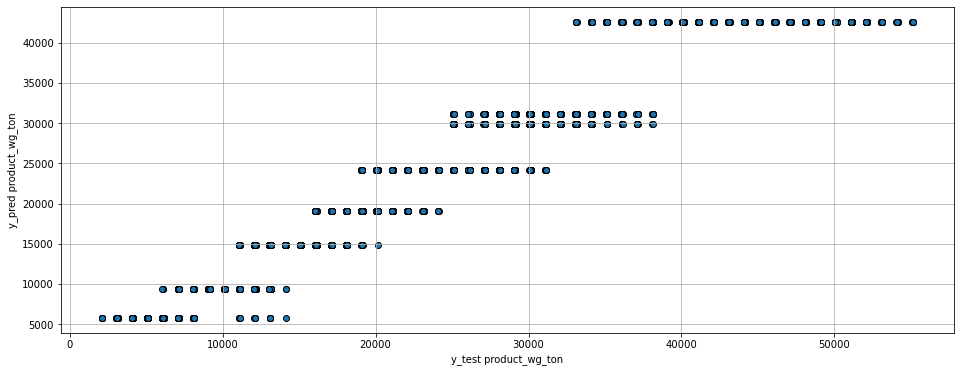

In [262]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'], tuned_pred_decison_tree_model,edgecolors = 'black')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.show()


In [263]:
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_decison_tree_model))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_decison_tree_model))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_decison_tree_model)))

MAE: 1922.352515033765
MSE: 6840955.072868072
RMSE: 2615.5219503701496


In [264]:
print("Decision Tree Regressor tuned model R square on training data",tuned_hyper_decission_tree_model.score(X_train, y_train))

Decision Tree Regressor tuned model R square on training data 0.9496322037404579


In [265]:
print("Decision Tree Regressor tuned model R square on test data",tuned_hyper_decission_tree_model.score(X_test, y_test))

Decision Tree Regressor tuned model R square on test data 0.9484497223875679


In [266]:
Adj_r2_train_decision_tree_tune = 1 - (1-tuned_hyper_decission_tree_model.score(X_train, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Decision Tree Regressor tuned model Adj_r2 square on training data",Adj_r2_train_decision_tree_tune)

Decision Tree Regressor tuned model Adj_r2 square on training data 0.9495898575269319


In [267]:
Adj_r2_test_decision_tree_tune = 1 - (1-tuned_hyper_decission_tree_model.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Decision Tree Regressor tuned model Adj_r2 square on test data",Adj_r2_test_decision_tree_tune)

Decision Tree Regressor tuned model Adj_r2 square on test data 0.9484063820148454


In [268]:
predicted_train_decision_tree_tune = tuned_hyper_decission_tree_model.predict(X_train)
print("Decision Tree Regressor tuned model RMSE on training data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_decision_tree_tune)))

Decision Tree Regressor tuned model RMSE on training data 2613.425344565077


In [269]:
predicted_test_decision_tree_tune = tuned_hyper_decission_tree_model.predict(X_test)
print("Decision Tree Regressor tuned model RMSE on test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_decision_tree_tune)))

Decision Tree Regressor tuned model RMSE on test data 2615.5219503701496


In [270]:
#Predictions on Testing data
decision_tree_tune_Train_predict = tuned_hyper_decission_tree_model.predict(X_train) 
decision_tree_tune_Train_predict = decision_tree_tune_Train_predict.reshape(17500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
decision_tree_tune_train_MAPE = MAPE(y_train,decision_tree_tune_Train_predict)
print("Decision Tree Regressor tuned model MAPE for training data set: ",decision_tree_tune_train_MAPE)

Decision Tree Regressor tuned model MAPE for training data set:  product_wg_ton   10.675
dtype: float64


In [271]:
#Predictions on Testing data
decision_tree_tune_Test_predict = tuned_hyper_decission_tree_model.predict(X_test) 
decision_tree_tune_Test_predict = decision_tree_tune_Test_predict.reshape(7500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
decision_tree_tune_test_MAPE = MAPE(y_test,decision_tree_tune_Test_predict)
print("Decision Tree Regressor tuned model MAPE for test data set: ",decision_tree_tune_test_MAPE)

Decision Tree Regressor tuned model MAPE for test data set:  product_wg_ton   10.757
dtype: float64


In [333]:
dataframe_Decs_Tree_tune = pd.DataFrame()
dataframe_Decs_Tree_tune['prediction'] = tuned_pred_decison_tree_model
dataframe_Decs_Tree_tune['observed'] = y_test['product_wg_ton'].values.copy()
dataframe_Decs_Tree_tune['res'] = dataframe_Decs_Tree_tune['observed']- dataframe_Decs_Tree_tune['prediction']
dataframe_Decs_Tree_tune.head()

prediction  observed       res
0   29848.661 32073.000  2224.339
1    5764.532  5072.000  -692.532
2    9397.749  8056.000 -1341.749
3   24154.898 23070.000 -1084.898
4   29848.661 28086.000 -1762.661

# Random Forest Model :

In [275]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
random_forest_reg_model = RandomForestRegressor(random_state=123)

In [280]:
random_forest_reg_model.fit(X_train,y_train)
random_forest_reg_model_y_pred = random_forest_reg_model.predict(X_train)

In [281]:
random_forest_reg_model_y_pred

array([23114.94, 19125.72, 38141.13, ...,  8121.33, 32328.21, 28153.92])

In [282]:
print("Random Forest Regressor model R square on training data",random_forest_reg_model.score(X_train, y_train))

Random Forest Regressor model R square on training data 0.9991057716825664


In [283]:
print("Random Forest Regressor model R square on test data",random_forest_reg_model.score(X_test, y_test))

Random Forest Regressor model R square on test data 0.9941511711709233


In [284]:
Adj_r2_training_random_forest_reg_model = 1 - (1-random_forest_reg_model.score(X_train, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Random Forest Regressor model Adj_r2 square on training data",Adj_r2_training_random_forest_reg_model)

Random Forest Regressor model Adj_r2 square on training data 0.999105019869184


In [285]:
Adj_r2_test_random_forest_reg_model = 1 - (1-random_forest_reg_model.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Random Forest Regressor model Adj_r2 square on test data",Adj_r2_test_random_forest_reg_model)

Random Forest Regressor model Adj_r2 square on test data 0.9941462538274446


In [286]:
predicted_train_random_forest_reg_model = random_forest_reg_model.predict(X_train)
print("Random Forest Regressor model RMSE on training data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_random_forest_reg_model)))

Random Forest Regressor model RMSE on training data 348.22330487760297


In [287]:
predicted_test_random_forest_reg_model = random_forest_reg_model.predict(X_test)
print("Random Forest Regressor model RMSE on test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_random_forest_reg_model)))

Random Forest Regressor model RMSE on test data 881.0028649310814


In [288]:
#Predictions on Training data
random_forest_reg_model_Train_predict = random_forest_reg_model.predict(X_train) 
random_forest_reg_model_Train_predict = random_forest_reg_model_Train_predict.reshape(17500,1)

random_forest_reg_model_train_MAPE= MAPE(y_train,random_forest_reg_model_Train_predict)
print("Random Forest Regressor model MAPE for training data set: ",random_forest_reg_model_train_MAPE)

Random Forest Regressor model MAPE for training data set:  product_wg_ton   1.535
dtype: float64


In [289]:
#Predictions on Testing data
random_forest_reg_model_Test_predict = random_forest_reg_model.predict(X_test) 
random_forest_reg_model_Test_predict = random_forest_reg_model_Test_predict.reshape(7500,1)

random_forest_reg_model_test_MAPE= MAPE(y_test,random_forest_reg_model_Test_predict)
print("Random Forest Regressor model MAPE for test data set: ",random_forest_reg_model_test_MAPE)

Random Forest Regressor model MAPE for test data set:  product_wg_ton   3.859
dtype: float64


- Random Forest Regressor model R square - training data = 0.9991057716825664
- Random Forest Regressor model R square - test data = 0.9941511711709233
- Random Forest Regressor model Adjusted r square - training data = 0.999105019869184
- Random Forest Regressor model Adjusted r square - test data =  0.9941462538274446
- Random Forest Regressor model RMSE - training data =  348.22330487760297
- Random Forest Regressor model RMSE - test data = 881.0028649310814
- Random Forest Regressor model MAPE - training data set:  product_wg_ton    1.535
- Random Forest Regressor model MAPE - test data set:  product_wg_ton    3.859

In [290]:
y_predict_random_forest_reg_model = random_forest_reg_model.predict(X_test)

In [292]:
from sklearn import metrics
r_square_error = metrics.r2_score(y_test,y_predict_random_forest_reg_model)
print("R-Square Error associates with Random Forest Regression is: ", r_square_error)

R-Square Error associates with Random Forest Regression is:  0.9941511711709233


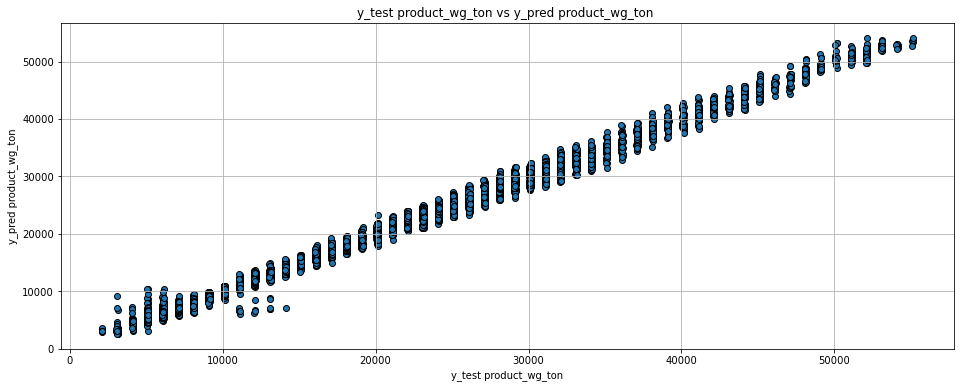

In [293]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'], y_predict_random_forest_reg_model,edgecolors = 'black')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.title('y_test product_wg_ton vs y_pred product_wg_ton ')
plt.show()

# Random Forest Regressor model tuning : using Grid Search CV

In [294]:
param_grid = {
    'max_depth': [10,15],
    'max_features': [6,8],
    'min_samples_leaf': [3, 5, 7],
    'min_samples_split': [10,20,30],
    'n_estimators': [500,700]
}

random_forest_reg_model = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = random_forest_reg_model, param_grid = param_grid, cv = 3)

In [295]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [10, 15], 'max_features': [6, 8],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [500, 700]})

In [296]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 700}


RandomForestRegressor(max_depth=15, max_features=8, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=700, random_state=123)

In [298]:
random_forest_model_tune = RandomForestRegressor(max_depth=15, max_features=8, 
                            min_samples_leaf= 3,
                            min_samples_split= 10, n_estimators= 700,
                            random_state=123)

In [299]:
random_forest_model_tune.fit(X_train,y_train)
random_forest_model_tune_y_pred_tune = random_forest_model_tune.predict(X_train)
random_forest_model_tune_y_pred_tune

array([23406.89963828, 19181.01049378, 38439.1961152 , ...,
        7983.57358923, 32280.94618336, 27839.99489749])

In [300]:
random_forest_model_tune_y_pred_test = random_forest_model_tune.predict(X_test)
random_forest_model_tune_y_pred_test

array([30349.65856369,  5881.05131357,  8328.10646842, ...,
       38573.47390739, 39144.01170622, 45390.55347622])

In [301]:
# R square on training data
print("Random Forest Regressor model R square on training data",random_forest_model_tune.score(X_train, y_train))

Random Forest Regressor model R square on training data 0.9964236223860004


In [302]:
# R square on test data
print("Random Forest Regressor model R square on test data",random_forest_model_tune.score(X_test, y_test))

Random Forest Regressor model R square on test data 0.993422722593717


In [303]:
Adj_r2_training_random_forest_model_tune = 1 - (1-random_forest_model_tune.score(X_train, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Random Forest Regressor model Adj_r2 square on training data",Adj_r2_training_random_forest_model_tune)

Random Forest Regressor model Adj_r2 square on training data 0.9964206155828178


In [304]:
Adj_r2_test_random_forest_model_tune = 1 - (1-random_forest_model_tune.score(X_test, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("Random Forest Regressor model Adj_r2 square on test data",Adj_r2_test_random_forest_model_tune)

Random Forest Regressor model Adj_r2 square on test data 0.99341719281449


In [305]:
predicted_train_random_forest_model_tune = random_forest_model_tune.predict(X_train)
print("Random Forest Regressor model RMSE on training data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_random_forest_model_tune)))

Random Forest Regressor model RMSE on training data 696.3944600999073


In [306]:
predicted_test_random_forest_model_tune = random_forest_model_tune.predict(X_test)
print("Random Forest Regressor model RMSE on test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_random_forest_model_tune)))

Random Forest Regressor model RMSE on test data 934.2561051443345


In [307]:
#Predictions on Testing data
random_forest_model_tune_Train_predict = random_forest_model_tune.predict(X_train) 
random_forest_model_tune_Train_predict=random_forest_model_tune_Train_predict.reshape(17500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
random_forest_model_tune_train_MAPE = MAPE(y_train,random_forest_model_tune_Train_predict)
print("Random Forest Regressor model MAPE for training data set: ",random_forest_model_tune_train_MAPE)

Random Forest Regressor model MAPE for training data set:  product_wg_ton   3.090
dtype: float64


In [308]:
#Predictions on Testing data
random_forest_model_tune_Test_predict = random_forest_model_tune.predict(X_test) 
random_forest_model_tune_Test_predict=random_forest_model_tune_Test_predict.reshape(7500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
random_forest_model_tune_test_MAPE = MAPE(y_test,random_forest_model_tune_Test_predict)
print("Random Forest Regressor model MAPE for test data set: ",random_forest_model_tune_test_MAPE)

Random Forest Regressor model MAPE for test data set:  product_wg_ton   4.214
dtype: float64


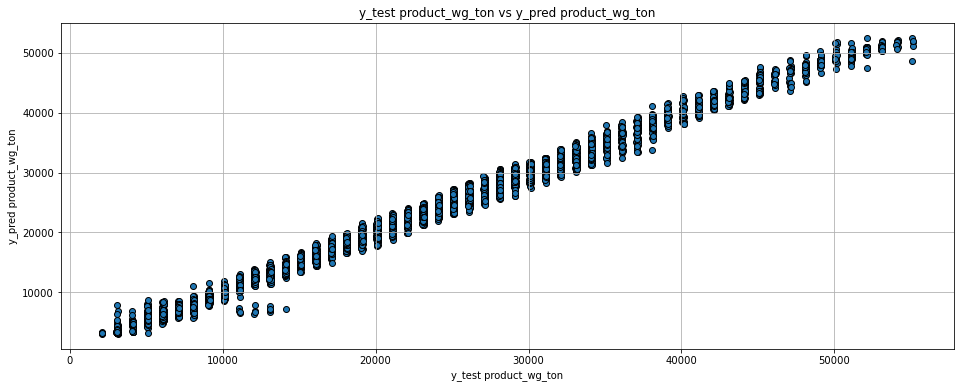

In [311]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'], y_predict_random_forest_model_tune,edgecolors = 'black')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.title('y_test product_wg_ton vs y_pred product_wg_ton')
plt.show()

In [332]:
dataframe_random_forest_model_tune = pd.DataFrame()
dataframe_random_forest_model_tune['prediction'] = random_forest_model_tune_y_pred_test
dataframe_random_forest_model_tune['observed'] = y_test['product_wg_ton'].values.copy()
dataframe_random_forest_model_tune['res'] = dataframe_random_forest_model_tune['observed']- dataframe_random_forest_model_tune['prediction']
dataframe_random_forest_model_tune.head()

prediction  observed       res
0   30349.659 32073.000  1723.341
1    5881.051  5072.000  -809.051
2    8328.106  8056.000  -272.106
3   23128.624 23070.000   -58.624
4   29451.324 28086.000 -1365.324

# Neural Network Model - Applied on Scaled Training & Test data

In [168]:
from sklearn.neural_network import MLPRegressor

In [169]:
neuralnetwork_model = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)

In [170]:
neuralnetwork_model.fit(X_train_scaled,y_train)
y_pred_neuralnetwork_model = neuralnetwork_model.predict(X_test_scaled)

In [171]:
# R square on training data
print("ANNR model R square on training data",neuralnetwork_model.score(X_train_scaled, y_train))

ANNR model R square on training data 0.9917096802503793


In [172]:
# R square on test data
print("ANNR model R square on test data",neuralnetwork_model.score(X_test_scaled, y_test))

ANNR model R square on test data 0.9912965861043286


In [173]:
Adj_r2_train_neuralnetwork_model = 1 - (1-neuralnetwork_model.score(X_train_scaled, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("ANNR tuned model Adj_r2 square on training scaled data",Adj_r2_train_neuralnetwork_model)

ANNR tuned model Adj_r2 square on training scaled data 0.9917027102481877


In [174]:
Adj_r2_test_neuralnetwork_model = 1 - (1-neuralnetwork_model.score(X_test_scaled, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("ANNR tuned model Adj_r2 square on test sclaed data",Adj_r2_test_neuralnetwork_model)

ANNR tuned model Adj_r2 square on test sclaed data 0.9912892687974262


In [175]:
predicted_trai_neuralnetwork_model = neuralnetwork_model.predict(X_train_scaled)
print("ANNR model RMSE on training data",np.sqrt(metrics.mean_squared_error(y_train,predicted_trai_neuralnetwork_model)))

ANNR model RMSE on training data 1060.2768137107014


In [176]:
predicted_test_neuralnetwork_model = neuralnetwork_model.predict(X_test_scaled)
print("ANNR model RMSE on test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_neuralnetwork_model)))

ANNR model RMSE on test data 1074.7010754705973


In [177]:
#Predictions on Testing data
neuralnetwork_model_Train_predict = neuralnetwork_model.predict(X_train_scaled) 
neuralnetwork_model_Train_predict = neuralnetwork_model_Train_predict.reshape(17500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
neuralnetwork_model_train_MAPE= MAPE(y_train,neuralnetwork_model_Train_predict)
print("ANNR model MAPE for training data set: ",neuralnetwork_model_train_MAPE)

ANNR model MAPE for training data set:  product_wg_ton   5.226
dtype: float64


In [178]:
#Predictions on Testing data
neuralnetwork_model_Test_predict = neuralnetwork_model.predict(X_test_scaled) 
neuralnetwork_model_Test_predict = neuralnetwork_model_Test_predict.reshape(7500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
neuralnetwork_model_test_MAPE= MAPE(y_test,neuralnetwork_model_Test_predict)
print("ANNR model MAPE for test data set: ",neuralnetwork_model_test_MAPE)

ANNR model MAPE for test data set:  product_wg_ton   5.432
dtype: float64


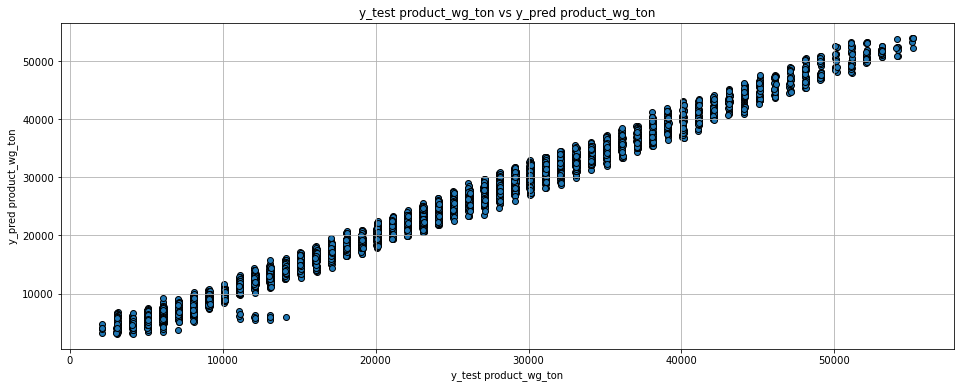

In [179]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.scatter(y_test['product_wg_ton'], y_pred_neuralnetwork_model ,edgecolors = 'black')
plt.xlabel('y_test product_wg_ton')
plt.ylabel('y_pred product_wg_ton')
plt.title('y_test product_wg_ton vs y_pred product_wg_ton')
plt.show()

In [180]:
dataframe_neuralnetwork_model = pd.DataFrame()
dataframe_neuralnetwork_model['prediction'] = y_pred_neuralnetwork_model
dataframe_neuralnetwork_model['observed'] = y_test['product_wg_ton'].values.copy()
dataframe_neuralnetwork_model['res'] = dataframe_neuralnetwork_model['observed']- dataframe_neuralnetwork_model['prediction']
dataframe_neuralnetwork_model.head()

prediction  observed       res
0   30840.495 32073.000  1232.505
1    5314.085  5072.000  -242.085
2    8546.430  8056.000  -490.430
3   23495.214 23070.000  -425.214
4   30257.991 28086.000 -2171.991

# Neural Network Model Tuning - usning Grid Search CV

In [181]:
param_grid = {
    'hidden_layer_sizes':[(400),(500),(600)], 
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

neuralnetwork_model = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = neuralnetwork_model, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train_scaled,y_train)

In [337]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 600, 'solver': 'adam'}


In [182]:
tuned_hyper_neuralnetwork_model = MLPRegressor(activation='relu', hidden_layer_sizes=(600), 
                    solver='adam',random_state=123, 
                    max_iter=1000)

In [183]:
tuned_hyper_neuralnetwork_model.fit(X_train_scaled,y_train)

MLPRegressor(hidden_layer_sizes=600, max_iter=1000, random_state=123)

In [184]:
# prediction 
tuned_pred_neuralnetwork_model = tuned_hyper_neuralnetwork_model.predict(X_test_scaled)

In [185]:
# R square on training data
print("ANNR tuned model R square on training scaled data",tuned_hyper_neuralnetwork_model.score(X_train_scaled, y_train))

ANNR tuned model R square on training scaled data 0.9922189723931889


In [186]:
# R square on test data
print("ANNR tuned model R square on test scaled data",tuned_hyper_neuralnetwork_model.score(X_test_scaled, y_test))

ANNR tuned model R square on test scaled data 0.9917482867482555


In [188]:
Adj_r2_train_neuralnetwork_model_tune = 1 - (1-tuned_hyper_neuralnetwork_model.score(X_train_scaled, y_train)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("ANNR tuned model Adj_r2 square on training scaled data",Adj_r2_train_neuralnetwork_model_tune)

ANNR tuned model Adj_r2 square on training scaled data 0.9922124305731976


In [189]:
Adj_r2_test_neuralnetwork_model_tune = 1 - (1-tuned_hyper_neuralnetwork_model.score(X_test_scaled, y_test)) * (len(model_data)-1)/(len(model_data)-X.shape[1]-1)
print("ANNR tuned model Adj_r2 square on test sclaed data",Adj_r2_test_neuralnetwork_model_tune)

ANNR tuned model Adj_r2 square on test sclaed data 0.9917413492040852


In [190]:
# RMSE on training data set
predicted_train_neuralnetwork_model_tune = tuned_hyper_neuralnetwork_model.predict(X_train_scaled)
print("ANNR tuned model RMSE on training scaled data",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_neuralnetwork_model_tune)))

ANNR tuned model RMSE on training scaled data 1027.1931197641889


In [191]:
# RMSE on test data set
predicted_test_neuralnetwork_model_tune = tuned_hyper_neuralnetwork_model.predict(X_test_scaled)
print("ANNR tuned model RMSE on scaled test data",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_neuralnetwork_model_tune)))

ANNR tuned model RMSE on scaled test data 1046.4414376817592


In [192]:
#Predictions on Testing data

Train_predict_neuralnetwork_model_tune = tuned_hyper_neuralnetwork_model.predict(X_train_scaled) 
Train_predict_neuralnetwork_model_tune = Train_predict_neuralnetwork_model_tune.reshape(17500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
neuralnetwork_model_tune_train_MAPE = MAPE(y_train,Train_predict_neuralnetwork_model_tune)
print("ANNR tuned model MAPE for training scaled data set: ",neuralnetwork_model_tune_train_MAPE)

ANNR tuned model MAPE for training scaled data set:  product_wg_ton   5.018
dtype: float64


In [193]:
#Predictions on Testing data
Test_predict_neuralnetwork_model_tune = tuned_hyper_neuralnetwork_model.predict(X_test_scaled) 
Test_predict_neuralnetwork_model_tune = Test_predict_neuralnetwork_model_tune.reshape(7500,1)

# Using MAPE error metrics to check for the error rate and accuracy level
neuralnetwork_model_tune_test_MAPE = MAPE(y_test,Test_predict_neuralnetwork_model_tune)
print("ANNR tuned model MAPE for test data set: ",neuralnetwork_model_tune_test_MAPE)

ANNR tuned model MAPE for test data set:  product_wg_ton   5.250
dtype: float64
